In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.inspection import permutation_importance

import pickle

## Merging Datasets

In [14]:
dataset_path_1 = 'C:/Users/kavis/Desktop/Junior-Senior Project (UOS)/AI Implementation/Presentation Complexity/Data Preprocessing and Manual Feature Engineering (Phase 1)/cleaned_presentation_complexity_dataset_with_features.csv'

df_1 = pd.read_csv(dataset_path_1)
df_1.head()

Video Name  \
0    Plant Parts and Functions for Kids   
1  Adjectives for Kids | Homeschool Pop   
2               Roman Numerals For Kids   
3            Benjamin Franklin for Kids   
4                  Paul Revere for Kids   

                                     Video URL  Complexity Level  \
0  https://www.youtube.com/watch?v=18amLZ9vfG8                 0   
1  https://www.youtube.com/watch?v=4jxXnHSbicY                 0   
2  https://www.youtube.com/watch?v=NrnXsKYpLJM                 0   
3  https://www.youtube.com/watch?v=5LcMXnZfFFY                 0   
4  https://www.youtube.com/watch?v=dmwcfaythY4                 0   

               Cleaned Video Name  Frame Rate (fps)  \
0   PlantPartsandFunctionsforKids              25.0   
1  AdjectivesforKidsHomeschoolPop              25.0   
2            RomanNumeralsForKids              25.0   
3         BenjaminFranklinforKids              25.0   
4               PaulRevereforKids              25.0   

   Scene Transition Rate (Per Min)  Average Scene Duration (in Mins)  \
0                         2.596279                          0.371885   
1                         1.874561                          0.502078   
2                         1.475894                          0.609800   
3                         7.554297                          0.124588   
4                         6.286014                          0.149725   

   Average Motion Intensity  Average Texture Contrast  \
0                  1.801748               5111.683237   
1                  0.569372               3943.115691   
2                  1.104255               3996.529243   
3                  1.867790               4844.473094   
4                  2.819806               6004.130270   

   Average Texture Homogeneity  Dominant Color Standard Deviation (R)  \
0                     0.379146                              82.994624   
1                     0.319201                              72.648775   
2                     0.362325                              80.947498   
3                     0.412323                              72.428249   
4                     0.404992                              67.448256   

   Dominant Color Standard Deviation (G)  \
0                              68.282270   
1                              70.043557   
2                              78.241961   
3                              78.067785   
4                              74.333054   

   Dominant Color Standard Deviation (B)  Bit Rate (Mbps)  Compression Ratio  \
0                              67.973004         0.181855           0.396224   
1                              83.526724         0.161331           0.278195   
2                              75.806626         0.176696           0.217683   
3                              77.097537         0.232962           0.099683   
4                              67.625711         0.218057           0.112131   

   Average PSNR (dB)  Average SSIM  Average Color Standard Deviation (R)  \
0          46.203267      0.930128                             58.307155   
1          55.694422      0.971648                             47.858784   
2          49.813713      0.938447                             65.295601   
3          37.454033      0.908600                             43.882747   
4          53.370351      0.918199                             37.902162   

   Average Color Standard Deviation (G)  Average Color Standard Deviation (B)  
0                             44.548661                             52.432824  
1                             49.947640                             72.322853  
2                             64.685164                             72.467431  
3                             42.760733                             52.778252  
4                             41.067300                             40.336226

In [15]:
# rename columns to match with the other datasets
df_1 = df_1.rename(columns={'Video Name': 'Video Title', 'Complexity Level': 'Presentation Complexity'})
df_1.columns

Index(['Video Title', 'Video URL', 'Presentation Complexity',
       'Cleaned Video Name', 'Frame Rate (fps)',
       'Scene Transition Rate (Per Min)', 'Average Scene Duration (in Mins)',
       'Average Motion Intensity', 'Average Texture Contrast',
       'Average Texture Homogeneity', 'Dominant Color Standard Deviation (R)',
       'Dominant Color Standard Deviation (G)',
       'Dominant Color Standard Deviation (B)', 'Bit Rate (Mbps)',
       'Compression Ratio', 'Average PSNR (dB)', 'Average SSIM',
       'Average Color Standard Deviation (R)',
       'Average Color Standard Deviation (G)',
       'Average Color Standard Deviation (B)'],
      dtype='object')

In [16]:
# reorder column names to match with the other datasets
temp_1 = df_1[['Video URL', 'Video Title']]
temp_2 = df_1.iloc[:, 2:]

df_1 = pd.concat([temp_1, temp_2], axis=1)
df_1.head()

Video URL  \
0  https://www.youtube.com/watch?v=18amLZ9vfG8   
1  https://www.youtube.com/watch?v=4jxXnHSbicY   
2  https://www.youtube.com/watch?v=NrnXsKYpLJM   
3  https://www.youtube.com/watch?v=5LcMXnZfFFY   
4  https://www.youtube.com/watch?v=dmwcfaythY4   

                            Video Title  Presentation Complexity  \
0    Plant Parts and Functions for Kids                        0   
1  Adjectives for Kids | Homeschool Pop                        0   
2               Roman Numerals For Kids                        0   
3            Benjamin Franklin for Kids                        0   
4                  Paul Revere for Kids                        0   

               Cleaned Video Name  Frame Rate (fps)  \
0   PlantPartsandFunctionsforKids              25.0   
1  AdjectivesforKidsHomeschoolPop              25.0   
2            RomanNumeralsForKids              25.0   
3         BenjaminFranklinforKids              25.0   
4               PaulRevereforKids              25.0   

   Scene Transition Rate (Per Min)  Average Scene Duration (in Mins)  \
0                         2.596279                          0.371885   
1                         1.874561                          0.502078   
2                         1.475894                          0.609800   
3                         7.554297                          0.124588   
4                         6.286014                          0.149725   

   Average Motion Intensity  Average Texture Contrast  \
0                  1.801748               5111.683237   
1                  0.569372               3943.115691   
2                  1.104255               3996.529243   
3                  1.867790               4844.473094   
4                  2.819806               6004.130270   

   Average Texture Homogeneity  Dominant Color Standard Deviation (R)  \
0                     0.379146                              82.994624   
1                     0.319201                              72.648775   
2                     0.362325                              80.947498   
3                     0.412323                              72.428249   
4                     0.404992                              67.448256   

   Dominant Color Standard Deviation (G)  \
0                              68.282270   
1                              70.043557   
2                              78.241961   
3                              78.067785   
4                              74.333054   

   Dominant Color Standard Deviation (B)  Bit Rate (Mbps)  Compression Ratio  \
0                              67.973004         0.181855           0.396224   
1                              83.526724         0.161331           0.278195   
2                              75.806626         0.176696           0.217683   
3                              77.097537         0.232962           0.099683   
4                              67.625711         0.218057           0.112131   

   Average PSNR (dB)  Average SSIM  Average Color Standard Deviation (R)  \
0          46.203267      0.930128                             58.307155   
1          55.694422      0.971648                             47.858784   
2          49.813713      0.938447                             65.295601   
3          37.454033      0.908600                             43.882747   
4          53.370351      0.918199                             37.902162   

   Average Color Standard Deviation (G)  Average Color Standard Deviation (B)  
0                             44.548661                             52.432824  
1                             49.947640                             72.322853  
2                             64.685164                             72.467431  
3                             42.760733                             52.778252  
4                             41.067300                             40.336226

In [17]:
dataset_path_2 = 'C:/Users/kavis/Desktop/Junior-Senior Project (UOS)/AI Implementation/Presentation Complexity/Model Testing (Phase 1)/presentation_test_dataset_features_1.csv'

df_2 = pd.read_csv(dataset_path_2)
df_2.head()

Video URL  \
0  https://www.youtube.com/watch?v=FqCQCWTdAQg   
1  https://youtu.be/fkkQhJQ2c_k?feature=shared   
2  https://www.youtube.com/watch?v=ETBiUsc5D-E   
3  https://youtu.be/XE1EgLmS3mk?feature=shared   
4  https://www.youtube.com/watch?v=3ZpDjdFzQUM   

                                         Video Title  Presentation Complexity  \
0               MP set Mathametical science syllabus                        1   
1                           GRADE 8, ENGLISH, UNIT 1                        1   
2  George Berkeley An overview of his life & his ...                        1   
3  His First Flight Class 10 animation in English...                        0   
4    Plate Boundaries-Divergent-Convergent-Transform                        0   

                                  Cleaned Video Name  Frame Rate (fps)  \
0                   MPsetMathameticalsciencesyllabus         29.600000   
1                                 GRADE8ENGLISHUNIT1         29.845000   
2  GeorgeBerkeleyAnoverviewofhislifehisphilosophy...         47.952048   
3  HisFirstFlightClass10animationinEnglishTwoStor...         24.000000   
4        PlateBoundariesDivergentConvergentTransform         25.000000   

   Scene Transition Rate (Per Min)  Average Scene Duration (in Mins)  \
0                         0.362264                          1.840278   
1                         0.673406                          1.272846   
2                         2.277092                          0.432503   
3                         3.405405                          0.274074   
4                         4.869001                          0.191689   

   Average Motion Intensity  Average Texture Contrast  \
0                  5.992437                853.265808   
1                  0.463185               5802.763797   
2                  0.553988               7323.480714   
3                  1.570079               1398.269565   
4                  3.084297               3629.381880   

   Average Texture Homogeneity  Dominant Color Standard Deviation (R)  \
0                     0.376878                              11.588977   
1                     0.565287                             100.486312   
2                     0.551770                              85.626882   
3                     0.156339                              47.769189   
4                     0.450872                              91.831294   

   Dominant Color Standard Deviation (G)  \
0                              12.356016   
1                              96.209403   
2                              84.792838   
3                              38.353745   
4                              73.309047   

   Dominant Color Standard Deviation (B)  Bit Rate (Mbps)  Compression Ratio  \
0                              11.198465         1.863310           0.002846   
1                              91.089927         0.473885           0.000856   
2                              82.070221         0.557295           0.000643   
3                              36.417193         0.354507           0.000668   
4                              71.923694         0.738623           0.001336   

   Average PSNR (dB)  Average SSIM  Average Color Standard Deviation (R)  \
0          18.372113      0.664803                              9.012597   
1          31.858830      0.962784                              7.034477   
2          52.200184      0.961578                             39.757743   
3          24.257495      0.904651                             37.125485   
4          43.252699      0.875511                             47.471495   

   Average Color Standard Deviation (G)  Average Color Standard Deviation (B)  
0                              9.865375                              7.973724  
1                              6.995443                              7.446200  
2                             38.936062                             38.939747  
3                             29.370997                           

In [18]:
dataset_path_3 = 'C:/Users/kavis/Desktop/Junior-Senior Project (UOS)/AI Implementation/Presentation Complexity/Data Preprocessing and Manual Feature Engineering (Phase 2)/new_videos_dataset_features.csv'

df_3 = pd.read_csv(dataset_path_3)
df_3.head()

Video URL  \
0  https://www.youtube.com/watch?v=WUCqyx8-jxc   
1  https://www.youtube.com/watch?v=xNZWb4ufpas   
2  https://www.youtube.com/watch?v=6Jvcn93RF2I   
3  https://www.youtube.com/watch?v=lpTEuqnFTHQ   
4  https://www.youtube.com/watch?v=d6A9G5fVy1o   

                                         Video Title  Presentation Complexity  \
0                                       Inequalities                        1   
1  #class_6_English.#Complex_sentences_Topic.#Thu...                        1   
2  CONTROL SYSTEM I Semester Question l 2023-2024...                        1   
3  Indian Market and its environment| unit 1 | ma...                        1   
4                  4 p's of marketing| marketing mix                        1   

                                  Cleaned Video Name  Frame Rate (fps)  \
0                                       Inequalities         23.847719   
1  class6EnglishComplexsentencesTopicThursdayLect...         29.612000   
2  CONTROLSYSTEMISemesterQuestionl20232024IMCQSec...         29.561000   
3  IndianMarketanditsenvironmentunit1marketingenv...         30.000000   
4                         4psofmarketingmarketingmix         30.000000   

   Scene Transition Rate (Per Min)  Average Scene Duration (in Mins)  \
0                         0.776167                          0.858922   
1                         1.523774                          0.546888   
2                         0.000000                          7.997023   
3                         0.000000                          3.095556   
4                         0.305136                          1.638611   

   Average Motion Intensity  Average Texture Contrast  \
0                  5.317081               3516.687182   
1                  4.401582               2866.359648   
2                  1.952678               1085.815504   
3                  6.006192                722.629491   
4                  6.284730                988.905652   

   Average Texture Homogeneity  Dominant Color Standard Deviation (R)  \
0                     0.159271                              65.487482   
1                     0.080665                              65.067189   
2                     0.240618                              10.211329   
3                     0.112309                              53.543865   
4                     0.101583                              44.198550   

   Dominant Color Standard Deviation (G)  \
0                              61.190303   
1                              56.773582   
2                               9.070988   
3                              48.105199   
4                              39.979606   

   Dominant Color Standard Deviation (B)  Bit Rate (Mbps)  Compression Ratio  \
0                              51.974360         1.369403           0.002596   
1                              55.178715         0.426788           0.002606   
2                               7.380670         1.185713           0.001813   
3                              39.477896         1.373970           0.002071   
4                              39.299918         1.873663           0.002824   

   Average PSNR (dB)  Average SSIM  Average Color Standard Deviation (R)  \
0          18.290715      0.693379                             23.312538   
1          19.836557      0.603084                             15.121147   
2          28.623527      0.852293                              5.360042   
3          21.977501      0.629972                             16.015223   
4          19.733966      0.574348                             15.929912   

   Average Color Standard Deviation (G)  Average Color Standard Deviation (B)  
0                             21.821213                             17.634906  
1                             12.887616                             11.656576  
2                              5.949866                              4.751443  
3                             16.205441                           

In [19]:
print(f"Shape of Dataset 1: {df_1.shape}")
print(f"Shape of Dataset 2: {df_2.shape}")
print(f"Shape of Dataset 3: {df_3.shape}")

Shape of Dataset 1: (171, 20)
Shape of Dataset 2: (30, 20)
Shape of Dataset 3: (90, 20)


In [20]:
# merge all the datasets which includes the manually engineered features
temp = pd.concat([df_1, df_2], ignore_index=True, sort=False)
pcd_df = pd.concat([temp, df_3], ignore_index=True, sort=False)

pcd_df.head()

Video URL  \
0  https://www.youtube.com/watch?v=18amLZ9vfG8   
1  https://www.youtube.com/watch?v=4jxXnHSbicY   
2  https://www.youtube.com/watch?v=NrnXsKYpLJM   
3  https://www.youtube.com/watch?v=5LcMXnZfFFY   
4  https://www.youtube.com/watch?v=dmwcfaythY4   

                            Video Title  Presentation Complexity  \
0    Plant Parts and Functions for Kids                        0   
1  Adjectives for Kids | Homeschool Pop                        0   
2               Roman Numerals For Kids                        0   
3            Benjamin Franklin for Kids                        0   
4                  Paul Revere for Kids                        0   

               Cleaned Video Name  Frame Rate (fps)  \
0   PlantPartsandFunctionsforKids              25.0   
1  AdjectivesforKidsHomeschoolPop              25.0   
2            RomanNumeralsForKids              25.0   
3         BenjaminFranklinforKids              25.0   
4               PaulRevereforKids              25.0   

   Scene Transition Rate (Per Min)  Average Scene Duration (in Mins)  \
0                         2.596279                          0.371885   
1                         1.874561                          0.502078   
2                         1.475894                          0.609800   
3                         7.554297                          0.124588   
4                         6.286014                          0.149725   

   Average Motion Intensity  Average Texture Contrast  \
0                  1.801748               5111.683237   
1                  0.569372               3943.115691   
2                  1.104255               3996.529243   
3                  1.867790               4844.473094   
4                  2.819806               6004.130270   

   Average Texture Homogeneity  Dominant Color Standard Deviation (R)  \
0                     0.379146                              82.994624   
1                     0.319201                              72.648775   
2                     0.362325                              80.947498   
3                     0.412323                              72.428249   
4                     0.404992                              67.448256   

   Dominant Color Standard Deviation (G)  \
0                              68.282270   
1                              70.043557   
2                              78.241961   
3                              78.067785   
4                              74.333054   

   Dominant Color Standard Deviation (B)  Bit Rate (Mbps)  Compression Ratio  \
0                              67.973004         0.181855           0.396224   
1                              83.526724         0.161331           0.278195   
2                              75.806626         0.176696           0.217683   
3                              77.097537         0.232962           0.099683   
4                              67.625711         0.218057           0.112131   

   Average PSNR (dB)  Average SSIM  Average Color Standard Deviation (R)  \
0          46.203267      0.930128                             58.307155   
1          55.694422      0.971648                             47.858784   
2          49.813713      0.938447                             65.295601   
3          37.454033      0.908600                             43.882747   
4          53.370351      0.918199                             37.902162   

   Average Color Standard Deviation (G)  Average Color Standard Deviation (B)  
0                             44.548661                             52.432824  
1                             49.947640                             72.322853  
2                             64.685164                             72.467431  
3                             42.760733                             52.778252  
4                             41.067300                             40.336226

In [21]:
print(f"Shape of Merged Dataset: {pcd_df.shape}")

Shape of Merged Dataset: (291, 20)


In [22]:
pcd_df['Presentation Complexity'].value_counts()

Presentation Complexity
1    146
0    145
Name: count, dtype: int64

In [10]:
pcd_df.to_csv('presentation_complexity_dataset_2.csv', index=False)

## Data Splitting and Feature Normalization (Additional Data Preprocessing Step)

In [23]:
# put input features in X
X = pcd_df.iloc[:, 4:]
X

Frame Rate (fps)  Scene Transition Rate (Per Min)  \
0           25.000000                         2.596279   
1           25.000000                         1.874561   
2           25.000000                         1.475894   
3           25.000000                         7.554297   
4           25.000000                         6.286014   
..                ...                              ...   
286         30.000000                         1.231838   
287         23.976024                         1.725929   
288         29.970030                         2.099693   
289         14.985015                         4.197483   
290         29.970030                         0.475967   

     Average Scene Duration (in Mins)  Average Motion Intensity  \
0                            0.371885                  1.801748   
1                            0.502078                  0.569372   
2                            0.609800                  1.104255   
3                            0.124588                  1.867790   
4                            0.149725                  2.819806   
..                                ...                       ...   
286                          0.753810                  3.230102   
287                          0.548904                  4.216978   
288                          0.449801                  1.415907   
289                          0.226893                  5.217695   
290                          1.050494                  0.179747   

     Average Texture Contrast  Average Texture Homogeneity  \
0                 5111.683237                     0.379146   
1                 3943.115691                     0.319201   
2                 3996.529243                     0.362325   
3                 4844.473094                     0.412323   
4                 6004.130270                     0.404992   
..                        ...                          ...   
286               3846.236384                     0.184049   
287               2753.469932                     0.157808   
288               2033.867660                     0.552829   
289               3041.912939                     0.652901   
290               5864.237750                     0.596844   

     Dominant Color Standard Deviation (R)  \
0                                82.994624   
1                                72.648775   
2                                80.947498   
3                                72.428249   
4                                67.448256   
..                                     ...   
286                              57.121240   
287                              68.795779   
288                              78.750272   
289                              64.445045   
290                              28.102891   

     Dominant Color Standard Deviation (G)  \
0                                68.282270   
1                                70.043557   
2                                78.241961   
3                                78.067785   
4                                74.333054   
..                                     ...   
286                              42.106286   
287                              69.483893   
288                              77.990757   
289                              74.029781   
290                              28.206589   

     Dominant Color Standard Deviation (B)  Bit Rate (Mbps)  \
0                                67.973004         0.181855   
1                                83.526724         0.161331   
2                                75.806626         0.176696   
3                                77.097537         0.232962   
4                                67.625711         0.218057   
..                                     ...              ...   
286                              41.258574         0.948713   
287                              58.135321         0.555623   
288                              78.434835         0.591936   
289                   

In [24]:
# put output variable in y
y = pcd_df['Presentation Complexity']
y

0      0
1      0
2      0
3      0
4      0
      ..
286    0
287    0
288    0
289    0
290    0
Name: Presentation Complexity, Length: 291, dtype: int64

In [25]:
# split X and y into training and test sets using 70/30 split ratio in a stratified way
# stratified splitting ensures the class ratio in the training and test sets are similar which is important for imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42, stratify=y.values)

In [26]:
# ensure the class ratio in the training and test sets are almost equal
# check if the number of samples in training set is sufficient
print(f'Training Set Class =\n{pd.DataFrame(y_train).value_counts()}')
print(f'Test Set Class =\n{pd.DataFrame(y_test).value_counts()}')

Training Set Class =
0
1    102
0    101
Name: count, dtype: int64
Test Set Class =
0
0    44
1    44
Name: count, dtype: int64


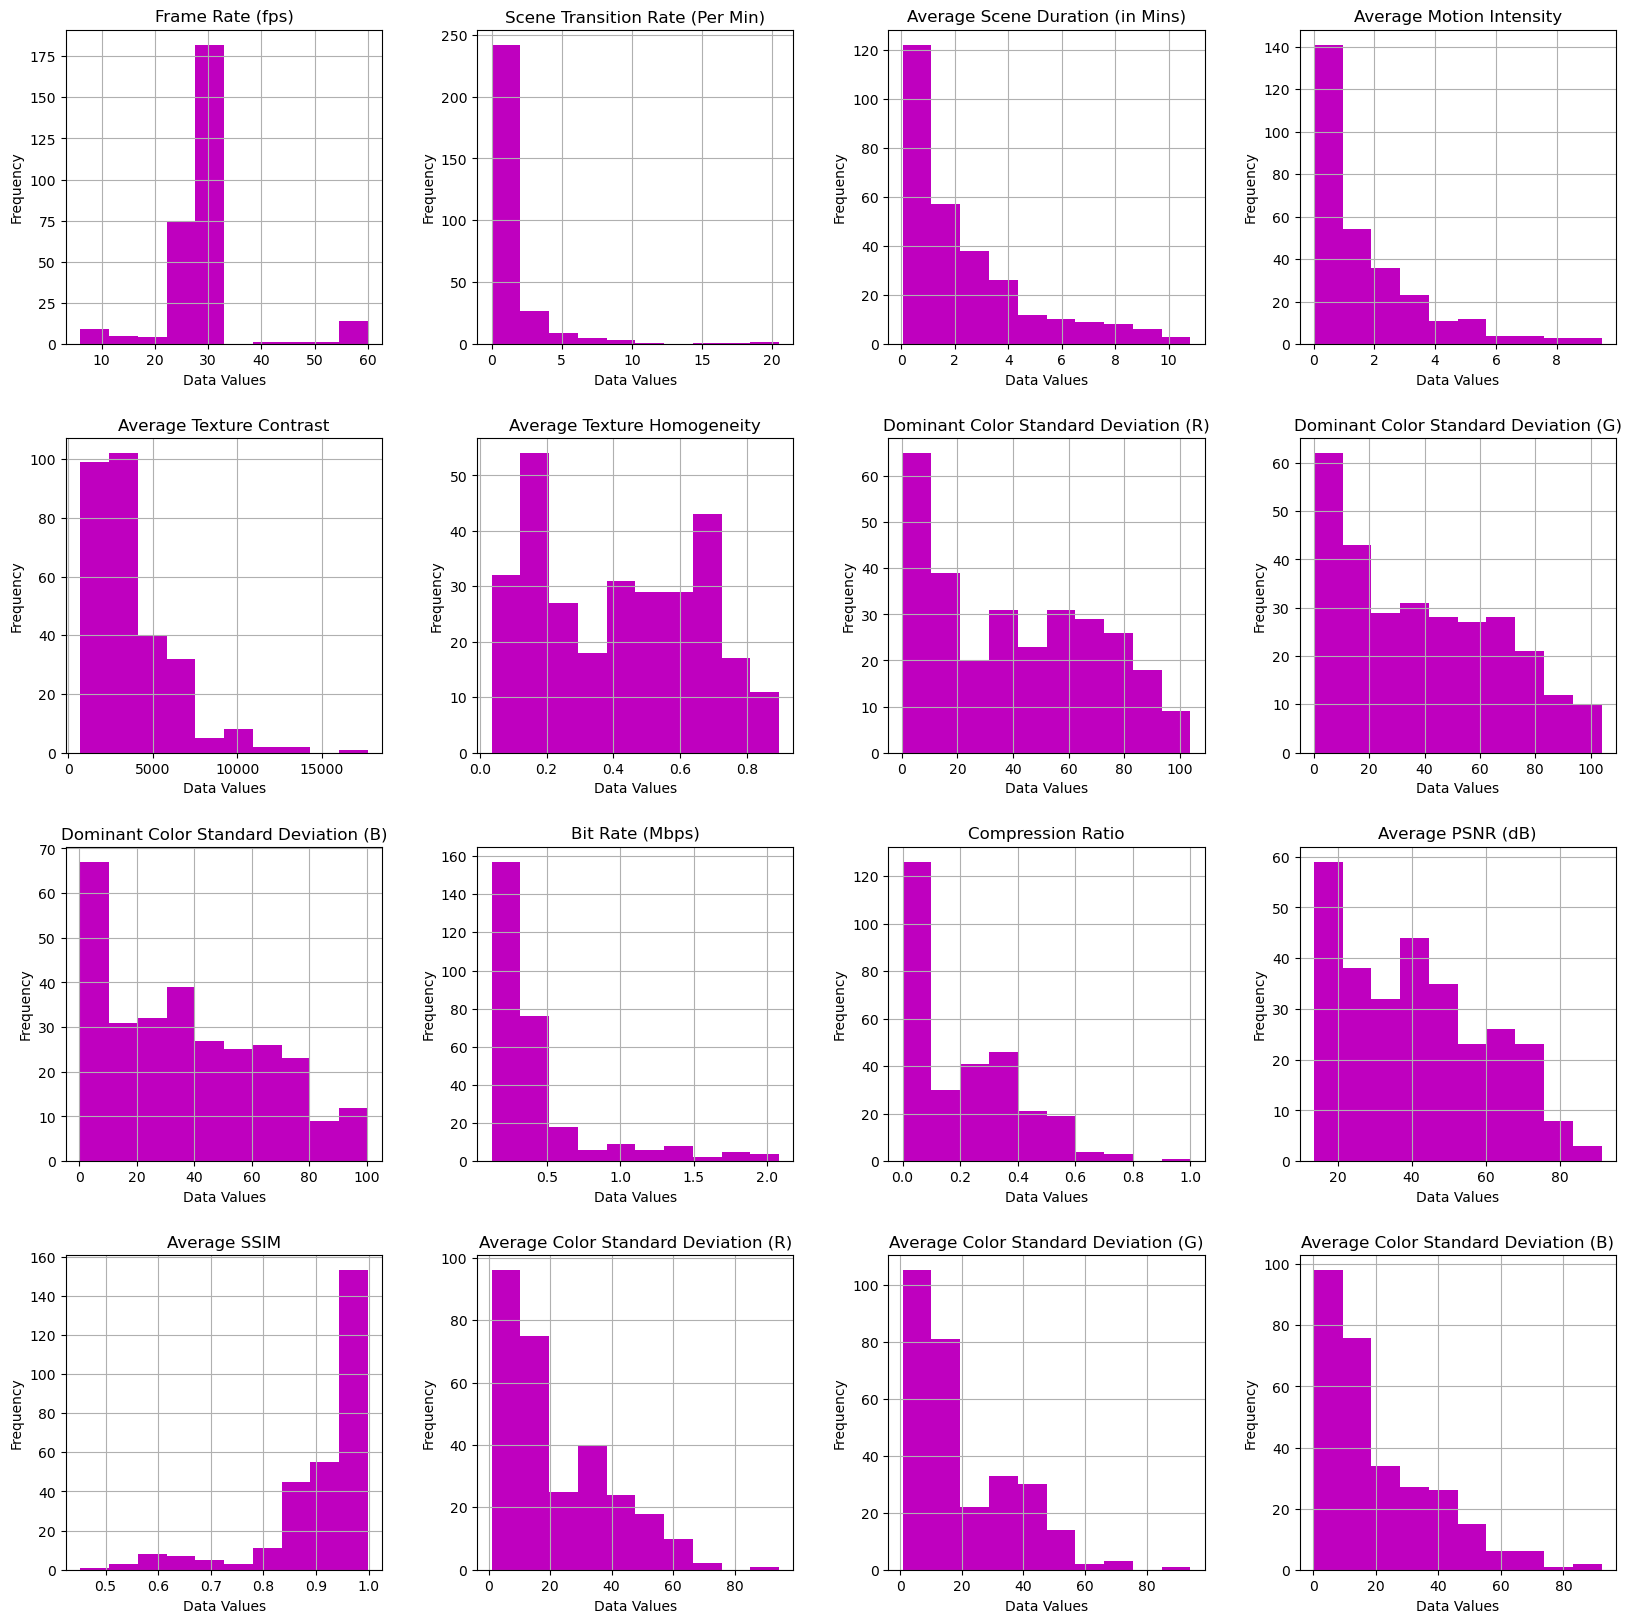

In [15]:
# plot a histogram for each input feature to visualize their distribution
plt.rcParams.update({'figure.figsize':(20,20), 'figure.dpi':100})

fig, axis = plt.subplots(4, 4)
histogram = X.hist(ax=axis, color='m')

for subplot in histogram.flatten():
    subplot.set_xlabel('Data Values')
    subplot.set_ylabel('Frequency')

plt.show()

In [27]:
# normalize the input features to a similar scale using min max scaling method for unbiased performance in distance-based ML algorithms
# normalization is usually opted when features have skewed distribution instead of a normal distribution
# normalization is done after data splitting, where the scaler learns the transformation strategy using the training set and applies it to both the training and test sets
# this ensures that there is no influence of the test set on the train set which could otherwise introduce bias
scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [28]:
# save the min max scaler
scaler_filename = 'scaler_2.pkl'

with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

## Model Selection

In [18]:
# perform stratified cross validation to validate the model with default parameters using training set
def cross_validation(model, X_train, y_train, cv_value):
    cv_accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv_value)
    cv_precision = cross_val_score(model, X_train, y_train, scoring='precision', cv=cv_value)
    cv_recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=cv_value)
    cv_f1 = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv_value)
    cv_roc_auc = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv_value)

    print(f"Mean Accuracy = {round(cv_accuracy.mean(), 3)}")
    print(f"Mean Precision = {round(cv_precision.mean(), 3)}")
    print(f"Mean Recall = {round(cv_recall.mean(), 3)}")
    print(f"Mean F1-Score = {round(cv_f1.mean(), 3)}")
    print(f"Mean Area Under ROC Curve = {round(cv_roc_auc.mean(), 3)}")

In [19]:
# plot normalized confusion matrix using the actual and predicted values
def plot_norm_confusion_matrix(algorithm_name, y_actual, y_pred):
    plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
    
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_actual, y_pred, normalize='true', values_format='.2f', display_labels=['simple', 'hard'], cmap=plt.cm.Purples)
    plt.title(f'Normalized Confusion Matrix for {algorithm_name}', pad=10)
    plt.show()

In [20]:
# calculate the area under the ROC curve and plot the ROC curve using the actual and predicted values
def plot_roc_auc_curve(algorithm_name, model, X, y_actual):
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    
    y_pred_prob = model.predict_proba(X)[:, 1]
    
    roc_auc = round(metrics.roc_auc_score(y_actual, y_pred_prob), 3) 
    print(f"Area Under ROC curve = {roc_auc}")
    
    fpr, tpr, thresholds = metrics.roc_curve(y_actual, y_pred_prob, pos_label=1)
    plt.plot(fpr, tpr, label=f'Area Under ROC Curve = {roc_auc}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f'ROC Curve for {algorithm_name}', pad=10)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

## 1. Random Forest

### Model Evaluation Before Hyperparameter Tuning using Cross Validation

In [21]:
# build a random forest classifier using the default parameters
# train and validate the model's performance on different subsets of training data by performing stratified 5-fold cross validation
# as our dataset is small, cross validation is used to ensure the performance of the model is not dependent on a particular data split and that it can generalize well to unseen data
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max scaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train set which could otherwise introduce bias
pipe_rf_untuned = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf_untuned', RandomForestClassifier(random_state=42))
])

print(f"Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:\n")
cross_validation(pipe_rf_untuned, X_train, y_train, 5)

Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:

Mean Accuracy = 0.882
Mean Precision = 0.868
Mean Recall = 0.901
Mean F1-Score = 0.884
Mean Area Under ROC Curve = 0.967


### Model Hyperparameter Tuning using GridSearchCV

In [22]:
# perform hyperparamter tuning using GridSearchCV with stratified 5-fold cross validation to evaluate the performance of each combination of hyperparameters using f1-score metric
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max scaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train set which could otherwise introduce bias
pipe_rf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

rf_params = [{
    'rf__n_estimators': [50, 100, 200, 300, 400, 500],
    'rf__max_depth': [None, 5, 10, 15, 20],
    'rf__min_samples_split': [2, 6, 10, 14],
    'rf__min_samples_leaf': [1, 3, 5],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__max_leaf_nodes': [None, 2, 4, 6]
}]

rf_tuned = GridSearchCV(pipe_rf, rf_params, cv=5, scoring='f1', verbose=10)
rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
[CV 1/5; 1/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5; 1/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.952 total time=   0.2s
[CV 3/5; 1/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 1/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_

[CV 4/5; 5/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.5s
[CV 5/5; 5/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 5/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.842 total time=   1.3s
[CV 1/5; 6/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 6/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.884 total time=   1.8s
[CV 2/5; 6/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_sam

[CV 3/5; 10/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.884 total time=   0.9s
[CV 4/5; 10/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 10/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.905 total time=   0.9s
[CV 5/5; 10/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 10/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.842 total time=   0.9s
[CV 1/5; 11/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 15/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.976 total time=   0.6s
[CV 3/5; 15/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 15/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5; 15/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 15/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.905 total time=   0.6s
[CV 5/5; 15/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 5/5; 19/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.872 total time=   0.1s
[CV 1/5; 20/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 20/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 20/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 20/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.976 total time=   0.3s
[CV 3/5; 20/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, r

[CV 3/5; 24/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.8s
[CV 4/5; 24/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 24/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.905 total time=   1.3s
[CV 5/5; 24/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 24/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.821 total time=   1.7s
[CV 1/5; 25/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 2/5; 29/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.4s
[CV 3/5; 29/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 29/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.3s
[CV 4/5; 29/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 29/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.4s
[CV 5/5; 29/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 34/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.884 total time=   1.1s
[CV 2/5; 34/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 34/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.976 total time=   0.9s
[CV 3/5; 34/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 34/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 4/5; 34/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 38/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.842 total time=   0.2s
[CV 1/5; 39/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 39/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 39/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 39/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   0.6s
[CV 3/5; 39/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 43/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.878 total time=   0.1s
[CV 5/5; 43/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 43/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.821 total time=   0.1s
[CV 1/5; 44/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 44/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 44/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf_

[CV 2/5; 48/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.927 total time=   1.3s
[CV 3/5; 48/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 48/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.7s
[CV 4/5; 48/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 48/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.878 total time=   1.8s
[CV 5/5; 48/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 53/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.3s
[CV 2/5; 53/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 53/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.2s
[CV 3/5; 53/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 53/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.4s
[CV 4/5; 53/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 57/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.789 total time=   0.7s
[CV 1/5; 58/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 58/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 2/5; 58/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 58/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   1.0s
[CV 3/5; 58/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 4/5; 62/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.905 total time=   0.3s
[CV 5/5; 62/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 62/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.811 total time=   0.2s
[CV 1/5; 63/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 63/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 63/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 2/5; 67/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5; 67/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 67/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.844 total time=   0.1s
[CV 4/5; 67/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 67/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.829 total time=   0.0s
[CV 5/5; 67/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 71/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.811 total time=   1.4s
[CV 1/5; 72/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 72/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.8s
[CV 2/5; 72/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 72/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.905 total time=   1.7s
[CV 3/5; 72/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 76/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.756 total time=   1.0s
[CV 5/5; 76/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 76/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.9s
[CV 1/5; 77/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 77/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.851 total time=   1.2s
[CV 2/5; 77/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 3/5; 81/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.809 total time=   0.6s
[CV 4/5; 81/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 81/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.756 total time=   0.6s
[CV 5/5; 81/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 81/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.5s
[CV 1/5; 82/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 2/5; 86/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5; 86/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 86/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.809 total time=   0.2s
[CV 4/5; 86/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 86/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.2s
[CV 5/5; 86/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 91/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 91/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 91/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 4/5; 91/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 91/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5; 91/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 96/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.851 total time=   1.6s
[CV 2/5; 96/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 96/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.833 total time=   1.7s
[CV 3/5; 96/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 96/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   1.5s
[CV 4/5; 96/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 100/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   1.0s
[CV 1/5; 101/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 101/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.851 total time=   1.2s
[CV 2/5; 101/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 101/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   1.2s
[CV 3/5; 101/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 4/5; 105/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.756 total time=   0.7s
[CV 5/5; 105/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 105/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.8s
[CV 1/5; 106/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 106/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.851 total time=   1.1s
[CV 2/5; 106/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 3/5; 110/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.809 total time=   0.3s
[CV 4/5; 110/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 110/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.3s
[CV 5/5; 110/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 110/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 111/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samp

[CV 2/5; 115/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 115/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 115/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 4/5; 115/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 115/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 115/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 1/5; 120/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.851 total time=   2.1s
[CV 2/5; 120/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 120/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.833 total time=   2.1s
[CV 3/5; 120/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 120/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   1.4s
[CV 4/5; 120/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samp

[CV 5/5; 124/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.8s
[CV 1/5; 125/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 125/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.851 total time=   1.3s
[CV 2/5; 125/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 125/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   1.3s
[CV 3/5; 125/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 4/5; 129/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.756 total time=   0.6s
[CV 5/5; 129/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 129/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.6s
[CV 1/5; 130/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 130/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.851 total time=   0.9s
[CV 2/5; 130/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 3/5; 134/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.809 total time=   0.2s
[CV 4/5; 134/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 134/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.3s
[CV 5/5; 134/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 134/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 135/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samp

[CV 2/5; 139/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 139/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 139/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 4/5; 139/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 139/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 139/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 1/5; 144/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.851 total time=   1.5s
[CV 2/5; 144/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 144/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.833 total time=   1.5s
[CV 3/5; 144/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 144/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   1.7s
[CV 4/5; 144/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samp

[CV 5/5; 148/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.9s
[CV 1/5; 149/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 149/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.2s
[CV 2/5; 149/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 149/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   1.2s
[CV 3/5; 149/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 4/5; 153/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.837 total time=   0.5s
[CV 5/5; 153/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 153/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.6s
[CV 1/5; 154/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 154/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 2/5; 154/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 3/5; 158/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 158/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 158/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.2s
[CV 5/5; 158/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 158/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.3s
[CV 1/5; 159/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samp

[CV 2/5; 163/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5; 163/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 163/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.826 total time=   0.1s
[CV 4/5; 163/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 163/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.1s
[CV 5/5; 163/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 1/5; 168/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.5s
[CV 2/5; 168/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 168/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.889 total time=   1.6s
[CV 3/5; 168/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 168/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 4/5; 168/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samp

[CV 5/5; 172/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.9s
[CV 1/5; 173/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 173/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.2s
[CV 2/5; 173/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 173/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.889 total time=   1.3s
[CV 3/5; 173/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 4/5; 177/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.837 total time=   0.5s
[CV 5/5; 177/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 177/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.5s
[CV 1/5; 178/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 178/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 2/5; 178/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 3/5; 182/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 182/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 182/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.2s
[CV 5/5; 182/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 182/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 183/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samp

[CV 2/5; 187/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5; 187/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 187/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.826 total time=   0.1s
[CV 4/5; 187/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 187/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 5/5; 187/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 1/5; 192/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.9s
[CV 2/5; 192/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 192/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.889 total time=   1.8s
[CV 3/5; 192/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 192/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.7s
[CV 4/5; 192/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samp

[CV 5/5; 196/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   1.2s
[CV 1/5; 197/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 197/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.4s
[CV 2/5; 197/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 197/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   1.5s
[CV 3/5; 197/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 4/5; 201/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.810 total time=   0.4s
[CV 5/5; 201/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 201/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.5s
[CV 1/5; 202/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 202/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 2/5; 202/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 4/5; 206/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.773 total time=   0.1s
[CV 5/5; 206/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 206/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.1s
[CV 1/5; 207/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 207/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.3s
[CV 2/5; 207/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samp

[CV 4/5; 211/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.791 total time=   0.1s
[CV 5/5; 211/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 211/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 212/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 212/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 212/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples

[CV 3/5; 216/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 4/5; 216/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 216/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.791 total time=   1.6s
[CV 5/5; 216/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 216/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.4s
[CV 1/5; 217/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 2/5; 221/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.3s
[CV 3/5; 221/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 221/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.1s
[CV 4/5; 221/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 221/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.878 total time=   1.4s
[CV 5/5; 221/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 1/5; 226/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.1s
[CV 2/5; 226/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 226/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   0.8s
[CV 3/5; 226/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 226/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 226/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 230/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.821 total time=   0.3s
[CV 1/5; 231/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 231/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 231/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 231/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   0.6s
[CV 3/5; 231/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 4/5; 235/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.878 total time=   0.1s
[CV 5/5; 235/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 235/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.821 total time=   0.1s
[CV 1/5; 236/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 236/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 236/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples

[CV 3/5; 240/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 4/5; 240/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 240/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.878 total time=   1.6s
[CV 5/5; 240/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 240/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.821 total time=   1.6s
[CV 1/5; 241/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 2/5; 245/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.3s
[CV 3/5; 245/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 245/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.4s
[CV 4/5; 245/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 245/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.878 total time=   1.3s
[CV 5/5; 245/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 1/5; 250/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 2/5; 250/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 250/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   1.0s
[CV 3/5; 250/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 250/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 4/5; 250/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 254/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.800 total time=   0.2s
[CV 1/5; 255/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 255/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 255/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 255/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.976 total time=   0.6s
[CV 3/5; 255/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 4/5; 259/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5; 259/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 259/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.821 total time=   0.1s
[CV 1/5; 260/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 260/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 260/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples

[CV 3/5; 264/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.5s
[CV 4/5; 264/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 264/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.878 total time=   1.5s
[CV 5/5; 264/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 264/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.821 total time=   1.6s
[CV 1/5; 265/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 2/5; 269/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.3s
[CV 3/5; 269/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 269/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.2s
[CV 4/5; 269/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 269/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.829 total time=   1.3s
[CV 5/5; 269/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 1/5; 274/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 2/5; 274/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 274/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.905 total time=   0.9s
[CV 3/5; 274/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 274/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 274/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 278/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.821 total time=   0.3s
[CV 1/5; 279/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 279/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 279/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 279/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.930 total time=   0.7s
[CV 3/5; 279/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 4/5; 283/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.829 total time=   0.1s
[CV 5/5; 283/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 283/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.821 total time=   0.1s
[CV 1/5; 284/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 284/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 284/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples

[CV 3/5; 288/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.8s
[CV 4/5; 288/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 288/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.857 total time=   1.6s
[CV 5/5; 288/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 288/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   1.7s
[CV 1/5; 289/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_s

[CV 2/5; 293/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.3s
[CV 3/5; 293/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 293/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.2s
[CV 4/5; 293/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 293/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.2s
[CV 5/5; 293/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 5/5; 297/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.842 total time=   0.7s
[CV 1/5; 298/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 298/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.857 total time=   1.0s
[CV 2/5; 298/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 298/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   1.1s
[CV 3/5; 298/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 3/5; 302/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 302/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 302/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.905 total time=   0.3s
[CV 5/5; 302/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 302/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.842 total time=   0.3s
[CV 1/5; 303/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 2/5; 307/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.927 total time=   0.1s
[CV 3/5; 307/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 307/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5; 307/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 307/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 5/5; 307/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 5/5; 311/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.821 total time=   1.3s
[CV 1/5; 312/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 312/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.837 total time=   1.7s
[CV 2/5; 312/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 312/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.927 total time=   1.6s
[CV 3/5; 312/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 3/5; 316/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 4/5; 316/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 316/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.905 total time=   1.0s
[CV 5/5; 316/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 316/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.811 total time=   1.0s
[CV 1/5; 317/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 1/5; 321/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.884 total time=   0.6s
[CV 2/5; 321/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 2/5; 321/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.976 total time=   0.6s
[CV 3/5; 321/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 321/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 321/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 4/5; 325/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 5/5; 325/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 5/5; 325/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.789 total time=   0.1s
[CV 1/5; 326/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 1/5; 326/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 326/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=Non

[CV 2/5; 330/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.952 total time=   1.8s
[CV 3/5; 330/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 3/5; 330/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.844 total time=   1.7s
[CV 4/5; 330/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 4/5; 330/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.878 total time=   1.7s
[CV 5/5; 330/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 5/5; 334/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.811 total time=   0.9s
[CV 1/5; 335/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 1/5; 335/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.864 total time=   1.3s
[CV 2/5; 335/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 2/5; 335/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.952 total time=   1.4s
[CV 3/5; 335/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 3/5; 339/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.864 total time=   0.7s
[CV 4/5; 339/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 339/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.878 total time=   0.7s
[CV 5/5; 339/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 5/5; 339/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.789 total time=   0.6s
[CV 1/5; 340/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 1/5; 344/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 344/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 344/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 344/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 344/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 344/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 4/5; 348/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.857 total time=   1.8s
[CV 5/5; 348/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 348/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.811 total time=   1.6s
[CV 1/5; 349/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 349/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 349/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 2/5; 353/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.952 total time=   1.2s
[CV 3/5; 353/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 353/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.864 total time=   1.2s
[CV 4/5; 353/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 353/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.857 total time=   1.4s
[CV 5/5; 353/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 5/5; 357/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.789 total time=   0.6s
[CV 1/5; 358/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 1/5; 358/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 2/5; 358/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 358/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.927 total time=   1.0s
[CV 3/5; 358/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 4/5; 362/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.756 total time=   0.3s
[CV 5/5; 362/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 5/5; 362/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.780 total time=   0.3s
[CV 1/5; 363/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 363/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.851 total time=   0.5s
[CV 2/5; 363/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 4/5; 367/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 367/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 367/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 368/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 368/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 368/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf

[CV 3/5; 372/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.809 total time=   1.5s
[CV 4/5; 372/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 372/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.756 total time=   1.6s
[CV 5/5; 372/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 372/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.780 total time=   1.5s
[CV 1/5; 373/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 2/5; 377/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.833 total time=   1.1s
[CV 3/5; 377/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 377/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.809 total time=   1.3s
[CV 4/5; 377/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 377/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.756 total time=   1.2s
[CV 5/5; 377/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 1/5; 382/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.851 total time=   0.9s
[CV 2/5; 382/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 382/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.833 total time=   0.9s
[CV 3/5; 382/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 382/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.809 total time=   0.9s
[CV 4/5; 382/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 5/5; 386/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 387/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 387/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.851 total time=   0.6s
[CV 2/5; 387/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 387/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.833 total time=   0.5s
[CV 3/5; 387/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 4/5; 391/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 391/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 391/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 392/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 392/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.851 total time=   0.3s
[CV 2/5; 392/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf

[CV 3/5; 396/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.809 total time=   1.6s
[CV 4/5; 396/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 396/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.756 total time=   1.5s
[CV 5/5; 396/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 396/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.780 total time=   1.4s
[CV 1/5; 397/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 2/5; 401/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.833 total time=   1.2s
[CV 3/5; 401/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 401/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.809 total time=   1.2s
[CV 4/5; 401/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 401/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.756 total time=   1.2s
[CV 5/5; 401/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 1/5; 406/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.851 total time=   0.9s
[CV 2/5; 406/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 406/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.833 total time=   0.9s
[CV 3/5; 406/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 406/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.809 total time=   0.9s
[CV 4/5; 406/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 5/5; 410/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.780 total time=   0.3s
[CV 1/5; 411/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 411/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.851 total time=   0.6s
[CV 2/5; 411/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 411/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.833 total time=   0.6s
[CV 3/5; 411/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 4/5; 415/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 415/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 415/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 416/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 416/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.851 total time=   0.3s
[CV 2/5; 416/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf

[CV 3/5; 420/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.809 total time=   1.5s
[CV 4/5; 420/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 420/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.756 total time=   1.5s
[CV 5/5; 420/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 420/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.780 total time=   1.7s
[CV 1/5; 421/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 2/5; 425/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.833 total time=   1.2s
[CV 3/5; 425/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 425/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.809 total time=   1.0s
[CV 4/5; 425/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 425/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.756 total time=   1.3s
[CV 5/5; 425/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 1/5; 430/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.851 total time=   0.8s
[CV 2/5; 430/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 430/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.833 total time=   0.7s
[CV 3/5; 430/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 430/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.809 total time=   0.8s
[CV 4/5; 430/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 5/5; 434/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 435/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 435/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 435/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 435/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.889 total time=   0.6s
[CV 3/5; 435/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 4/5; 439/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.818 total time=   0.1s
[CV 5/5; 439/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 439/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 440/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 440/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 440/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf

[CV 3/5; 444/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.7s
[CV 4/5; 444/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 444/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   1.6s
[CV 5/5; 444/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 444/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.780 total time=   1.7s
[CV 1/5; 445/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 2/5; 449/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.889 total time=   1.2s
[CV 3/5; 449/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 449/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.864 total time=   1.2s
[CV 4/5; 449/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 449/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.791 total time=   1.2s
[CV 5/5; 449/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 1/5; 454/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.864 total time=   1.1s
[CV 2/5; 454/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 454/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.909 total time=   0.9s
[CV 3/5; 454/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 454/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 4/5; 454/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 5/5; 458/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.780 total time=   0.3s
[CV 1/5; 459/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 459/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 459/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 459/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.930 total time=   0.5s
[CV 3/5; 459/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 4/5; 463/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.837 total time=   0.1s
[CV 5/5; 463/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 463/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 464/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 464/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 464/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf

[CV 3/5; 468/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.5s
[CV 4/5; 468/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 468/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.791 total time=   1.6s
[CV 5/5; 468/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 468/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.780 total time=   1.5s
[CV 1/5; 469/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 2/5; 473/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.889 total time=   1.3s
[CV 3/5; 473/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 473/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.864 total time=   1.3s
[CV 4/5; 473/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 473/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.810 total time=   1.2s
[CV 5/5; 473/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 1/5; 478/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 2/5; 478/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 478/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.909 total time=   1.0s
[CV 3/5; 478/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 478/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 4/5; 478/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 5/5; 482/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 483/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 483/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 483/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 483/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.889 total time=   0.6s
[CV 3/5; 483/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 4/5; 487/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.791 total time=   0.0s
[CV 5/5; 487/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 487/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 488/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 488/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 488/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf

[CV 3/5; 492/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.5s
[CV 4/5; 492/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 492/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.791 total time=   1.6s
[CV 5/5; 492/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 492/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.780 total time=   1.6s
[CV 1/5; 493/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 2/5; 497/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.870 total time=   1.2s
[CV 3/5; 497/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 497/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.864 total time=   1.1s
[CV 4/5; 497/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 497/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.791 total time=   1.4s
[CV 5/5; 497/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 1/5; 502/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 2/5; 502/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 502/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.889 total time=   0.9s
[CV 3/5; 502/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 502/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 502/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 5/5; 506/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.821 total time=   0.3s
[CV 1/5; 507/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 507/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.864 total time=   0.7s
[CV 2/5; 507/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 507/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.952 total time=   0.6s
[CV 3/5; 507/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 4/5; 511/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5; 511/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 511/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.821 total time=   0.0s
[CV 1/5; 512/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 512/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 512/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf

[CV 3/5; 516/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 4/5; 516/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 516/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.878 total time=   1.5s
[CV 5/5; 516/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 516/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.821 total time=   1.6s
[CV 1/5; 517/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 2/5; 521/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.952 total time=   1.2s
[CV 3/5; 521/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 521/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.864 total time=   1.3s
[CV 4/5; 521/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 521/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.878 total time=   1.4s
[CV 5/5; 521/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 1/5; 526/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 2/5; 526/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 526/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.950 total time=   1.1s
[CV 3/5; 526/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 526/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 4/5; 526/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 5/5; 530/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.821 total time=   0.3s
[CV 1/5; 531/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 531/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.864 total time=   0.7s
[CV 2/5; 531/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 531/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.976 total time=   0.6s
[CV 3/5; 531/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 535/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.821 total time=   0.1s
[CV 1/5; 536/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 536/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 536/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 536/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 536/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 4/5; 540/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.857 total time=   1.7s
[CV 5/5; 540/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 540/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.821 total time=   1.6s
[CV 1/5; 541/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 541/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 541/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 3/5; 545/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.844 total time=   1.3s
[CV 4/5; 545/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 545/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.878 total time=   1.3s
[CV 5/5; 545/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 545/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.821 total time=   1.4s
[CV 1/5; 546/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 2/5; 550/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.927 total time=   0.9s
[CV 3/5; 550/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 550/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 4/5; 550/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 550/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.878 total time=   1.0s
[CV 5/5; 550/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 1/5; 555/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 555/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 555/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.930 total time=   0.6s
[CV 3/5; 555/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 555/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5; 555/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 1/5; 560/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 560/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 560/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 560/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 560/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5; 560/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 564/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.789 total time=   1.6s
[CV 1/5; 565/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 565/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 565/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 565/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 565/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 4/5; 569/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.829 total time=   1.3s
[CV 5/5; 569/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 569/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.789 total time=   1.2s
[CV 1/5; 570/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 570/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5; 570/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 3/5; 574/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.864 total time=   1.2s
[CV 4/5; 574/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 574/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.857 total time=   0.8s
[CV 5/5; 574/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 574/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.821 total time=   1.0s
[CV 1/5; 575/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 2/5; 579/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.927 total time=   0.8s
[CV 3/5; 579/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 579/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.844 total time=   0.8s
[CV 4/5; 579/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 579/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.927 total time=   1.0s
[CV 5/5; 579/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 5/5; 583/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.842 total time=   0.1s
[CV 1/5; 584/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 584/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.857 total time=   0.4s
[CV 2/5; 584/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 584/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.927 total time=   0.4s
[CV 3/5; 584/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 3/5; 588/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   2.5s
[CV 4/5; 588/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 588/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   2.6s
[CV 5/5; 588/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 588/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.842 total time=   2.5s
[CV 1/5; 589/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 1/5; 593/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.800 total time=   2.0s
[CV 2/5; 593/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 2/5; 593/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.905 total time=   1.8s
[CV 3/5; 593/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 593/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.844 total time=   1.7s
[CV 4/5; 593/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 4/5; 597/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.923 total time=   0.9s
[CV 5/5; 597/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 5/5; 597/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.811 total time=   1.0s
[CV 1/5; 598/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 1/5; 598/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.837 total time=   1.3s
[CV 2/5; 598/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 2/5; 602/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.927 total time=   0.4s
[CV 3/5; 602/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 602/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 602/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 4/5; 602/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.3s
[CV 5/5; 602/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 5/5; 606/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.811 total time=   2.4s
[CV 1/5; 607/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 607/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.837 total time=   0.2s
[CV 2/5; 607/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 607/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.905 total time=   0.2s
[CV 3/5; 607/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf_

[CV 3/5; 611/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.844 total time=   2.0s
[CV 4/5; 611/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 611/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.927 total time=   1.9s
[CV 5/5; 611/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 611/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.811 total time=   1.7s
[CV 1/5; 612/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 1/5; 616/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.818 total time=   1.4s
[CV 2/5; 616/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 616/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.905 total time=   1.2s
[CV 3/5; 616/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 616/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.844 total time=   1.2s
[CV 4/5; 616/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 4/5; 620/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.872 total time=   0.4s
[CV 5/5; 620/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 620/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.778 total time=   0.4s
[CV 1/5; 621/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 621/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.837 total time=   0.9s
[CV 2/5; 621/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 2/5; 625/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.923 total time=   0.2s
[CV 3/5; 625/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 625/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.844 total time=   0.1s
[CV 4/5; 625/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 625/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.842 total time=   0.1s
[CV 5/5; 625/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__

[CV 5/5; 629/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.6s
[CV 1/5; 630/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 630/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.837 total time=   1.9s
[CV 2/5; 630/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 2/5; 630/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.927 total time=   2.1s
[CV 3/5; 630/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 3/5; 634/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.3s
[CV 4/5; 634/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 634/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   1.2s
[CV 5/5; 634/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 634/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   1.3s
[CV 1/5; 635/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 1/5; 639/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   0.9s
[CV 2/5; 639/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 639/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.927 total time=   0.7s
[CV 3/5; 639/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 639/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.9s
[CV 4/5; 639/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 4/5; 643/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.842 total time=   0.2s
[CV 5/5; 643/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 643/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.811 total time=   0.1s
[CV 1/5; 644/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 644/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.810 total time=   0.4s
[CV 2/5; 644/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=Non

[CV 2/5; 648/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   2.2s
[CV 3/5; 648/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 648/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   2.0s
[CV 4/5; 648/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 648/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.872 total time=   2.0s
[CV 5/5; 648/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 1/5; 653/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   1.6s
[CV 2/5; 653/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 653/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.809 total time=   1.5s
[CV 3/5; 653/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 653/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.826 total time=   1.6s
[CV 4/5; 653/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 5/5; 657/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.750 total time=   0.8s
[CV 1/5; 658/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 658/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.833 total time=   1.1s
[CV 2/5; 658/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 658/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   1.1s
[CV 3/5; 658/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 4/5; 662/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.667 total time=   0.4s
[CV 5/5; 662/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 662/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.750 total time=   0.4s
[CV 1/5; 663/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 663/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.6s
[CV 2/5; 663/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samp

[CV 3/5; 667/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.2s
[CV 4/5; 667/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 667/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.667 total time=   0.1s
[CV 5/5; 667/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 667/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.750 total time=   0.1s
[CV 1/5; 668/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 2/5; 672/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   3.0s
[CV 3/5; 672/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 672/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.826 total time=   3.7s
[CV 4/5; 672/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 672/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.667 total time=   2.3s
[CV 5/5; 672/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samp

[CV 1/5; 677/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   1.7s
[CV 2/5; 677/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 677/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.809 total time=   1.6s
[CV 3/5; 677/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 677/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.826 total time=   1.7s
[CV 4/5; 677/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 5/5; 681/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.750 total time=   0.9s
[CV 1/5; 682/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 682/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.833 total time=   1.1s
[CV 2/5; 682/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 682/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   1.1s
[CV 3/5; 682/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 4/5; 686/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.667 total time=   0.3s
[CV 5/5; 686/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 686/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.750 total time=   0.3s
[CV 1/5; 687/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 687/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.7s
[CV 2/5; 687/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samp

[CV 4/5; 691/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.667 total time=   0.0s
[CV 5/5; 691/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 691/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.750 total time=   0.1s
[CV 1/5; 692/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 692/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.3s
[CV 2/5; 692/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples

[CV 3/5; 696/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.826 total time=   1.8s
[CV 4/5; 696/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 696/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.667 total time=   1.9s
[CV 5/5; 696/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 696/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.750 total time=   1.8s
[CV 1/5; 697/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samp

[CV 2/5; 701/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.809 total time=   1.4s
[CV 3/5; 701/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 701/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.826 total time=   1.2s
[CV 4/5; 701/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 701/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.667 total time=   1.4s
[CV 5/5; 701/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 1/5; 706/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.833 total time=   1.1s
[CV 2/5; 706/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 706/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   1.0s
[CV 3/5; 706/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 706/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.826 total time=   1.0s
[CV 4/5; 706/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 5/5; 710/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.750 total time=   0.3s
[CV 1/5; 711/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 711/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.6s
[CV 2/5; 711/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 711/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.6s
[CV 3/5; 711/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samp

[CV 4/5; 715/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.667 total time=   0.0s
[CV 5/5; 715/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 715/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.750 total time=   0.0s
[CV 1/5; 716/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 716/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 716/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples

[CV 3/5; 720/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.826 total time=   1.6s
[CV 4/5; 720/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 720/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.667 total time=   1.8s
[CV 5/5; 720/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 720/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.750 total time=   2.0s
[CV 1/5; 721/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 2/5; 725/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.6s
[CV 3/5; 725/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 725/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.5s
[CV 4/5; 725/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 725/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.842 total time=   1.6s
[CV 5/5; 725/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 1/5; 730/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   1.1s
[CV 2/5; 730/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 730/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.884 total time=   1.2s
[CV 3/5; 730/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 730/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.3s
[CV 4/5; 730/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 5/5; 734/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.789 total time=   0.3s
[CV 1/5; 735/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 735/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   0.7s
[CV 2/5; 735/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 735/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.884 total time=   0.7s
[CV 3/5; 735/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 4/5; 739/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.778 total time=   0.1s
[CV 5/5; 739/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 739/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.789 total time=   0.1s
[CV 1/5; 740/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 740/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5; 740/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples

[CV 3/5; 744/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   2.0s
[CV 4/5; 744/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 744/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.842 total time=   2.1s
[CV 5/5; 744/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 744/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   2.1s
[CV 1/5; 745/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 2/5; 749/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.884 total time=   1.6s
[CV 3/5; 749/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 749/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.6s
[CV 4/5; 749/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 749/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.7s
[CV 5/5; 749/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 1/5; 754/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   1.0s
[CV 2/5; 754/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 754/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 3/5; 754/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 754/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.1s
[CV 4/5; 754/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 5/5; 758/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.789 total time=   0.2s
[CV 1/5; 759/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 759/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   0.6s
[CV 2/5; 759/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 759/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.884 total time=   0.8s
[CV 3/5; 759/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 4/5; 763/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.778 total time=   0.2s
[CV 5/5; 763/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 763/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.789 total time=   0.1s
[CV 1/5; 764/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 764/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5; 764/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples

[CV 3/5; 768/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   2.9s
[CV 4/5; 768/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 768/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   2.7s
[CV 5/5; 768/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 768/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   2.9s
[CV 1/5; 769/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 2/5; 773/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.884 total time=   1.8s
[CV 3/5; 773/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 773/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   2.0s
[CV 4/5; 773/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 773/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.7s
[CV 5/5; 773/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 1/5; 778/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.791 total time=   1.6s
[CV 2/5; 778/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 778/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.884 total time=   1.1s
[CV 3/5; 778/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 778/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.3s
[CV 4/5; 778/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 5/5; 782/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.789 total time=   0.4s
[CV 1/5; 783/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 783/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.810 total time=   0.9s
[CV 2/5; 783/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 783/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.884 total time=   0.8s
[CV 3/5; 783/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 4/5; 787/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.743 total time=   0.2s
[CV 5/5; 787/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 787/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.789 total time=   0.1s
[CV 1/5; 788/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 788/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.810 total time=   0.4s
[CV 2/5; 788/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples

[CV 3/5; 792/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   2.2s
[CV 4/5; 792/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 792/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   2.3s
[CV 5/5; 792/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 792/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   2.3s
[CV 1/5; 793/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 2/5; 797/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.9s
[CV 3/5; 797/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 797/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.9s
[CV 4/5; 797/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 797/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.850 total time=   1.9s
[CV 5/5; 797/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 1/5; 802/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   1.2s
[CV 2/5; 802/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 802/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.927 total time=   1.3s
[CV 3/5; 802/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 802/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.2s
[CV 4/5; 802/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 806/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.811 total time=   0.5s
[CV 1/5; 807/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 807/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   1.0s
[CV 2/5; 807/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 807/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.927 total time=   0.9s
[CV 3/5; 807/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 4/5; 811/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.811 total time=   0.2s
[CV 5/5; 811/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 811/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.811 total time=   0.2s
[CV 1/5; 812/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 812/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 812/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples

[CV 3/5; 816/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   2.0s
[CV 4/5; 816/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 816/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.872 total time=   2.2s
[CV 5/5; 816/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 816/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   2.3s
[CV 1/5; 817/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 2/5; 821/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.927 total time=   1.8s
[CV 3/5; 821/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 821/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.7s
[CV 4/5; 821/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 821/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   1.8s
[CV 5/5; 821/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 1/5; 826/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   1.3s
[CV 2/5; 826/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 826/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.927 total time=   1.5s
[CV 3/5; 826/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 826/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.1s
[CV 4/5; 826/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 830/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.811 total time=   0.4s
[CV 1/5; 831/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 831/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   0.7s
[CV 2/5; 831/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 831/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.927 total time=   1.2s
[CV 3/5; 831/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 4/5; 835/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.842 total time=   0.2s
[CV 5/5; 835/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 835/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.811 total time=   0.1s
[CV 1/5; 836/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 836/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 836/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples

[CV 3/5; 840/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   2.3s
[CV 4/5; 840/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 840/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   2.3s
[CV 5/5; 840/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 840/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   2.3s
[CV 1/5; 841/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 2/5; 845/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.927 total time=   1.6s
[CV 3/5; 845/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 845/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.9s
[CV 4/5; 845/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 845/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.872 total time=   1.7s
[CV 5/5; 845/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 1/5; 850/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.837 total time=   1.2s
[CV 2/5; 850/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 850/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.927 total time=   1.3s
[CV 3/5; 850/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 850/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.2s
[CV 4/5; 850/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 854/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.811 total time=   0.4s
[CV 1/5; 855/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 855/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   0.9s
[CV 2/5; 855/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 855/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.8s
[CV 3/5; 855/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 4/5; 859/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.811 total time=   0.1s
[CV 5/5; 859/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 859/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.811 total time=   0.1s
[CV 1/5; 860/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 860/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.810 total time=   0.3s
[CV 2/5; 860/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples

[CV 3/5; 864/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   2.0s
[CV 4/5; 864/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 864/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.872 total time=   2.3s
[CV 5/5; 864/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 864/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   2.4s
[CV 1/5; 865/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 2/5; 869/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.4s
[CV 3/5; 869/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 869/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.5s
[CV 4/5; 869/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 869/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.5s
[CV 5/5; 869/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 1/5; 874/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 2/5; 874/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 874/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   1.0s
[CV 3/5; 874/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 874/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 4/5; 874/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 5/5; 878/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.872 total time=   0.3s
[CV 1/5; 879/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 879/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.7s
[CV 2/5; 879/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 879/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   1.0s
[CV 3/5; 879/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 4/5; 883/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 5/5; 883/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 883/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.829 total time=   0.1s
[CV 1/5; 884/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 884/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 884/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples

[CV 3/5; 888/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.7s
[CV 4/5; 888/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 888/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.905 total time=   1.7s
[CV 5/5; 888/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 888/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.821 total time=   1.7s
[CV 1/5; 889/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 2/5; 893/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.5s
[CV 3/5; 893/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 893/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.3s
[CV 4/5; 893/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 893/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.4s
[CV 5/5; 893/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 1/5; 898/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 2/5; 898/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 898/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   1.0s
[CV 3/5; 898/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 898/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   0.8s
[CV 4/5; 898/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 5/5; 902/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.821 total time=   0.3s
[CV 1/5; 903/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 903/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.7s
[CV 2/5; 903/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 903/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   0.7s
[CV 3/5; 903/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 4/5; 907/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.878 total time=   0.1s
[CV 5/5; 907/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 907/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.821 total time=   0.1s
[CV 1/5; 908/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 908/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 908/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples

[CV 3/5; 912/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   2.3s
[CV 4/5; 912/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 912/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.878 total time=   1.8s
[CV 5/5; 912/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 912/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   1.7s
[CV 1/5; 913/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 2/5; 917/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.3s
[CV 3/5; 917/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 917/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.7s
[CV 4/5; 917/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 917/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.857 total time=   1.4s
[CV 5/5; 917/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 1/5; 922/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 2/5; 922/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 922/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   1.0s
[CV 3/5; 922/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 922/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 4/5; 922/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 5/5; 926/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.811 total time=   0.3s
[CV 1/5; 927/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 927/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 2/5; 927/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 927/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   0.6s
[CV 3/5; 927/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 1/5; 932/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 932/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 932/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.952 total time=   0.1s
[CV 3/5; 932/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 932/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 932/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 5/5; 936/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   0.9s
[CV 1/5; 937/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 937/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.851 total time=   0.0s
[CV 2/5; 937/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 937/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 937/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_sam

[CV 4/5; 941/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.756 total time=   0.6s
[CV 5/5; 941/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 941/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.780 total time=   0.7s
[CV 1/5; 942/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 942/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.851 total time=   0.9s
[CV 2/5; 942/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_sam

[CV 3/5; 946/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   0.5s
[CV 4/5; 946/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 946/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.756 total time=   0.6s
[CV 5/5; 946/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 946/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.6s
[CV 1/5; 947/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_sam

[CV 2/5; 951/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.3s
[CV 3/5; 951/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 951/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.3s
[CV 4/5; 951/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 951/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.756 total time=   0.3s
[CV 5/5; 951/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__mi

[CV 1/5; 956/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.1s
[CV 2/5; 956/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 956/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5; 956/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 956/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.809 total time=   0.0s
[CV 4/5; 956/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__mi

[CV 5/5; 960/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.0s
[CV 1/5; 961/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 961/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 961/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 961/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 961/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_sample

[CV 4/5; 965/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.756 total time=   0.7s
[CV 5/5; 965/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 965/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.780 total time=   0.8s
[CV 1/5; 966/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 966/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.851 total time=   0.9s
[CV 2/5; 966/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_sam

[CV 3/5; 970/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   0.5s
[CV 4/5; 970/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 970/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.756 total time=   0.6s
[CV 5/5; 970/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 970/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.4s
[CV 1/5; 971/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_sam

[CV 2/5; 975/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.2s
[CV 3/5; 975/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 975/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.4s
[CV 4/5; 975/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 975/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.756 total time=   0.3s
[CV 5/5; 975/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__mi

[CV 2/5; 980/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.833 total time=   0.1s
[CV 3/5; 980/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 980/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.809 total time=   0.1s
[CV 4/5; 980/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 980/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.756 total time=   0.1s
[CV 5/5; 980/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__mi

[CV 2/5; 985/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 985/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 985/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 4/5; 985/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 985/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5; 985/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_

[CV 1/5; 990/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.851 total time=   0.8s
[CV 2/5; 990/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 2/5; 990/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.833 total time=   0.9s
[CV 3/5; 990/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 990/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.809 total time=   0.9s
[CV 4/5; 990/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_sam

[CV 5/5; 994/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.6s
[CV 1/5; 995/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 1/5; 995/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.851 total time=   0.8s
[CV 2/5; 995/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 995/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.833 total time=   0.5s
[CV 3/5; 995/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_sam

[CV 4/5; 999/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.756 total time=   0.3s
[CV 5/5; 999/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 5/5; 999/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.780 total time=   0.3s
[CV 1/5; 1000/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 1000/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.851 total time=   0.6s
[CV 2/5; 1000/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf_

[CV 4/5; 1004/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.756 total time=   0.0s
[CV 5/5; 1004/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 1004/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.780 total time=   0.0s
[CV 1/5; 1005/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 1005/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.851 total time=   0.4s
[CV 2/5; 1005/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, 

[CV 4/5; 1009/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 5/5; 1009/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 1009/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.780 total time=   0.0s
[CV 1/5; 1010/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 1010/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 1010/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_

[CV 3/5; 1014/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.1s
[CV 4/5; 1014/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 1014/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   1.0s
[CV 5/5; 1014/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 5/5; 1014/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   1.1s
[CV 1/5; 1015/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 2/5; 1019/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.889 total time=   0.6s
[CV 3/5; 1019/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 1019/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.864 total time=   0.7s
[CV 4/5; 1019/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 1019/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.791 total time=   0.7s
[CV 5/5; 1019/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 1/5; 1024/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 2/5; 1024/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 1024/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.909 total time=   0.8s
[CV 3/5; 1024/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 1024/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 1024/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 5/5; 1028/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 1029/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 1029/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 1029/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 1029/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.909 total time=   0.5s
[CV 3/5; 1029/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 5/5; 1033/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 1034/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 1034/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 1034/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1034/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.930 total time=   0.2s
[CV 3/5; 1034/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__mi

[CV 4/5; 1038/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.791 total time=   1.5s
[CV 5/5; 1038/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 5/5; 1038/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   1.5s
[CV 1/5; 1039/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1039/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 1039/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min

[CV 3/5; 1043/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.864 total time=   0.7s
[CV 4/5; 1043/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 1043/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.791 total time=   0.8s
[CV 5/5; 1043/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1043/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.780 total time=   0.9s
[CV 1/5; 1044/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 2/5; 1048/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.909 total time=   0.6s
[CV 3/5; 1048/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 1048/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.6s
[CV 4/5; 1048/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1048/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.810 total time=   0.6s
[CV 5/5; 1048/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 1/5; 1053/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 2/5; 1053/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 1053/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.930 total time=   0.3s
[CV 3/5; 1053/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1053/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.3s
[CV 4/5; 1053/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 1/5; 1058/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 1058/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1058/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 3/5; 1058/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1058/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.0s
[CV 4/5; 1058/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 5/5; 1062/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   0.8s
[CV 1/5; 1063/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1063/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 1063/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1063/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 3/5; 1063/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_s

[CV 4/5; 1067/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.791 total time=   0.7s
[CV 5/5; 1067/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1067/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.780 total time=   1.0s
[CV 1/5; 1068/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1068/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 2/5; 1068/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 3/5; 1072/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 1072/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1072/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.791 total time=   0.7s
[CV 5/5; 1072/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1072/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 1073/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 2/5; 1077/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.889 total time=   0.5s
[CV 3/5; 1077/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1077/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5; 1077/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1077/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.810 total time=   0.5s
[CV 5/5; 1077/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 1/5; 1082/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 1082/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1082/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 1082/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1082/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 4/5; 1082/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 5/5; 1086/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.821 total time=   1.4s
[CV 1/5; 1087/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1087/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 1087/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1087/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.923 total time=   0.1s
[CV 3/5; 1087/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_s

[CV 4/5; 1091/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.878 total time=   1.0s
[CV 5/5; 1091/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1091/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.821 total time=   1.0s
[CV 1/5; 1092/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1092/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5; 1092/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 3/5; 1096/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 1096/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1096/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.878 total time=   0.8s
[CV 5/5; 1096/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1096/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.821 total time=   0.6s
[CV 1/5; 1097/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 2/5; 1101/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.950 total time=   0.6s
[CV 3/5; 1101/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1101/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 1101/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1101/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.878 total time=   0.6s
[CV 5/5; 1101/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 1/5; 1106/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 1106/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1106/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.1s
[CV 3/5; 1106/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1106/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 4/5; 1106/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 5/5; 1110/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.821 total time=   1.3s
[CV 1/5; 1111/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1111/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 1111/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1111/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 1111/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_s

[CV 4/5; 1115/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.878 total time=   1.0s
[CV 5/5; 1115/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1115/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.821 total time=   1.2s
[CV 1/5; 1116/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1116/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 2/5; 1116/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 3/5; 1120/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 4/5; 1120/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1120/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.878 total time=   0.6s
[CV 5/5; 1120/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1120/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.821 total time=   0.6s
[CV 1/5; 1121/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 2/5; 1125/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.905 total time=   0.5s
[CV 3/5; 1125/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1125/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 1125/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1125/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.878 total time=   0.6s
[CV 5/5; 1125/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 1/5; 1130/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 1130/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1130/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 1130/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1130/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 1130/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 5/5; 1134/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.789 total time=   1.2s
[CV 1/5; 1135/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1135/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 1135/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1135/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 1135/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_s

[CV 4/5; 1139/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.829 total time=   1.1s
[CV 5/5; 1139/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1139/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.789 total time=   1.0s
[CV 1/5; 1140/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1140/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.4s
[CV 2/5; 1140/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 3/5; 1144/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 1144/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1144/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.857 total time=   0.5s
[CV 5/5; 1144/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1144/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.789 total time=   0.7s
[CV 1/5; 1145/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 2/5; 1149/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.905 total time=   0.4s
[CV 3/5; 1149/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1149/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 1149/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1149/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.857 total time=   0.4s
[CV 5/5; 1149/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 1/5; 1154/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5; 1154/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1154/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.976 total time=   0.1s
[CV 3/5; 1154/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1154/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.857 total time=   0.2s
[CV 4/5; 1154/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 5/5; 1158/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.821 total time=   1.3s
[CV 1/5; 1159/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1159/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5; 1159/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1159/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.976 total time=   0.1s
[CV 3/5; 1159/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples

[CV 4/5; 1163/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.905 total time=   1.1s
[CV 5/5; 1163/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1163/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.842 total time=   1.0s
[CV 1/5; 1164/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1164/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.4s
[CV 2/5; 1164/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 3/5; 1168/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 1168/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1168/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.905 total time=   0.9s
[CV 5/5; 1168/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1168/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.821 total time=   0.7s
[CV 1/5; 1169/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 2/5; 1173/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.952 total time=   0.5s
[CV 3/5; 1173/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1173/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 1173/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1173/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.905 total time=   0.5s
[CV 5/5; 1173/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 1/5; 1178/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5; 1178/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1178/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.976 total time=   0.2s
[CV 3/5; 1178/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1178/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5; 1178/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 5/5; 1182/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.789 total time=   1.4s
[CV 1/5; 1183/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1183/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5; 1183/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1183/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.952 total time=   0.1s
[CV 3/5; 1183/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples

[CV 4/5; 1187/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.905 total time=   1.0s
[CV 5/5; 1187/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1187/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.811 total time=   1.0s
[CV 1/5; 1188/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1188/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.4s
[CV 2/5; 1188/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 3/5; 1192/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 1192/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1192/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.905 total time=   0.8s
[CV 5/5; 1192/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1192/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.811 total time=   0.7s
[CV 1/5; 1193/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 2/5; 1197/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.952 total time=   0.5s
[CV 3/5; 1197/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1197/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 1197/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1197/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.905 total time=   0.6s
[CV 5/5; 1197/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 1/5; 1202/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 1202/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1202/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.1s
[CV 3/5; 1202/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1202/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 1202/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 5/5; 1206/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.789 total time=   1.5s
[CV 1/5; 1207/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1207/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 1207/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1207/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.930 total time=   0.0s
[CV 3/5; 1207/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples

[CV 4/5; 1211/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.857 total time=   1.2s
[CV 5/5; 1211/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1211/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.811 total time=   1.1s
[CV 1/5; 1212/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1212/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.5s
[CV 2/5; 1212/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 3/5; 1216/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 1216/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1216/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.857 total time=   0.8s
[CV 5/5; 1216/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1216/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.789 total time=   0.7s
[CV 1/5; 1217/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 2/5; 1221/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.930 total time=   0.5s
[CV 3/5; 1221/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1221/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 1221/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1221/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.878 total time=   0.4s
[CV 5/5; 1221/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 1/5; 1226/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 1226/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1226/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5; 1226/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1226/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.809 total time=   0.2s
[CV 4/5; 1226/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__m

[CV 5/5; 1230/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   1.2s
[CV 1/5; 1231/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1231/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.851 total time=   0.0s
[CV 2/5; 1231/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1231/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 1231/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_s

[CV 4/5; 1235/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.756 total time=   1.1s
[CV 5/5; 1235/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1235/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.780 total time=   0.9s
[CV 1/5; 1236/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1236/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.851 total time=   1.3s
[CV 2/5; 1236/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__m

[CV 3/5; 1240/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.809 total time=   0.9s
[CV 4/5; 1240/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1240/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.756 total time=   0.8s
[CV 5/5; 1240/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1240/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 1241/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, 

[CV 2/5; 1245/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.833 total time=   0.5s
[CV 3/5; 1245/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1245/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.809 total time=   0.4s
[CV 4/5; 1245/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1245/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.756 total time=   0.5s
[CV 5/5; 1245/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, 

[CV 1/5; 1250/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.851 total time=   0.1s
[CV 2/5; 1250/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1250/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5; 1250/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1250/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.809 total time=   0.1s
[CV 4/5; 1250/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__m

[CV 5/5; 1254/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   1.4s
[CV 1/5; 1255/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1255/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 1255/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1255/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 1255/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_s

[CV 4/5; 1259/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.756 total time=   1.0s
[CV 5/5; 1259/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1259/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.780 total time=   1.0s
[CV 1/5; 1260/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1260/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.851 total time=   1.0s
[CV 2/5; 1260/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__m

[CV 3/5; 1264/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.809 total time=   0.8s
[CV 4/5; 1264/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1264/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.756 total time=   0.9s
[CV 5/5; 1264/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1264/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 1265/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, 

[CV 2/5; 1269/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.833 total time=   0.4s
[CV 3/5; 1269/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1269/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.809 total time=   0.5s
[CV 4/5; 1269/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1269/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.756 total time=   0.5s
[CV 5/5; 1269/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, 

[CV 1/5; 1274/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 1274/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1274/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5; 1274/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1274/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.809 total time=   0.2s
[CV 4/5; 1274/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__m

[CV 5/5; 1278/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   1.3s
[CV 1/5; 1279/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1279/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 1279/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1279/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 1279/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_s

[CV 4/5; 1283/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.756 total time=   1.1s
[CV 5/5; 1283/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1283/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.780 total time=   1.1s
[CV 1/5; 1284/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1284/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.851 total time=   1.4s
[CV 2/5; 1284/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__m

[CV 3/5; 1288/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.809 total time=   0.7s
[CV 4/5; 1288/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1288/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.756 total time=   0.8s
[CV 5/5; 1288/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1288/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 1289/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, 

[CV 2/5; 1293/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.833 total time=   0.4s
[CV 3/5; 1293/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1293/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.809 total time=   0.5s
[CV 4/5; 1293/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1293/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.756 total time=   0.4s
[CV 5/5; 1293/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, 

[CV 1/5; 1298/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 1298/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1298/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.909 total time=   0.2s
[CV 3/5; 1298/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1298/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 1298/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 5/5; 1302/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   1.2s
[CV 1/5; 1303/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1303/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 1303/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1303/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 3/5; 1303/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_s

[CV 4/5; 1307/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.791 total time=   1.1s
[CV 5/5; 1307/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1307/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.780 total time=   1.1s
[CV 1/5; 1308/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1308/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 2/5; 1308/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 3/5; 1312/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 1312/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1312/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.810 total time=   0.8s
[CV 5/5; 1312/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1312/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.780 total time=   0.8s
[CV 1/5; 1313/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 2/5; 1317/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.909 total time=   0.5s
[CV 3/5; 1317/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1317/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 1317/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1317/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.837 total time=   0.5s
[CV 5/5; 1317/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 1/5; 1322/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 1322/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1322/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.930 total time=   0.2s
[CV 3/5; 1322/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1322/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 1322/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 5/5; 1326/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   1.4s
[CV 1/5; 1327/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1327/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 1327/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1327/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 3/5; 1327/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_s

[CV 4/5; 1331/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.791 total time=   0.9s
[CV 5/5; 1331/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1331/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.780 total time=   1.0s
[CV 1/5; 1332/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1332/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 2/5; 1332/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 3/5; 1336/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.6s
[CV 4/5; 1336/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1336/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.810 total time=   0.8s
[CV 5/5; 1336/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1336/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 1337/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 2/5; 1341/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.930 total time=   0.4s
[CV 3/5; 1341/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1341/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 1341/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1341/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.837 total time=   0.5s
[CV 5/5; 1341/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 1/5; 1346/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 1346/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1346/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 3/5; 1346/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1346/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 4/5; 1346/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 5/5; 1350/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   1.6s
[CV 1/5; 1351/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1351/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 1351/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1351/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5; 1351/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_s

[CV 4/5; 1355/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.791 total time=   0.6s
[CV 5/5; 1355/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1355/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.780 total time=   0.8s
[CV 1/5; 1356/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1356/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.1s
[CV 2/5; 1356/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 3/5; 1360/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 4/5; 1360/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1360/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.791 total time=   1.0s
[CV 5/5; 1360/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1360/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.780 total time=   1.0s
[CV 1/5; 1361/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 2/5; 1365/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.889 total time=   0.6s
[CV 3/5; 1365/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1365/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.7s
[CV 4/5; 1365/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1365/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.810 total time=   0.6s
[CV 5/5; 1365/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 1/5; 1370/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 1370/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1370/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 1370/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1370/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5; 1370/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 5/5; 1374/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.821 total time=   1.1s
[CV 1/5; 1375/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1375/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 1375/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1375/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.923 total time=   0.0s
[CV 3/5; 1375/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_s

[CV 4/5; 1379/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.878 total time=   1.0s
[CV 5/5; 1379/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1379/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.821 total time=   1.0s
[CV 1/5; 1380/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1380/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.1s
[CV 2/5; 1380/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 3/5; 1384/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 1384/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1384/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.878 total time=   0.6s
[CV 5/5; 1384/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1384/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.821 total time=   0.7s
[CV 1/5; 1385/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 2/5; 1389/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.950 total time=   0.4s
[CV 3/5; 1389/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1389/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 1389/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1389/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.878 total time=   0.3s
[CV 5/5; 1389/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 1/5; 1394/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 1394/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1394/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 1394/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1394/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 4/5; 1394/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 5/5; 1398/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.821 total time=   1.3s
[CV 1/5; 1399/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1399/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 1399/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1399/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 1399/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_s

[CV 4/5; 1403/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.878 total time=   0.9s
[CV 5/5; 1403/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1403/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.821 total time=   1.1s
[CV 1/5; 1404/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1404/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 2/5; 1404/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 3/5; 1408/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.6s
[CV 4/5; 1408/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1408/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.878 total time=   0.4s
[CV 5/5; 1408/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1408/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.821 total time=   0.6s
[CV 1/5; 1409/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 2/5; 1413/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.905 total time=   0.4s
[CV 3/5; 1413/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1413/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.3s
[CV 4/5; 1413/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1413/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.878 total time=   0.4s
[CV 5/5; 1413/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 1/5; 1418/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 1418/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1418/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 1418/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1418/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 1418/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 5/5; 1422/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.789 total time=   1.5s
[CV 1/5; 1423/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1423/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 1423/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1423/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 1423/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_s

[CV 4/5; 1427/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.829 total time=   1.4s
[CV 5/5; 1427/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1427/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.789 total time=   1.6s
[CV 1/5; 1428/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1428/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.9s
[CV 2/5; 1428/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 3/5; 1432/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   1.2s
[CV 4/5; 1432/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1432/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.857 total time=   1.1s
[CV 5/5; 1432/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1432/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.789 total time=   1.0s
[CV 1/5; 1433/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 2/5; 1437/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.905 total time=   0.6s
[CV 3/5; 1437/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1437/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5; 1437/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1437/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.857 total time=   0.7s
[CV 5/5; 1437/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 1/5; 1442/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.884 total time=   0.4s
[CV 2/5; 1442/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1442/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.927 total time=   0.4s
[CV 3/5; 1442/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1442/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 1442/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 5/5; 1446/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.872 total time=   2.2s
[CV 1/5; 1447/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1447/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5; 1447/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1447/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.927 total time=   0.2s
[CV 3/5; 1447/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples

[CV 4/5; 1451/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.872 total time=   1.1s
[CV 5/5; 1451/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1451/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.842 total time=   1.1s
[CV 1/5; 1452/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1452/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.800 total time=   1.5s
[CV 2/5; 1452/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 3/5; 1456/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.844 total time=   0.8s
[CV 4/5; 1456/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1456/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.7s
[CV 5/5; 1456/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1456/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.842 total time=   0.9s
[CV 1/5; 1457/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 2/5; 1461/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.872 total time=   0.9s
[CV 3/5; 1461/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1461/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.8s
[CV 4/5; 1461/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1461/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.895 total time=   0.7s
[CV 5/5; 1461/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 1/5; 1466/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.837 total time=   0.2s
[CV 2/5; 1466/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1466/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.905 total time=   0.2s
[CV 3/5; 1466/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1466/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 1466/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 5/5; 1470/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.811 total time=   1.3s
[CV 1/5; 1471/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1471/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.837 total time=   0.0s
[CV 2/5; 1471/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1471/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.905 total time=   0.0s
[CV 3/5; 1471/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples

[CV 4/5; 1475/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   1.1s
[CV 5/5; 1475/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1475/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.811 total time=   1.0s
[CV 1/5; 1476/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1476/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   1.2s
[CV 2/5; 1476/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 3/5; 1480/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.844 total time=   0.7s
[CV 4/5; 1480/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1480/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.9s
[CV 5/5; 1480/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1480/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.811 total time=   0.9s
[CV 1/5; 1481/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 2/5; 1485/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.872 total time=   0.6s
[CV 3/5; 1485/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1485/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 1485/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1485/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.5s
[CV 5/5; 1485/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 1/5; 1490/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.857 total time=   0.2s
[CV 2/5; 1490/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1490/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.927 total time=   0.2s
[CV 3/5; 1490/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1490/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.1s
[CV 4/5; 1490/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 5/5; 1494/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.811 total time=   1.2s
[CV 1/5; 1495/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1495/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.857 total time=   0.0s
[CV 2/5; 1495/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1495/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.923 total time=   0.1s
[CV 3/5; 1495/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples

[CV 4/5; 1499/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   1.1s
[CV 5/5; 1499/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1499/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.811 total time=   1.1s
[CV 1/5; 1500/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1500/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.837 total time=   1.3s
[CV 2/5; 1500/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 3/5; 1504/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.844 total time=   0.7s
[CV 4/5; 1504/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1504/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.6s
[CV 5/5; 1504/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1504/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.811 total time=   0.7s
[CV 1/5; 1505/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 2/5; 1509/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.872 total time=   0.3s
[CV 3/5; 1509/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1509/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.844 total time=   0.5s
[CV 4/5; 1509/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1509/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.5s
[CV 5/5; 1509/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 1/5; 1514/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.851 total time=   0.3s
[CV 2/5; 1514/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1514/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.809 total time=   0.3s
[CV 3/5; 1514/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1514/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.826 total time=   0.4s
[CV 4/5; 1514/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__m

[CV 5/5; 1518/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.750 total time=   1.8s
[CV 1/5; 1519/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1519/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 1519/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1519/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 1519/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_s

[CV 4/5; 1523/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.667 total time=   1.4s
[CV 5/5; 1523/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1523/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.750 total time=   1.6s
[CV 1/5; 1524/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1524/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.833 total time=   1.9s
[CV 2/5; 1524/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__m

[CV 3/5; 1528/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.826 total time=   1.1s
[CV 4/5; 1528/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1528/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.667 total time=   1.1s
[CV 5/5; 1528/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1528/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.750 total time=   1.2s
[CV 1/5; 1529/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, 

[CV 2/5; 1533/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.809 total time=   0.6s
[CV 3/5; 1533/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1533/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.826 total time=   0.8s
[CV 4/5; 1533/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1533/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.667 total time=   0.7s
[CV 5/5; 1533/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, 

[CV 1/5; 1538/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.851 total time=   0.3s
[CV 2/5; 1538/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1538/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.809 total time=   0.3s
[CV 3/5; 1538/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1538/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.826 total time=   0.2s
[CV 4/5; 1538/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__m

[CV 5/5; 1542/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.750 total time=   1.9s
[CV 1/5; 1543/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1543/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 1543/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1543/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 1543/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_s

[CV 4/5; 1547/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.667 total time=   1.5s
[CV 5/5; 1547/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1547/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.750 total time=   1.5s
[CV 1/5; 1548/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1548/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.833 total time=   1.7s
[CV 2/5; 1548/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__m

[CV 3/5; 1552/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.826 total time=   1.1s
[CV 4/5; 1552/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1552/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.667 total time=   1.1s
[CV 5/5; 1552/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1552/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.750 total time=   1.2s
[CV 1/5; 1553/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, 

[CV 2/5; 1557/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.809 total time=   0.7s
[CV 3/5; 1557/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1557/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.826 total time=   0.7s
[CV 4/5; 1557/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1557/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.667 total time=   0.5s
[CV 5/5; 1557/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, 

[CV 1/5; 1562/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.851 total time=   0.3s
[CV 2/5; 1562/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1562/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.809 total time=   0.4s
[CV 3/5; 1562/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1562/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.826 total time=   0.3s
[CV 4/5; 1562/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__m

[CV 5/5; 1566/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.750 total time=   2.4s
[CV 1/5; 1567/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1567/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 1567/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1567/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.809 total time=   0.2s
[CV 3/5; 1567/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_s

[CV 4/5; 1571/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.667 total time=   1.9s
[CV 5/5; 1571/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1571/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.750 total time=   2.0s
[CV 1/5; 1572/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1572/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.833 total time=   2.5s
[CV 2/5; 1572/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__m

[CV 3/5; 1576/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.826 total time=   1.3s
[CV 4/5; 1576/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1576/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.667 total time=   1.4s
[CV 5/5; 1576/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1576/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.750 total time=   1.4s
[CV 1/5; 1577/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, 

[CV 2/5; 1581/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.809 total time=   0.8s
[CV 3/5; 1581/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1581/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.826 total time=   0.5s
[CV 4/5; 1581/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1581/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.667 total time=   0.6s
[CV 5/5; 1581/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, 

[CV 1/5; 1586/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5; 1586/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1586/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 3/5; 1586/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1586/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 1586/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 5/5; 1590/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.789 total time=   1.5s
[CV 1/5; 1591/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1591/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 1591/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1591/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5; 1591/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_s

[CV 4/5; 1595/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.842 total time=   1.3s
[CV 5/5; 1595/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1595/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.789 total time=   1.3s
[CV 1/5; 1596/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1596/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   1.6s
[CV 2/5; 1596/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 3/5; 1600/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.844 total time=   1.1s
[CV 4/5; 1600/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1600/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.842 total time=   0.9s
[CV 5/5; 1600/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1600/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.811 total time=   1.1s
[CV 1/5; 1601/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 2/5; 1605/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.884 total time=   0.6s
[CV 3/5; 1605/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1605/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.844 total time=   0.6s
[CV 4/5; 1605/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1605/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.842 total time=   0.6s
[CV 5/5; 1605/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 1/5; 1610/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5; 1610/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1610/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5; 1610/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1610/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 1610/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 5/5; 1614/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.789 total time=   1.5s
[CV 1/5; 1615/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1615/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 1615/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1615/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5; 1615/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_s

[CV 4/5; 1619/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.811 total time=   1.0s
[CV 5/5; 1619/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1619/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.789 total time=   1.5s
[CV 1/5; 1620/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1620/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   1.9s
[CV 2/5; 1620/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 3/5; 1624/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.844 total time=   0.9s
[CV 4/5; 1624/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1624/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.811 total time=   1.0s
[CV 5/5; 1624/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1624/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.789 total time=   1.0s
[CV 1/5; 1625/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 2/5; 1629/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.884 total time=   0.5s
[CV 3/5; 1629/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1629/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.844 total time=   0.7s
[CV 4/5; 1629/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1629/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.872 total time=   0.6s
[CV 5/5; 1629/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 1/5; 1634/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.810 total time=   0.2s
[CV 2/5; 1634/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1634/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5; 1634/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1634/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 1634/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 5/5; 1638/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.789 total time=   1.8s
[CV 1/5; 1639/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1639/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.829 total time=   0.1s
[CV 2/5; 1639/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1639/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5; 1639/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_s

[CV 4/5; 1643/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.811 total time=   1.3s
[CV 5/5; 1643/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1643/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.789 total time=   1.2s
[CV 1/5; 1644/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1644/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.791 total time=   1.6s
[CV 2/5; 1644/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 3/5; 1648/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.844 total time=   0.9s
[CV 4/5; 1648/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1648/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.757 total time=   0.8s
[CV 5/5; 1648/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1648/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.789 total time=   1.0s
[CV 1/5; 1649/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 2/5; 1653/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.884 total time=   0.7s
[CV 3/5; 1653/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1653/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.844 total time=   0.5s
[CV 4/5; 1653/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1653/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.811 total time=   0.7s
[CV 5/5; 1653/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 1/5; 1658/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.837 total time=   0.2s
[CV 2/5; 1658/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1658/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.927 total time=   0.3s
[CV 3/5; 1658/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1658/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 1658/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 5/5; 1662/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.811 total time=   2.0s
[CV 1/5; 1663/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1663/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 1663/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1663/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.927 total time=   0.1s
[CV 3/5; 1663/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_s

[CV 4/5; 1667/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.850 total time=   1.3s
[CV 5/5; 1667/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1667/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.811 total time=   1.4s
[CV 1/5; 1668/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1668/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   2.0s
[CV 2/5; 1668/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 3/5; 1672/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.844 total time=   1.0s
[CV 4/5; 1672/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1672/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.872 total time=   1.1s
[CV 5/5; 1672/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1672/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.811 total time=   1.1s
[CV 1/5; 1673/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 2/5; 1677/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.905 total time=   0.7s
[CV 3/5; 1677/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1677/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.844 total time=   0.7s
[CV 4/5; 1677/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1677/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.872 total time=   0.6s
[CV 5/5; 1677/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 1/5; 1682/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5; 1682/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1682/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.927 total time=   0.2s
[CV 3/5; 1682/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1682/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 1682/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 5/5; 1686/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.811 total time=   1.7s
[CV 1/5; 1687/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1687/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 1687/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1687/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 1687/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_s

[CV 4/5; 1691/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   1.3s
[CV 5/5; 1691/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1691/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.811 total time=   1.2s
[CV 1/5; 1692/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1692/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   1.9s
[CV 2/5; 1692/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 3/5; 1696/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.844 total time=   0.9s
[CV 4/5; 1696/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1696/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   1.1s
[CV 5/5; 1696/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1696/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.811 total time=   1.1s
[CV 1/5; 1697/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 2/5; 1701/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.7s
[CV 3/5; 1701/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1701/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.7s
[CV 4/5; 1701/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1701/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.6s
[CV 5/5; 1701/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 1/5; 1706/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.829 total time=   0.2s
[CV 2/5; 1706/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1706/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.927 total time=   0.3s
[CV 3/5; 1706/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1706/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 1706/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 5/5; 1710/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.811 total time=   1.4s
[CV 1/5; 1711/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1711/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.829 total time=   0.1s
[CV 2/5; 1711/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1711/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.872 total time=   0.1s
[CV 3/5; 1711/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_s

[CV 4/5; 1715/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.872 total time=   1.3s
[CV 5/5; 1715/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1715/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.811 total time=   1.3s
[CV 1/5; 1716/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1716/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.810 total time=   1.8s
[CV 2/5; 1716/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 3/5; 1720/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.844 total time=   0.8s
[CV 4/5; 1720/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1720/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   1.1s
[CV 5/5; 1720/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1720/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.811 total time=   0.9s
[CV 1/5; 1721/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 2/5; 1725/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.872 total time=   0.5s
[CV 3/5; 1725/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1725/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.844 total time=   0.6s
[CV 4/5; 1725/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1725/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.872 total time=   0.6s
[CV 5/5; 1725/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 1/5; 1730/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5; 1730/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1730/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 1730/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1730/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.857 total time=   0.3s
[CV 4/5; 1730/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 1734/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.821 total time=   1.3s
[CV 1/5; 1735/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1735/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5; 1735/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1735/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.952 total time=   0.1s
[CV 3/5; 1735/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_s

[CV 4/5; 1739/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.905 total time=   1.0s
[CV 5/5; 1739/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1739/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.842 total time=   1.2s
[CV 1/5; 1740/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1740/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.884 total time=   1.3s
[CV 2/5; 1740/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 1744/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.6s
[CV 4/5; 1744/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1744/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.905 total time=   0.7s
[CV 5/5; 1744/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1744/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.842 total time=   0.7s
[CV 1/5; 1745/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 1749/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.837 total time=   0.5s
[CV 2/5; 1749/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 1749/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.952 total time=   0.5s
[CV 3/5; 1749/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1749/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 1749/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 1753/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 5/5; 1753/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 1753/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.842 total time=   0.0s
[CV 1/5; 1754/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 1754/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5; 1754/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_

[CV 3/5; 1758/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.844 total time=   1.3s
[CV 4/5; 1758/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 1758/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.905 total time=   1.4s
[CV 5/5; 1758/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 5/5; 1758/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.789 total time=   1.4s
[CV 1/5; 1759/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 1763/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.952 total time=   1.2s
[CV 3/5; 1763/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 1763/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.844 total time=   1.1s
[CV 4/5; 1763/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 1763/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.905 total time=   1.1s
[CV 5/5; 1763/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 1768/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 2/5; 1768/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 1768/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.976 total time=   0.7s
[CV 3/5; 1768/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 1768/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 1768/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 5/5; 1772/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.821 total time=   0.2s
[CV 1/5; 1773/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 1773/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 2/5; 1773/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 1773/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.952 total time=   0.5s
[CV 3/5; 1773/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 1777/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.850 total time=   0.0s
[CV 5/5; 1777/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 1777/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.811 total time=   0.0s
[CV 1/5; 1778/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 1778/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 1778/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_

[CV 3/5; 1782/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 4/5; 1782/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 1782/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.857 total time=   1.3s
[CV 5/5; 1782/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 5/5; 1782/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.811 total time=   1.2s
[CV 1/5; 1783/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 1787/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.952 total time=   0.9s
[CV 3/5; 1787/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 1787/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.864 total time=   1.2s
[CV 4/5; 1787/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 1787/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.857 total time=   0.9s
[CV 5/5; 1787/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 1792/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 2/5; 1792/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 1792/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.952 total time=   0.6s
[CV 3/5; 1792/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 1792/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 1792/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 1796/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.878 total time=   0.1s
[CV 5/5; 1796/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 1796/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.842 total time=   0.2s
[CV 1/5; 1797/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 1797/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 2/5; 1797/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 2/5; 1801/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 1801/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 1801/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 4/5; 1801/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 1801/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 1801/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__

[CV 1/5; 1806/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.851 total time=   1.1s
[CV 2/5; 1806/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 2/5; 1806/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.833 total time=   1.3s
[CV 3/5; 1806/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 1806/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.809 total time=   1.1s
[CV 4/5; 1806/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 5/5; 1810/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.8s
[CV 1/5; 1811/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 1/5; 1811/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.851 total time=   0.9s
[CV 2/5; 1811/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 1811/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.833 total time=   0.9s
[CV 3/5; 1811/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 4/5; 1815/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.756 total time=   0.5s
[CV 5/5; 1815/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 5/5; 1815/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.780 total time=   0.4s
[CV 1/5; 1816/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 1816/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.851 total time=   0.7s
[CV 2/5; 1816/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 1820/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.809 total time=   0.1s
[CV 4/5; 1820/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 1820/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.756 total time=   0.1s
[CV 5/5; 1820/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 1820/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 1821/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 1825/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 1825/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 1825/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 4/5; 1825/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 1825/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5; 1825/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__

[CV 1/5; 1830/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.851 total time=   1.3s
[CV 2/5; 1830/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 2/5; 1830/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.833 total time=   1.2s
[CV 3/5; 1830/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 1830/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.809 total time=   1.2s
[CV 4/5; 1830/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 5/5; 1834/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 1835/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 1/5; 1835/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.851 total time=   0.8s
[CV 2/5; 1835/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 1835/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.833 total time=   0.8s
[CV 3/5; 1835/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 4/5; 1839/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.756 total time=   0.3s
[CV 5/5; 1839/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 5/5; 1839/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.780 total time=   0.5s
[CV 1/5; 1840/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 1840/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.851 total time=   0.7s
[CV 2/5; 1840/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 1844/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.809 total time=   0.1s
[CV 4/5; 1844/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 1844/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.756 total time=   0.1s
[CV 5/5; 1844/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 1844/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 1845/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 1849/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 1849/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 1849/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 4/5; 1849/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 1849/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 1849/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__

[CV 1/5; 1854/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.851 total time=   1.3s
[CV 2/5; 1854/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 2/5; 1854/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.833 total time=   1.2s
[CV 3/5; 1854/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 1854/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.809 total time=   1.1s
[CV 4/5; 1854/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 5/5; 1858/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 1859/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 1/5; 1859/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.851 total time=   1.0s
[CV 2/5; 1859/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 1859/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.833 total time=   0.9s
[CV 3/5; 1859/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 4/5; 1863/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.756 total time=   0.5s
[CV 5/5; 1863/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 5/5; 1863/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.780 total time=   0.4s
[CV 1/5; 1864/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 1864/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.851 total time=   0.6s
[CV 2/5; 1864/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 4/5; 1868/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.756 total time=   0.2s
[CV 5/5; 1868/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 1868/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.780 total time=   0.1s
[CV 1/5; 1869/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 1869/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.851 total time=   0.5s
[CV 2/5; 1869/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 4/5; 1873/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 5/5; 1873/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 1873/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.780 total time=   0.0s
[CV 1/5; 1874/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 1874/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 1874/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf

[CV 3/5; 1878/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.2s
[CV 4/5; 1878/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 1878/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   1.2s
[CV 5/5; 1878/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 5/5; 1878/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   1.1s
[CV 1/5; 1879/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 2/5; 1883/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.889 total time=   1.1s
[CV 3/5; 1883/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 1883/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.864 total time=   1.1s
[CV 4/5; 1883/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 1883/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.791 total time=   1.0s
[CV 5/5; 1883/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 1/5; 1888/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 2/5; 1888/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 1888/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.909 total time=   0.5s
[CV 3/5; 1888/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 1888/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 1888/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 1892/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.780 total time=   0.3s
[CV 1/5; 1893/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 1893/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 1893/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 1893/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.909 total time=   0.4s
[CV 3/5; 1893/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 1897/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 1898/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 1898/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 1898/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1898/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.930 total time=   0.2s
[CV 3/5; 1898/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 4/5; 1902/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.791 total time=   1.4s
[CV 5/5; 1902/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 5/5; 1902/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   1.3s
[CV 1/5; 1903/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1903/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 1903/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, r

[CV 3/5; 1907/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.864 total time=   0.7s
[CV 4/5; 1907/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 1907/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.791 total time=   1.0s
[CV 5/5; 1907/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1907/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.780 total time=   1.1s
[CV 1/5; 1908/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 2/5; 1912/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.909 total time=   0.7s
[CV 3/5; 1912/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 1912/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.5s
[CV 4/5; 1912/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1912/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.810 total time=   0.7s
[CV 5/5; 1912/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 1917/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 2/5; 1917/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 1917/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.930 total time=   0.5s
[CV 3/5; 1917/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1917/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 1917/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 1922/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 1922/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1922/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.909 total time=   0.2s
[CV 3/5; 1922/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1922/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 1922/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 5/5; 1926/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.780 total time=   1.2s
[CV 1/5; 1927/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1927/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 1927/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1927/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5; 1927/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf_

[CV 4/5; 1931/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.791 total time=   1.0s
[CV 5/5; 1931/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1931/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.780 total time=   1.0s
[CV 1/5; 1932/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1932/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 2/5; 1932/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 3/5; 1936/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 1936/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1936/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.791 total time=   0.6s
[CV 5/5; 1936/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1936/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.780 total time=   0.6s
[CV 1/5; 1937/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 1941/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.889 total time=   0.5s
[CV 3/5; 1941/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1941/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 1941/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1941/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.810 total time=   0.5s
[CV 5/5; 1941/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 1946/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 1946/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1946/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.1s
[CV 3/5; 1946/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1946/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 4/5; 1946/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 5/5; 1950/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.821 total time=   1.5s
[CV 1/5; 1951/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1951/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 1951/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1951/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.923 total time=   0.0s
[CV 3/5; 1951/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf_

[CV 4/5; 1955/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.878 total time=   1.0s
[CV 5/5; 1955/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1955/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.821 total time=   0.9s
[CV 1/5; 1956/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1956/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.4s
[CV 2/5; 1956/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 3/5; 1960/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 1960/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1960/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.878 total time=   0.8s
[CV 5/5; 1960/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1960/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.821 total time=   0.8s
[CV 1/5; 1961/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 1965/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.950 total time=   0.4s
[CV 3/5; 1965/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1965/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 1965/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1965/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.878 total time=   0.4s
[CV 5/5; 1965/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 1970/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 1970/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1970/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 1970/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1970/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 1970/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 5/5; 1974/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.821 total time=   1.3s
[CV 1/5; 1975/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1975/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 1975/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1975/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1975/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf_

[CV 4/5; 1979/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.878 total time=   0.9s
[CV 5/5; 1979/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1979/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.821 total time=   1.0s
[CV 1/5; 1980/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1980/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.2s
[CV 2/5; 1980/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 1984/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 4/5; 1984/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1984/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.878 total time=   0.8s
[CV 5/5; 1984/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1984/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.821 total time=   0.7s
[CV 1/5; 1985/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 1989/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.905 total time=   0.5s
[CV 3/5; 1989/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1989/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 1989/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1989/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.878 total time=   0.5s
[CV 5/5; 1989/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 1994/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 1994/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1994/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 1994/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1994/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 1994/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 5/5; 1998/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.789 total time=   1.3s
[CV 1/5; 1999/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1999/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 1999/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1999/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1999/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf_

[CV 4/5; 2003/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.829 total time=   0.9s
[CV 5/5; 2003/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 2003/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.789 total time=   0.9s
[CV 1/5; 2004/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 2004/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 2/5; 2004/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 3/5; 2008/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 2008/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 2008/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.857 total time=   0.7s
[CV 5/5; 2008/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 2008/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.789 total time=   0.7s
[CV 1/5; 2009/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 2013/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.905 total time=   0.4s
[CV 3/5; 2013/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 2013/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 2013/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 2013/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.857 total time=   0.5s
[CV 5/5; 2013/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2018/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5; 2018/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 2018/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 2018/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 2018/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.857 total time=   0.2s
[CV 4/5; 2018/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 2022/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.821 total time=   1.4s
[CV 1/5; 2023/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 2023/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5; 2023/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 2023/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.952 total time=   0.0s
[CV 3/5; 2023/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_s

[CV 4/5; 2027/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.905 total time=   1.1s
[CV 5/5; 2027/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 2027/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.842 total time=   1.1s
[CV 1/5; 2028/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 2028/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.884 total time=   1.3s
[CV 2/5; 2028/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 2032/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 4/5; 2032/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 2032/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.905 total time=   0.6s
[CV 5/5; 2032/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 2032/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.842 total time=   0.8s
[CV 1/5; 2033/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2037/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.837 total time=   0.4s
[CV 2/5; 2037/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 2037/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.952 total time=   0.5s
[CV 3/5; 2037/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 2037/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 2037/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 4/5; 2041/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 5/5; 2041/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 2041/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.842 total time=   0.1s
[CV 1/5; 2042/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 2042/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5; 2042/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_

[CV 3/5; 2046/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.844 total time=   1.2s
[CV 4/5; 2046/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 2046/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.905 total time=   1.4s
[CV 5/5; 2046/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 5/5; 2046/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.789 total time=   1.2s
[CV 1/5; 2047/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2051/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.952 total time=   1.3s
[CV 3/5; 2051/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 2051/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.844 total time=   1.1s
[CV 4/5; 2051/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 2051/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.905 total time=   1.1s
[CV 5/5; 2051/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 2056/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 2/5; 2056/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 2056/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.976 total time=   0.7s
[CV 3/5; 2056/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 2056/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 2056/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 4/5; 2060/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5; 2060/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 2060/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.821 total time=   0.2s
[CV 1/5; 2061/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 2061/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 2/5; 2061/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 2/5; 2065/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.930 total time=   0.1s
[CV 3/5; 2065/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 2065/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.844 total time=   0.1s
[CV 4/5; 2065/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 2065/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.850 total time=   0.0s
[CV 5/5; 2065/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sa

[CV 1/5; 2070/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.2s
[CV 2/5; 2070/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 2/5; 2070/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.952 total time=   1.1s
[CV 3/5; 2070/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 2070/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.4s
[CV 4/5; 2070/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 2074/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   0.7s
[CV 1/5; 2075/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 1/5; 2075/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.864 total time=   1.1s
[CV 2/5; 2075/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 2075/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.952 total time=   1.0s
[CV 3/5; 2075/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 4/5; 2079/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.878 total time=   0.5s
[CV 5/5; 2079/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 5/5; 2079/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.789 total time=   0.4s
[CV 1/5; 2080/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 2080/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 2/5; 2080/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 2/5; 2084/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 2084/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2084/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 2084/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 2084/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.878 total time=   0.3s
[CV 5/5; 2084/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 5/5; 2088/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   1.3s
[CV 1/5; 2089/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2089/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.851 total time=   0.0s
[CV 2/5; 2089/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2089/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 2089/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 4/5; 2093/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.756 total time=   1.1s
[CV 5/5; 2093/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2093/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.780 total time=   1.0s
[CV 1/5; 2094/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2094/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.851 total time=   1.2s
[CV 2/5; 2094/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 3/5; 2098/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   0.6s
[CV 4/5; 2098/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2098/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.756 total time=   0.6s
[CV 5/5; 2098/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2098/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.6s
[CV 1/5; 2099/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 2/5; 2103/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.5s
[CV 3/5; 2103/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2103/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.4s
[CV 4/5; 2103/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2103/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.756 total time=   0.4s
[CV 5/5; 2103/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 2108/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 2108/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2108/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5; 2108/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2108/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.809 total time=   0.1s
[CV 4/5; 2108/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2112/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.5s
[CV 1/5; 2113/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2113/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.851 total time=   0.0s
[CV 2/5; 2113/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2113/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 2113/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf

[CV 4/5; 2117/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.756 total time=   0.9s
[CV 5/5; 2117/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2117/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.780 total time=   1.0s
[CV 1/5; 2118/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2118/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.851 total time=   1.1s
[CV 2/5; 2118/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 3/5; 2122/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   0.6s
[CV 4/5; 2122/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2122/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.756 total time=   0.6s
[CV 5/5; 2122/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2122/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.6s
[CV 1/5; 2123/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 2/5; 2127/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.4s
[CV 3/5; 2127/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2127/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.4s
[CV 4/5; 2127/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2127/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.756 total time=   0.4s
[CV 5/5; 2127/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 2132/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.1s
[CV 2/5; 2132/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2132/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5; 2132/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2132/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.809 total time=   0.1s
[CV 4/5; 2132/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2136/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.1s
[CV 1/5; 2137/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2137/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.851 total time=   0.0s
[CV 2/5; 2137/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2137/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 2137/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf

[CV 4/5; 2141/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.756 total time=   0.9s
[CV 5/5; 2141/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2141/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.780 total time=   0.9s
[CV 1/5; 2142/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2142/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.851 total time=   1.3s
[CV 2/5; 2142/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 3/5; 2146/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   0.7s
[CV 4/5; 2146/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2146/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.756 total time=   0.7s
[CV 5/5; 2146/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2146/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.8s
[CV 1/5; 2147/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 2/5; 2151/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.5s
[CV 3/5; 2151/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2151/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.4s
[CV 4/5; 2151/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2151/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.756 total time=   0.5s
[CV 5/5; 2151/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 2156/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.1s
[CV 2/5; 2156/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2156/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5; 2156/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2156/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.809 total time=   0.1s
[CV 4/5; 2156/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2160/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.2s
[CV 1/5; 2161/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2161/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 2161/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2161/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5; 2161/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf

[CV 4/5; 2165/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.791 total time=   1.0s
[CV 5/5; 2165/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2165/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.780 total time=   1.1s
[CV 1/5; 2166/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2166/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 2/5; 2166/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 3/5; 2170/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 2170/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2170/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.810 total time=   0.6s
[CV 5/5; 2170/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2170/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 2171/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 2/5; 2175/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.889 total time=   0.5s
[CV 3/5; 2175/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2175/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 2175/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2175/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   0.4s
[CV 5/5; 2175/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2180/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 2180/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2180/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.909 total time=   0.2s
[CV 3/5; 2180/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2180/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 2180/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2184/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.3s
[CV 1/5; 2185/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2185/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 2185/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2185/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 3/5; 2185/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf

[CV 4/5; 2189/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.791 total time=   1.0s
[CV 5/5; 2189/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2189/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.780 total time=   1.1s
[CV 1/5; 2190/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2190/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.5s
[CV 2/5; 2190/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 3/5; 2194/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 2194/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2194/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.810 total time=   0.7s
[CV 5/5; 2194/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2194/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 2195/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 2/5; 2199/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.909 total time=   0.5s
[CV 3/5; 2199/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2199/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5; 2199/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2199/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   0.4s
[CV 5/5; 2199/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2204/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 2204/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2204/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.909 total time=   0.3s
[CV 3/5; 2204/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2204/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 2204/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2208/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.2s
[CV 1/5; 2209/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2209/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 2209/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2209/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5; 2209/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf

[CV 4/5; 2213/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.791 total time=   0.9s
[CV 5/5; 2213/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2213/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.780 total time=   1.1s
[CV 1/5; 2214/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2214/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.1s
[CV 2/5; 2214/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 3/5; 2218/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.5s
[CV 4/5; 2218/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2218/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.791 total time=   0.7s
[CV 5/5; 2218/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2218/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 2219/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 2/5; 2223/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.889 total time=   0.5s
[CV 3/5; 2223/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2223/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 2223/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2223/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.810 total time=   0.5s
[CV 5/5; 2223/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2228/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 2228/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2228/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.909 total time=   0.2s
[CV 3/5; 2228/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2228/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5; 2228/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2232/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.2s
[CV 1/5; 2233/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2233/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 2233/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2233/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.923 total time=   0.0s
[CV 3/5; 2233/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf

[CV 4/5; 2237/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.878 total time=   1.1s
[CV 5/5; 2237/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2237/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.821 total time=   1.1s
[CV 1/5; 2238/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2238/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.4s
[CV 2/5; 2238/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 3/5; 2242/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 2242/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2242/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.878 total time=   0.7s
[CV 5/5; 2242/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2242/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.821 total time=   0.8s
[CV 1/5; 2243/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 2/5; 2247/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   0.4s
[CV 3/5; 2247/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2247/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 2247/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2247/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.878 total time=   0.5s
[CV 5/5; 2247/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2252/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 2252/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2252/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.927 total time=   0.2s
[CV 3/5; 2252/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2252/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 2252/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2256/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.821 total time=   1.2s
[CV 1/5; 2257/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2257/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 2257/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2257/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 2257/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf

[CV 4/5; 2261/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.878 total time=   1.1s
[CV 5/5; 2261/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2261/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.821 total time=   1.0s
[CV 1/5; 2262/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2262/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.2s
[CV 2/5; 2262/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 2266/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 2266/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2266/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.878 total time=   0.8s
[CV 5/5; 2266/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2266/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.821 total time=   0.8s
[CV 1/5; 2267/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 2/5; 2271/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.976 total time=   0.5s
[CV 3/5; 2271/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2271/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 2271/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2271/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.878 total time=   0.6s
[CV 5/5; 2271/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 2276/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 2276/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2276/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 4/5; 2276/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 2276/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.878 total time=   0.2s
[CV 5/5; 2276/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 2281/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 2281/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 2281/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.844 total time=   0.0s
[CV 4/5; 2281/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 2281/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.800 total time=   0.1s
[CV 5/5; 2281/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__

[CV 1/5; 2286/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 2/5; 2286/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 2/5; 2286/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.905 total time=   1.2s
[CV 3/5; 2286/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 2286/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.844 total time=   1.2s
[CV 4/5; 2286/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 5/5; 2290/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.789 total time=   0.7s
[CV 1/5; 2291/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 1/5; 2291/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.864 total time=   0.8s
[CV 2/5; 2291/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 2291/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.905 total time=   1.1s
[CV 3/5; 2291/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 4/5; 2295/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.857 total time=   0.5s
[CV 5/5; 2295/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 5/5; 2295/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.789 total time=   0.4s
[CV 1/5; 2296/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 2296/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.6s
[CV 2/5; 2296/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 2300/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 2300/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 2300/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.2s
[CV 5/5; 2300/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 2300/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5; 2301/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 2305/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.950 total time=   0.2s
[CV 3/5; 2305/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 2305/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.844 total time=   0.1s
[CV 4/5; 2305/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 2305/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.842 total time=   0.1s
[CV 5/5; 2305/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sa

[CV 1/5; 2310/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   1.8s
[CV 2/5; 2310/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 2/5; 2310/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.927 total time=   1.7s
[CV 3/5; 2310/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 2310/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.844 total time=   2.0s
[CV 4/5; 2310/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 2314/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.842 total time=   1.2s
[CV 1/5; 2315/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 1/5; 2315/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.800 total time=   1.5s
[CV 2/5; 2315/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 2315/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.927 total time=   1.5s
[CV 3/5; 2315/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 4/5; 2319/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.7s
[CV 5/5; 2319/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 5/5; 2319/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.811 total time=   0.8s
[CV 1/5; 2320/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 2320/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.818 total time=   1.1s
[CV 2/5; 2320/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 2/5; 2324/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.872 total time=   0.3s
[CV 3/5; 2324/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2324/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 2324/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 2324/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.833 total time=   0.4s
[CV 5/5; 2324/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 5/5; 2328/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   1.8s
[CV 1/5; 2329/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2329/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.837 total time=   0.1s
[CV 2/5; 2329/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2329/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5; 2329/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_

[CV 4/5; 2333/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.927 total time=   1.4s
[CV 5/5; 2333/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2333/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.4s
[CV 1/5; 2334/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2334/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   1.7s
[CV 2/5; 2334/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 2338/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.0s
[CV 4/5; 2338/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2338/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   1.1s
[CV 5/5; 2338/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2338/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   0.9s
[CV 1/5; 2339/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2343/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.927 total time=   0.7s
[CV 3/5; 2343/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2343/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.8s
[CV 4/5; 2343/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2343/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.6s
[CV 5/5; 2343/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 1/5; 2348/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.878 total time=   0.2s
[CV 2/5; 2348/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2348/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.872 total time=   0.3s
[CV 3/5; 2348/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2348/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 2348/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 4/5; 2352/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   1.7s
[CV 5/5; 2352/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2352/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   1.5s
[CV 1/5; 2353/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2353/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 2353/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__

[CV 3/5; 2357/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.4s
[CV 4/5; 2357/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2357/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   1.3s
[CV 5/5; 2357/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2357/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.2s
[CV 1/5; 2358/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2362/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.927 total time=   1.1s
[CV 3/5; 2362/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2362/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.0s
[CV 4/5; 2362/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2362/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   1.0s
[CV 5/5; 2362/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 2367/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   0.5s
[CV 2/5; 2367/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2367/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.927 total time=   0.7s
[CV 3/5; 2367/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2367/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.5s
[CV 4/5; 2367/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 4/5; 2371/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.842 total time=   0.1s
[CV 5/5; 2371/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2371/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.811 total time=   0.1s
[CV 1/5; 2372/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2372/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.810 total time=   0.3s
[CV 2/5; 2372/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf_

[CV 2/5; 2376/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   1.7s
[CV 3/5; 2376/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 2376/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.5s
[CV 4/5; 2376/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2376/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.872 total time=   1.6s
[CV 5/5; 2376/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 1/5; 2381/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   1.1s
[CV 2/5; 2381/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 2381/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.809 total time=   1.3s
[CV 3/5; 2381/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2381/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.826 total time=   1.2s
[CV 4/5; 2381/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 5/5; 2385/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.750 total time=   0.5s
[CV 1/5; 2386/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 2386/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.833 total time=   0.8s
[CV 2/5; 2386/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2386/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   0.9s
[CV 3/5; 2386/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 4/5; 2390/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.667 total time=   0.2s
[CV 5/5; 2390/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 2390/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.750 total time=   0.3s
[CV 1/5; 2391/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2391/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.5s
[CV 2/5; 2391/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 4/5; 2395/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.667 total time=   0.1s
[CV 5/5; 2395/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2395/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.750 total time=   0.1s
[CV 1/5; 2396/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2396/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 2396/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 2400/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.826 total time=   1.5s
[CV 4/5; 2400/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2400/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.667 total time=   1.5s
[CV 5/5; 2400/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2400/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.750 total time=   1.6s
[CV 1/5; 2401/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 2405/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.809 total time=   1.2s
[CV 3/5; 2405/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2405/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.826 total time=   1.2s
[CV 4/5; 2405/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2405/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.667 total time=   1.0s
[CV 5/5; 2405/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 1/5; 2410/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.833 total time=   0.9s
[CV 2/5; 2410/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2410/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   0.9s
[CV 3/5; 2410/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2410/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.826 total time=   0.8s
[CV 4/5; 2410/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 5/5; 2414/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.750 total time=   0.2s
[CV 1/5; 2415/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2415/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.7s
[CV 2/5; 2415/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2415/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.5s
[CV 3/5; 2415/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 4/5; 2419/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.667 total time=   0.1s
[CV 5/5; 2419/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2419/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.750 total time=   0.0s
[CV 1/5; 2420/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2420/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 2420/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 2424/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.826 total time=   1.6s
[CV 4/5; 2424/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2424/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.667 total time=   1.4s
[CV 5/5; 2424/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2424/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.750 total time=   1.6s
[CV 1/5; 2425/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 2429/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.809 total time=   1.1s
[CV 3/5; 2429/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2429/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.826 total time=   1.0s
[CV 4/5; 2429/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2429/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.667 total time=   1.1s
[CV 5/5; 2429/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 2434/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.833 total time=   0.8s
[CV 2/5; 2434/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2434/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   0.7s
[CV 3/5; 2434/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2434/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.826 total time=   0.8s
[CV 4/5; 2434/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 5/5; 2438/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.750 total time=   0.2s
[CV 1/5; 2439/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2439/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.4s
[CV 2/5; 2439/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2439/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.4s
[CV 3/5; 2439/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 4/5; 2443/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.667 total time=   0.1s
[CV 5/5; 2443/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2443/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.750 total time=   0.1s
[CV 1/5; 2444/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2444/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 2444/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 2448/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.826 total time=   1.5s
[CV 4/5; 2448/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2448/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.667 total time=   1.4s
[CV 5/5; 2448/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2448/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.750 total time=   1.2s
[CV 1/5; 2449/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 2453/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.4s
[CV 3/5; 2453/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2453/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.3s
[CV 4/5; 2453/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2453/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.842 total time=   1.1s
[CV 5/5; 2453/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 1/5; 2458/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.9s
[CV 2/5; 2458/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2458/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.884 total time=   0.9s
[CV 3/5; 2458/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2458/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.1s
[CV 4/5; 2458/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 5/5; 2462/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.789 total time=   0.3s
[CV 1/5; 2463/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2463/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   0.6s
[CV 2/5; 2463/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2463/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.884 total time=   0.7s
[CV 3/5; 2463/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 4/5; 2467/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.778 total time=   0.1s
[CV 5/5; 2467/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2467/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.789 total time=   0.1s
[CV 1/5; 2468/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2468/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5; 2468/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=

[CV 3/5; 2472/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.5s
[CV 4/5; 2472/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2472/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.842 total time=   1.7s
[CV 5/5; 2472/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2472/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   1.6s
[CV 1/5; 2473/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 2477/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.884 total time=   1.4s
[CV 3/5; 2477/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2477/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.2s
[CV 4/5; 2477/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2477/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.1s
[CV 5/5; 2477/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 1/5; 2482/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   1.0s
[CV 2/5; 2482/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2482/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.1s
[CV 3/5; 2482/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2482/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.0s
[CV 4/5; 2482/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 5/5; 2486/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.789 total time=   0.3s
[CV 1/5; 2487/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2487/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   0.6s
[CV 2/5; 2487/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2487/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.884 total time=   0.5s
[CV 3/5; 2487/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2491/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.789 total time=   0.1s
[CV 1/5; 2492/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2492/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5; 2492/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2492/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5; 2492/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_lea

[CV 4/5; 2496/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   1.7s
[CV 5/5; 2496/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2496/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   1.5s
[CV 1/5; 2497/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2497/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.829 total time=   0.0s
[CV 2/5; 2497/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5

[CV 3/5; 2501/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.3s
[CV 4/5; 2501/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2501/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.5s
[CV 5/5; 2501/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2501/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.789 total time=   1.3s
[CV 1/5; 2502/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 2/5; 2506/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.884 total time=   0.9s
[CV 3/5; 2506/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2506/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   0.8s
[CV 4/5; 2506/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2506/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.757 total time=   0.9s
[CV 5/5; 2506/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 1/5; 2511/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.810 total time=   0.6s
[CV 2/5; 2511/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2511/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.884 total time=   0.5s
[CV 3/5; 2511/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2511/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.5s
[CV 4/5; 2511/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2516/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.810 total time=   0.1s
[CV 2/5; 2516/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2516/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5; 2516/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2516/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 2516/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2520/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   1.5s
[CV 1/5; 2521/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2521/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 2521/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2521/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.927 total time=   0.1s
[CV 3/5; 2521/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf

[CV 4/5; 2525/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.850 total time=   1.3s
[CV 5/5; 2525/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2525/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.3s
[CV 1/5; 2526/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2526/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   1.7s
[CV 2/5; 2526/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 3/5; 2530/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   0.9s
[CV 4/5; 2530/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2530/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.872 total time=   1.3s
[CV 5/5; 2530/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2530/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   1.0s
[CV 1/5; 2531/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 2/5; 2535/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.927 total time=   0.6s
[CV 3/5; 2535/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2535/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.7s
[CV 4/5; 2535/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2535/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.872 total time=   0.6s
[CV 5/5; 2535/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2540/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 2540/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2540/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.905 total time=   0.3s
[CV 3/5; 2540/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2540/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 2540/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2544/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   1.5s
[CV 1/5; 2545/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2545/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 2545/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2545/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 2545/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf

[CV 4/5; 2549/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   1.8s
[CV 5/5; 2549/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2549/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.4s
[CV 1/5; 2550/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2550/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   1.7s
[CV 2/5; 2550/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 2554/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   0.9s
[CV 4/5; 2554/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2554/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   1.0s
[CV 5/5; 2554/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2554/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   1.0s
[CV 1/5; 2555/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 2/5; 2559/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.927 total time=   0.7s
[CV 3/5; 2559/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2559/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.7s
[CV 4/5; 2559/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2559/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.6s
[CV 5/5; 2559/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2564/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5; 2564/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2564/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.4s
[CV 3/5; 2564/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2564/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 2564/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2568/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   1.6s
[CV 1/5; 2569/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2569/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.829 total time=   0.1s
[CV 2/5; 2569/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2569/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.872 total time=   0.1s
[CV 3/5; 2569/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf

[CV 4/5; 2573/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.872 total time=   1.1s
[CV 5/5; 2573/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2573/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.2s
[CV 1/5; 2574/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2574/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.810 total time=   1.5s
[CV 2/5; 2574/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 3/5; 2578/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.1s
[CV 4/5; 2578/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2578/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   1.1s
[CV 5/5; 2578/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2578/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   1.1s
[CV 1/5; 2579/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 2/5; 2583/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.6s
[CV 3/5; 2583/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2583/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.6s
[CV 4/5; 2583/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2583/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.7s
[CV 5/5; 2583/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2588/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.810 total time=   0.3s
[CV 2/5; 2588/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2588/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.2s
[CV 3/5; 2588/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2588/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 2588/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2592/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   1.7s
[CV 1/5; 2593/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2593/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5; 2593/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2593/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.952 total time=   0.0s
[CV 3/5; 2593/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_sam

[CV 4/5; 2597/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.0s
[CV 5/5; 2597/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2597/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.842 total time=   1.1s
[CV 1/5; 2598/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2598/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.884 total time=   1.4s
[CV 2/5; 2598/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 2602/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.884 total time=   0.8s
[CV 4/5; 2602/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2602/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.905 total time=   0.7s
[CV 5/5; 2602/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2602/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.842 total time=   0.8s
[CV 1/5; 2603/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2607/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.976 total time=   0.4s
[CV 3/5; 2607/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2607/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 2607/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2607/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.905 total time=   0.5s
[CV 5/5; 2607/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 2612/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 2612/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2612/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.976 total time=   0.2s
[CV 3/5; 2612/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2612/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 2612/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 2616/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.905 total time=   1.3s
[CV 5/5; 2616/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2616/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.821 total time=   1.3s
[CV 1/5; 2617/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2617/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5; 2617/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__

[CV 3/5; 2621/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   0.9s
[CV 4/5; 2621/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2621/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.1s
[CV 5/5; 2621/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2621/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.1s
[CV 1/5; 2622/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2626/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.976 total time=   0.7s
[CV 3/5; 2626/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2626/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 2626/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2626/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.905 total time=   0.7s
[CV 5/5; 2626/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 2631/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 2/5; 2631/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2631/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   0.5s
[CV 3/5; 2631/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2631/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 2631/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 2635/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.878 total time=   0.1s
[CV 5/5; 2635/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2635/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.821 total time=   0.1s
[CV 1/5; 2636/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2636/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 2636/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf_

[CV 2/5; 2640/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.927 total time=   1.2s
[CV 3/5; 2640/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 2640/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.2s
[CV 4/5; 2640/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2640/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.878 total time=   1.1s
[CV 5/5; 2640/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 2645/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   0.8s
[CV 2/5; 2645/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 2645/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   0.9s
[CV 3/5; 2645/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2645/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   0.9s
[CV 4/5; 2645/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 2649/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.789 total time=   0.5s
[CV 1/5; 2650/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 2650/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 2/5; 2650/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2650/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   0.7s
[CV 3/5; 2650/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 4/5; 2654/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5; 2654/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 2654/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.811 total time=   0.2s
[CV 1/5; 2655/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2655/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 2655/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 2/5; 2659/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5; 2659/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 2659/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.844 total time=   0.1s
[CV 4/5; 2659/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 2659/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.829 total time=   0.0s
[CV 5/5; 2659/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 2663/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.811 total time=   1.0s
[CV 1/5; 2664/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 2664/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 2/5; 2664/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 2664/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.905 total time=   1.3s
[CV 3/5; 2664/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 2668/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.756 total time=   0.5s
[CV 5/5; 2668/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 2668/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 2669/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 2669/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.851 total time=   0.9s
[CV 2/5; 2669/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 3/5; 2673/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.809 total time=   0.5s
[CV 4/5; 2673/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 2673/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.756 total time=   0.6s
[CV 5/5; 2673/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 2673/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.5s
[CV 1/5; 2674/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 3/5; 2678/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.809 total time=   0.1s
[CV 4/5; 2678/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 2678/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.2s
[CV 5/5; 2678/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 2678/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.1s
[CV 1/5; 2679/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 2683/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 2683/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 2683/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 4/5; 2683/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 2683/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5; 2683/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 2688/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.851 total time=   1.2s
[CV 2/5; 2688/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 2688/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.833 total time=   1.1s
[CV 3/5; 2688/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 2688/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   1.2s
[CV 4/5; 2688/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2692/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 2693/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 2693/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.851 total time=   0.8s
[CV 2/5; 2693/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 2693/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   0.9s
[CV 3/5; 2693/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 4/5; 2697/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.756 total time=   0.4s
[CV 5/5; 2697/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 2697/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.3s
[CV 1/5; 2698/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 2698/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.851 total time=   0.7s
[CV 2/5; 2698/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 3/5; 2702/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.809 total time=   0.1s
[CV 4/5; 2702/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 2702/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.1s
[CV 5/5; 2702/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 2702/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 2703/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 2707/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 4/5; 2707/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 2707/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5; 2707/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2707/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.780 total time=   0.0s
[CV 1/5; 2708/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 2/5; 2712/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.833 total time=   1.2s
[CV 3/5; 2712/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 2712/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   1.1s
[CV 4/5; 2712/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2712/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.756 total time=   1.1s
[CV 5/5; 2712/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 2717/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.851 total time=   1.0s
[CV 2/5; 2717/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 2717/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   0.9s
[CV 3/5; 2717/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2717/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.809 total time=   1.0s
[CV 4/5; 2717/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 5/5; 2721/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.3s
[CV 1/5; 2722/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 2722/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.851 total time=   0.5s
[CV 2/5; 2722/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2722/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.833 total time=   0.7s
[CV 3/5; 2722/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 4/5; 2726/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.2s
[CV 5/5; 2726/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 2726/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.1s
[CV 1/5; 2727/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2727/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.851 total time=   0.5s
[CV 2/5; 2727/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 4/5; 2731/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5; 2731/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2731/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.780 total time=   0.0s
[CV 1/5; 2732/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2732/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.1s
[CV 2/5; 2732/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 2736/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   1.2s
[CV 4/5; 2736/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2736/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.756 total time=   1.1s
[CV 5/5; 2736/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2736/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.1s
[CV 1/5; 2737/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 2741/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.9s
[CV 3/5; 2741/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2741/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.1s
[CV 4/5; 2741/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2741/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.791 total time=   1.0s
[CV 5/5; 2741/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 1/5; 2746/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 2/5; 2746/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2746/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.7s
[CV 3/5; 2746/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2746/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 2746/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 5/5; 2750/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 2751/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2751/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 2/5; 2751/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2751/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.889 total time=   0.4s
[CV 3/5; 2751/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 4/5; 2755/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.1s
[CV 5/5; 2755/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2755/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 2756/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2756/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 2756/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=

[CV 3/5; 2760/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.1s
[CV 4/5; 2760/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2760/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   1.1s
[CV 5/5; 2760/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2760/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.4s
[CV 1/5; 2761/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 2765/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.889 total time=   0.9s
[CV 3/5; 2765/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2765/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   0.9s
[CV 4/5; 2765/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2765/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.791 total time=   0.9s
[CV 5/5; 2765/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 1/5; 2770/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 2/5; 2770/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2770/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.8s
[CV 3/5; 2770/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2770/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 2770/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 5/5; 2774/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 2775/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2775/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 2/5; 2775/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2775/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.909 total time=   0.4s
[CV 3/5; 2775/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 4/5; 2779/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.1s
[CV 5/5; 2779/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2779/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.780 total time=   0.0s
[CV 1/5; 2780/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2780/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 2780/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=

[CV 3/5; 2784/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.2s
[CV 4/5; 2784/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2784/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.791 total time=   1.2s
[CV 5/5; 2784/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2784/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.3s
[CV 1/5; 2785/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 2789/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   1.0s
[CV 3/5; 2789/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2789/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.0s
[CV 4/5; 2789/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2789/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.791 total time=   1.0s
[CV 5/5; 2789/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 1/5; 2794/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 2/5; 2794/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2794/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.889 total time=   0.7s
[CV 3/5; 2794/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2794/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 2794/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 5/5; 2798/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 2799/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2799/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 2/5; 2799/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2799/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.889 total time=   0.5s
[CV 3/5; 2799/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2803/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.780 total time=   0.0s
[CV 1/5; 2804/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2804/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 2804/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2804/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 3/5; 2804/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_lea

[CV 4/5; 2808/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.791 total time=   1.4s
[CV 5/5; 2808/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2808/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.2s
[CV 1/5; 2809/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2809/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 2809/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1

[CV 3/5; 2813/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.3s
[CV 4/5; 2813/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2813/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.878 total time=   1.3s
[CV 5/5; 2813/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2813/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.821 total time=   1.2s
[CV 1/5; 2814/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 2/5; 2818/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   0.7s
[CV 3/5; 2818/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2818/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 2818/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2818/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.878 total time=   0.7s
[CV 5/5; 2818/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 1/5; 2823/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 2823/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2823/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   0.5s
[CV 3/5; 2823/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2823/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 2823/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2828/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 2828/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2828/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.927 total time=   0.2s
[CV 3/5; 2828/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2828/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 2828/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2832/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.821 total time=   1.2s
[CV 1/5; 2833/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2833/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 2833/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2833/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2833/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf

[CV 4/5; 2837/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.878 total time=   1.0s
[CV 5/5; 2837/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2837/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.821 total time=   0.9s
[CV 1/5; 2838/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2838/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.2s
[CV 2/5; 2838/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 2842/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 2842/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2842/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.878 total time=   0.8s
[CV 5/5; 2842/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2842/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.821 total time=   0.7s
[CV 1/5; 2843/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 2/5; 2847/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.976 total time=   0.5s
[CV 3/5; 2847/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2847/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 2847/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2847/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.878 total time=   0.6s
[CV 5/5; 2847/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2852/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 2852/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2852/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 2852/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2852/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 4/5; 2852/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2856/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.821 total time=   1.2s
[CV 1/5; 2857/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2857/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 2857/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2857/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 2857/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf

[CV 4/5; 2861/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.829 total time=   1.1s
[CV 5/5; 2861/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2861/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.789 total time=   1.0s
[CV 1/5; 2862/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2862/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.3s
[CV 2/5; 2862/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 3/5; 2866/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 2866/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2866/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.857 total time=   0.8s
[CV 5/5; 2866/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2866/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.789 total time=   0.7s
[CV 1/5; 2867/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 2/5; 2871/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.930 total time=   0.5s
[CV 3/5; 2871/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2871/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.3s
[CV 4/5; 2871/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2871/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.857 total time=   0.5s
[CV 5/5; 2871/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2876/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 2876/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2876/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 2876/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2876/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 2876/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2880/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   1.6s
[CV 1/5; 2881/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2881/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5; 2881/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2881/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.952 total time=   0.1s
[CV 3/5; 2881/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 4/5; 2885/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   0.9s
[CV 5/5; 2885/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2885/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.842 total time=   1.1s
[CV 1/5; 2886/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2886/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.884 total time=   1.3s
[CV 2/5; 2886/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 2890/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.884 total time=   0.7s
[CV 4/5; 2890/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2890/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.905 total time=   0.7s
[CV 5/5; 2890/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2890/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.842 total time=   0.7s
[CV 1/5; 2891/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2895/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.976 total time=   0.5s
[CV 3/5; 2895/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2895/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5; 2895/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2895/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.905 total time=   0.4s
[CV 5/5; 2895/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2900/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 2900/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2900/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.976 total time=   0.2s
[CV 3/5; 2900/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2900/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 4/5; 2900/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 4/5; 2904/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.905 total time=   1.5s
[CV 5/5; 2904/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2904/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.821 total time=   1.3s
[CV 1/5; 2905/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2905/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5; 2905/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__

[CV 3/5; 2909/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.0s
[CV 4/5; 2909/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2909/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.1s
[CV 5/5; 2909/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2909/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.1s
[CV 1/5; 2910/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2914/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.976 total time=   0.9s
[CV 3/5; 2914/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2914/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 2914/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2914/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.905 total time=   0.9s
[CV 5/5; 2914/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 2919/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 2/5; 2919/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2919/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   0.6s
[CV 3/5; 2919/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2919/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 2919/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 4/5; 2923/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.878 total time=   0.0s
[CV 5/5; 2923/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2923/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.821 total time=   0.0s
[CV 1/5; 2924/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2924/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 2924/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf_

[CV 2/5; 2928/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.927 total time=   1.3s
[CV 3/5; 2928/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 2928/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.2s
[CV 4/5; 2928/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2928/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.878 total time=   1.1s
[CV 5/5; 2928/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2933/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.0s
[CV 2/5; 2933/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 2933/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   0.8s
[CV 3/5; 2933/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2933/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.0s
[CV 4/5; 2933/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 2937/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.789 total time=   0.4s
[CV 1/5; 2938/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 2938/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 2/5; 2938/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2938/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   0.6s
[CV 3/5; 2938/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 2942/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.811 total time=   0.2s
[CV 1/5; 2943/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2943/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 2943/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2943/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   0.4s
[CV 3/5; 2943/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 4/5; 2947/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.829 total time=   0.1s
[CV 5/5; 2947/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2947/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.811 total time=   0.1s
[CV 1/5; 2948/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2948/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 2948/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf_

[CV 2/5; 2952/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.905 total time=   1.3s
[CV 3/5; 2952/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 2952/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.3s
[CV 4/5; 2952/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2952/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.878 total time=   1.1s
[CV 5/5; 2952/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2957/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.851 total time=   1.2s
[CV 2/5; 2957/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 2957/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   0.8s
[CV 3/5; 2957/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2957/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.809 total time=   0.8s
[CV 4/5; 2957/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 5/5; 2961/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.5s
[CV 1/5; 2962/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 2962/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.851 total time=   0.9s
[CV 2/5; 2962/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2962/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.833 total time=   0.7s
[CV 3/5; 2962/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 4/5; 2966/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.2s
[CV 5/5; 2966/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 2966/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.1s
[CV 1/5; 2967/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2967/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.851 total time=   0.4s
[CV 2/5; 2967/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 4/5; 2971/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 2971/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2971/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 2972/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2972/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 2972/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 2976/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   1.2s
[CV 4/5; 2976/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2976/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.756 total time=   1.1s
[CV 5/5; 2976/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2976/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.2s
[CV 1/5; 2977/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 2981/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   0.9s
[CV 3/5; 2981/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2981/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.809 total time=   1.1s
[CV 4/5; 2981/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2981/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.756 total time=   1.0s
[CV 5/5; 2981/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 1/5; 2986/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.851 total time=   0.8s
[CV 2/5; 2986/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2986/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.833 total time=   0.6s
[CV 3/5; 2986/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2986/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   0.6s
[CV 4/5; 2986/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 5/5; 2990/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.1s
[CV 1/5; 2991/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2991/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.851 total time=   0.4s
[CV 2/5; 2991/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2991/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.5s
[CV 3/5; 2991/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 4/5; 2995/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5; 2995/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 2995/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.780 total time=   0.0s
[CV 1/5; 2996/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2996/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.1s
[CV 2/5; 2996/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 3000/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   1.0s
[CV 4/5; 3000/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 3000/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.756 total time=   1.3s
[CV 5/5; 3000/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 3000/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.4s
[CV 1/5; 3001/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3005/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   0.9s
[CV 3/5; 3005/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 3005/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.809 total time=   0.9s
[CV 4/5; 3005/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 3005/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.756 total time=   1.0s
[CV 5/5; 3005/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 3010/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.851 total time=   0.7s
[CV 2/5; 3010/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 3010/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.833 total time=   0.6s
[CV 3/5; 3010/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 3010/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   0.8s
[CV 4/5; 3010/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 3015/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.851 total time=   0.4s
[CV 2/5; 3015/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 3015/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.4s
[CV 3/5; 3015/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3015/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.4s
[CV 4/5; 3015/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 3019/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.780 total time=   0.0s
[CV 1/5; 3020/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 3020/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 3020/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3020/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5; 3020/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_lea

[CV 4/5; 3024/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.756 total time=   1.2s
[CV 5/5; 3024/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 3024/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.1s
[CV 1/5; 3025/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3025/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 3025/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1

[CV 3/5; 3029/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.0s
[CV 4/5; 3029/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 3029/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.791 total time=   0.8s
[CV 5/5; 3029/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3029/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.780 total time=   0.8s
[CV 1/5; 3030/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 2/5; 3034/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.7s
[CV 3/5; 3034/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 3034/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.6s
[CV 4/5; 3034/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3034/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.810 total time=   0.6s
[CV 5/5; 3034/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 1/5; 3039/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 2/5; 3039/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 3039/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.889 total time=   0.4s
[CV 3/5; 3039/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3039/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 3039/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 3044/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 3044/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3044/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.909 total time=   0.2s
[CV 3/5; 3044/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3044/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 3044/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3048/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.2s
[CV 1/5; 3049/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3049/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 3049/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 3049/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 3/5; 3049/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf

[CV 4/5; 3053/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.791 total time=   1.0s
[CV 5/5; 3053/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3053/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.780 total time=   1.1s
[CV 1/5; 3054/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 3054/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.4s
[CV 2/5; 3054/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 3/5; 3058/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 3058/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3058/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.810 total time=   0.8s
[CV 5/5; 3058/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 3058/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.6s
[CV 1/5; 3059/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 2/5; 3063/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.909 total time=   0.4s
[CV 3/5; 3063/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3063/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 3063/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 3063/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.837 total time=   0.4s
[CV 5/5; 3063/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 3068/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 3068/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3068/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.909 total time=   0.2s
[CV 3/5; 3068/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3068/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 3068/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3072/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.780 total time=   1.5s
[CV 1/5; 3073/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3073/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 3073/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 3073/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 3/5; 3073/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf

[CV 4/5; 3077/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.791 total time=   0.9s
[CV 5/5; 3077/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3077/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.780 total time=   0.9s
[CV 1/5; 3078/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 3078/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.2s
[CV 2/5; 3078/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 3/5; 3082/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 4/5; 3082/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3082/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.791 total time=   0.7s
[CV 5/5; 3082/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 3082/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.780 total time=   0.6s
[CV 1/5; 3083/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 2/5; 3087/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.889 total time=   0.4s
[CV 3/5; 3087/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3087/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 3087/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 3087/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.810 total time=   0.4s
[CV 5/5; 3087/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3092/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.909 total time=   0.2s
[CV 3/5; 3092/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3092/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 3092/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 3092/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.773 total time=   0.1s
[CV 5/5; 3092/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3097/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.923 total time=   0.1s
[CV 3/5; 3097/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 3097/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.826 total time=   0.1s
[CV 4/5; 3097/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 3097/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.850 total time=   0.0s
[CV 5/5; 3097/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__

[CV 1/5; 3102/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5; 3102/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 2/5; 3102/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.930 total time=   2.6s
[CV 3/5; 3102/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 3102/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.864 total time=   2.4s
[CV 4/5; 3102/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 5/5; 3106/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.821 total time=   1.2s
[CV 1/5; 3107/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 1/5; 3107/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.864 total time=   1.8s
[CV 2/5; 3107/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 3107/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.952 total time=   1.6s
[CV 3/5; 3107/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 4/5; 3111/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.878 total time=   0.5s
[CV 5/5; 3111/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 5/5; 3111/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.821 total time=   0.4s
[CV 1/5; 3112/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 3112/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 2/5; 3112/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 3116/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5; 3116/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 3116/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.878 total time=   0.2s
[CV 5/5; 3116/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 3116/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.800 total time=   0.3s
[CV 1/5; 3117/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 3121/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.844 total time=   0.0s
[CV 4/5; 3121/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 3121/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.850 total time=   0.0s
[CV 5/5; 3121/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 3121/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.821 total time=   0.0s
[CV 1/5; 3122/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__

[CV 2/5; 3126/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.930 total time=   1.3s
[CV 3/5; 3126/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 3126/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.844 total time=   1.2s
[CV 4/5; 3126/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 3126/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.857 total time=   1.4s
[CV 5/5; 3126/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 1/5; 3131/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.864 total time=   0.9s
[CV 2/5; 3131/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 3131/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.952 total time=   1.0s
[CV 3/5; 3131/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 3131/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.844 total time=   0.9s
[CV 4/5; 3131/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 5/5; 3135/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.821 total time=   0.4s
[CV 1/5; 3136/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 3136/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 2/5; 3136/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 3136/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.952 total time=   0.7s
[CV 3/5; 3136/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 4/5; 3140/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.878 total time=   0.1s
[CV 5/5; 3140/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 3140/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5; 3141/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 3141/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 3141/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 4/5; 3145/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.800 total time=   0.1s
[CV 5/5; 3145/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 3145/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.821 total time=   0.1s
[CV 1/5; 3146/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 3146/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5; 3146/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf

[CV 3/5; 3150/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.844 total time=   1.1s
[CV 4/5; 3150/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 3150/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.829 total time=   1.2s
[CV 5/5; 3150/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 5/5; 3150/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.789 total time=   1.0s
[CV 1/5; 3151/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 2/5; 3155/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.905 total time=   0.9s
[CV 3/5; 3155/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 3155/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.844 total time=   0.7s
[CV 4/5; 3155/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 3155/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.829 total time=   0.9s
[CV 5/5; 3155/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 1/5; 3160/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.7s
[CV 2/5; 3160/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 3160/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.905 total time=   0.7s
[CV 3/5; 3160/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 3160/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.864 total time=   0.6s
[CV 4/5; 3160/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 3164/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.800 total time=   0.3s
[CV 1/5; 3165/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 3165/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 2/5; 3165/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 3165/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.905 total time=   0.4s
[CV 3/5; 3165/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 4/5; 3169/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.842 total time=   0.2s
[CV 5/5; 3169/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 3169/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.872 total time=   0.1s
[CV 1/5; 3170/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 3170/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.857 total time=   0.3s
[CV 2/5; 3170/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_

[CV 3/5; 3174/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.844 total time=   1.9s
[CV 4/5; 3174/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 3174/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.927 total time=   1.9s
[CV 5/5; 3174/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 5/5; 3174/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.872 total time=   2.0s
[CV 1/5; 3175/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 3179/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.927 total time=   1.5s
[CV 3/5; 3179/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 3179/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.844 total time=   1.5s
[CV 4/5; 3179/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 3179/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.872 total time=   1.8s
[CV 5/5; 3179/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 3184/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.818 total time=   1.1s
[CV 2/5; 3184/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 3184/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.905 total time=   1.2s
[CV 3/5; 3184/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 3184/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.844 total time=   0.9s
[CV 4/5; 3184/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 4/5; 3188/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.833 total time=   0.3s
[CV 5/5; 3188/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 3188/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.811 total time=   0.3s
[CV 1/5; 3189/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 3189/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.837 total time=   0.7s
[CV 2/5; 3189/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 2/5; 3193/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5; 3193/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 3193/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.844 total time=   0.0s
[CV 4/5; 3193/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 3193/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.872 total time=   0.1s
[CV 5/5; 3193/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sa

[CV 1/5; 3198/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   1.7s
[CV 2/5; 3198/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 2/5; 3198/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.905 total time=   1.9s
[CV 3/5; 3198/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 3198/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.844 total time=   1.7s
[CV 4/5; 3198/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3202/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   1.2s
[CV 1/5; 3203/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 1/5; 3203/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.818 total time=   1.7s
[CV 2/5; 3203/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 3203/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.905 total time=   1.8s
[CV 3/5; 3203/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 4/5; 3207/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.6s
[CV 5/5; 3207/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 5/5; 3207/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.811 total time=   0.6s
[CV 1/5; 3208/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 3208/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.818 total time=   1.0s
[CV 2/5; 3208/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 2/5; 3212/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.872 total time=   0.3s
[CV 3/5; 3212/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3212/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 3212/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 3212/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.872 total time=   0.3s
[CV 5/5; 3212/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 5/5; 3216/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   2.0s
[CV 1/5; 3217/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3217/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 3217/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 3217/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.923 total time=   0.1s
[CV 3/5; 3217/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_

[CV 4/5; 3221/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.9s
[CV 5/5; 3221/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3221/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   0.9s
[CV 1/5; 3222/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 3222/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.837 total time=   1.4s
[CV 2/5; 3222/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3226/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   0.8s
[CV 4/5; 3226/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3226/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   1.0s
[CV 5/5; 3226/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 3226/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   0.7s
[CV 1/5; 3227/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 3231/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.927 total time=   0.6s
[CV 3/5; 3231/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3231/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.6s
[CV 4/5; 3231/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 3231/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.5s
[CV 5/5; 3231/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 1/5; 3236/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.810 total time=   0.1s
[CV 2/5; 3236/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3236/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.2s
[CV 3/5; 3236/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3236/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.1s
[CV 4/5; 3236/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 4/5; 3240/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.872 total time=   1.7s
[CV 5/5; 3240/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 3240/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   1.6s
[CV 1/5; 3241/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3241/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 3241/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_sampl

[CV 3/5; 3245/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.826 total time=   1.3s
[CV 4/5; 3245/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 3245/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.667 total time=   1.4s
[CV 5/5; 3245/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3245/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.750 total time=   0.9s
[CV 1/5; 3246/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 2/5; 3250/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   1.2s
[CV 3/5; 3250/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 3250/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.826 total time=   0.8s
[CV 4/5; 3250/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3250/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.667 total time=   0.9s
[CV 5/5; 3250/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 3255/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.5s
[CV 2/5; 3255/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 3255/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.4s
[CV 3/5; 3255/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3255/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.826 total time=   0.5s
[CV 4/5; 3255/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 3259/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.750 total time=   0.0s
[CV 1/5; 3260/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 3260/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.1s
[CV 2/5; 3260/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3260/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.809 total time=   0.1s
[CV 3/5; 3260/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_lea

[CV 4/5; 3264/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.667 total time=   1.3s
[CV 5/5; 3264/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 3264/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.750 total time=   1.2s
[CV 1/5; 3265/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3265/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.851 total time=   0.0s
[CV 2/5; 3265/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3

[CV 3/5; 3269/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.826 total time=   1.3s
[CV 4/5; 3269/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 3269/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.667 total time=   1.6s
[CV 5/5; 3269/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3269/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.750 total time=   1.5s
[CV 1/5; 3270/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 2/5; 3274/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.809 total time=   1.1s
[CV 3/5; 3274/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 3274/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.826 total time=   1.1s
[CV 4/5; 3274/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3274/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.667 total time=   1.1s
[CV 5/5; 3274/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 1/5; 3279/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.833 total time=   0.7s
[CV 2/5; 3279/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 3279/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.7s
[CV 3/5; 3279/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3279/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.826 total time=   0.6s
[CV 4/5; 3279/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 3284/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.3s
[CV 2/5; 3284/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3284/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.809 total time=   0.3s
[CV 3/5; 3284/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3284/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.826 total time=   0.2s
[CV 4/5; 3284/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 3288/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.750 total time=   1.7s
[CV 1/5; 3289/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3289/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 3289/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 3289/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 3289/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf

[CV 4/5; 3293/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.667 total time=   1.4s
[CV 5/5; 3293/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3293/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.750 total time=   1.5s
[CV 1/5; 3294/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 3294/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.833 total time=   1.7s
[CV 2/5; 3294/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 3/5; 3298/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.826 total time=   1.1s
[CV 4/5; 3298/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3298/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.667 total time=   1.0s
[CV 5/5; 3298/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 3298/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.750 total time=   1.0s
[CV 1/5; 3299/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 2/5; 3303/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.809 total time=   0.6s
[CV 3/5; 3303/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3303/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.826 total time=   0.7s
[CV 4/5; 3303/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 3303/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.667 total time=   0.6s
[CV 5/5; 3303/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 3308/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.851 total time=   0.3s
[CV 2/5; 3308/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3308/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.809 total time=   0.3s
[CV 3/5; 3308/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3308/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.826 total time=   0.3s
[CV 4/5; 3308/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 3312/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.750 total time=   1.8s
[CV 1/5; 3313/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3313/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 3313/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 3313/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5; 3313/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf

[CV 4/5; 3317/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.842 total time=   1.8s
[CV 5/5; 3317/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3317/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.789 total time=   1.8s
[CV 1/5; 3318/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 3318/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   2.1s
[CV 2/5; 3318/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 3/5; 3322/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.3s
[CV 4/5; 3322/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3322/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.842 total time=   1.3s
[CV 5/5; 3322/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 3322/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   1.1s
[CV 1/5; 3323/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 2/5; 3327/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.884 total time=   0.8s
[CV 3/5; 3327/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3327/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.8s
[CV 4/5; 3327/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 3327/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.872 total time=   0.8s
[CV 5/5; 3327/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 3332/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 3332/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3332/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 3/5; 3332/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3332/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 3332/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3336/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   2.0s
[CV 1/5; 3337/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3337/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 3337/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 3337/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.884 total time=   0.2s
[CV 3/5; 3337/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf

[CV 4/5; 3341/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.6s
[CV 5/5; 3341/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3341/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.789 total time=   1.6s
[CV 1/5; 3342/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 3342/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   2.1s
[CV 2/5; 3342/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 3/5; 3346/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.2s
[CV 4/5; 3346/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3346/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   1.2s
[CV 5/5; 3346/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 3346/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.789 total time=   1.2s
[CV 1/5; 3347/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 2/5; 3351/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.884 total time=   0.8s
[CV 3/5; 3351/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3351/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.8s
[CV 4/5; 3351/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 3351/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.872 total time=   0.7s
[CV 5/5; 3351/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 3356/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5; 3356/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3356/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.884 total time=   0.3s
[CV 3/5; 3356/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3356/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 3356/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3360/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   2.0s
[CV 1/5; 3361/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3361/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.829 total time=   0.1s
[CV 2/5; 3361/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 3361/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5; 3361/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf

[CV 4/5; 3365/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.6s
[CV 5/5; 3365/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3365/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.789 total time=   1.7s
[CV 1/5; 3366/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 3366/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.791 total time=   2.0s
[CV 2/5; 3366/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 3/5; 3370/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.2s
[CV 4/5; 3370/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3370/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.757 total time=   1.1s
[CV 5/5; 3370/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 3370/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.789 total time=   1.1s
[CV 1/5; 3371/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 2/5; 3375/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.884 total time=   0.8s
[CV 3/5; 3375/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3375/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.8s
[CV 4/5; 3375/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 3375/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.811 total time=   0.8s
[CV 5/5; 3375/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 3380/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.810 total time=   0.3s
[CV 2/5; 3380/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3380/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5; 3380/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3380/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 3380/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3384/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.789 total time=   2.0s
[CV 1/5; 3385/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3385/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.857 total time=   0.2s
[CV 2/5; 3385/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 3385/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.927 total time=   0.1s
[CV 3/5; 3385/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf

[CV 4/5; 3389/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.850 total time=   1.8s
[CV 5/5; 3389/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3389/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.6s
[CV 1/5; 3390/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 3390/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   1.9s
[CV 2/5; 3390/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 3/5; 3394/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.4s
[CV 4/5; 3394/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3394/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.872 total time=   1.4s
[CV 5/5; 3394/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 3394/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   1.5s
[CV 1/5; 3395/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 2/5; 3399/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.927 total time=   0.8s
[CV 3/5; 3399/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3399/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.8s
[CV 4/5; 3399/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 3399/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.872 total time=   0.7s
[CV 5/5; 3399/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 3404/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 3404/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3404/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.905 total time=   0.3s
[CV 3/5; 3404/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3404/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.4s
[CV 4/5; 3404/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 3408/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   2.2s
[CV 1/5; 3409/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3409/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.857 total time=   0.2s
[CV 2/5; 3409/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 3409/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 3409/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf

[CV 4/5; 3413/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   1.7s
[CV 5/5; 3413/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3413/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.8s
[CV 1/5; 3414/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 3414/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   2.2s
[CV 2/5; 3414/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 3418/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.2s
[CV 4/5; 3418/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3418/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   1.2s
[CV 5/5; 3418/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 3418/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   1.2s
[CV 1/5; 3419/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 2/5; 3423/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.927 total time=   0.9s
[CV 3/5; 3423/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3423/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.8s
[CV 4/5; 3423/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 3423/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.8s
[CV 5/5; 3423/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 3428/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 3428/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3428/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.4s
[CV 3/5; 3428/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3428/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.4s
[CV 4/5; 3428/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 3432/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   2.0s
[CV 1/5; 3433/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3433/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.829 total time=   0.1s
[CV 2/5; 3433/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 3433/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.872 total time=   0.1s
[CV 3/5; 3433/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf

[CV 4/5; 3437/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.872 total time=   1.6s
[CV 5/5; 3437/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3437/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.811 total time=   1.8s
[CV 1/5; 3438/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 3438/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.810 total time=   2.2s
[CV 2/5; 3438/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 3/5; 3442/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.844 total time=   1.2s
[CV 4/5; 3442/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3442/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   1.3s
[CV 5/5; 3442/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 3442/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.811 total time=   1.3s
[CV 1/5; 3443/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 2/5; 3447/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.8s
[CV 3/5; 3447/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3447/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.844 total time=   0.8s
[CV 4/5; 3447/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 3447/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.7s
[CV 5/5; 3447/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 3452/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.810 total time=   0.3s
[CV 2/5; 3452/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3452/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.4s
[CV 3/5; 3452/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3452/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 3452/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 3456/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.811 total time=   2.2s
[CV 1/5; 3457/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 3457/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5; 3457/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 3457/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.952 total time=   0.1s
[CV 3/5; 3457/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_sam

[CV 4/5; 3461/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.2s
[CV 5/5; 3461/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 3461/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.842 total time=   1.4s
[CV 1/5; 3462/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 3462/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.884 total time=   1.7s
[CV 2/5; 3462/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3466/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.884 total time=   1.0s
[CV 4/5; 3466/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 3466/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.905 total time=   1.1s
[CV 5/5; 3466/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 3466/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.842 total time=   1.0s
[CV 1/5; 3467/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 3471/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.976 total time=   0.6s
[CV 3/5; 3471/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3471/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.7s
[CV 4/5; 3471/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 3471/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.905 total time=   0.7s
[CV 5/5; 3471/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 5/5; 3475/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.872 total time=   0.1s
[CV 1/5; 3476/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 3476/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 3476/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 3476/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.976 total time=   0.2s
[CV 3/5; 3476/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, r

[CV 3/5; 3480/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.8s
[CV 4/5; 3480/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 3480/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.905 total time=   1.8s
[CV 5/5; 3480/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 3480/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.821 total time=   1.6s
[CV 1/5; 3481/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 2/5; 3485/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.5s
[CV 3/5; 3485/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 3485/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.844 total time=   1.2s
[CV 4/5; 3485/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 3485/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.2s
[CV 5/5; 3485/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 3490/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.884 total time=   0.9s
[CV 2/5; 3490/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 3490/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.976 total time=   0.9s
[CV 3/5; 3490/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 3490/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 3490/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3494/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.842 total time=   0.3s
[CV 1/5; 3495/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 3495/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.7s
[CV 2/5; 3495/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 3495/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   0.6s
[CV 3/5; 3495/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 3499/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.878 total time=   0.2s
[CV 5/5; 3499/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 3499/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.821 total time=   0.1s
[CV 1/5; 3500/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 3500/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 3500/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf_

[CV 2/5; 3504/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.927 total time=   1.7s
[CV 3/5; 3504/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 3504/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.5s
[CV 4/5; 3504/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 3504/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.878 total time=   1.5s
[CV 5/5; 3504/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 3509/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.3s
[CV 2/5; 3509/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 3509/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.3s
[CV 3/5; 3509/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 3509/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.3s
[CV 4/5; 3509/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3513/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.789 total time=   0.7s
[CV 1/5; 3514/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 3514/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 2/5; 3514/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 3514/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   0.9s
[CV 3/5; 3514/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 4/5; 3518/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5; 3518/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 3518/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.811 total time=   0.3s
[CV 1/5; 3519/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 3519/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 3519/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 2/5; 3523/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5; 3523/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 3523/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.844 total time=   0.1s
[CV 4/5; 3523/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 3523/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.829 total time=   0.1s
[CV 5/5; 3523/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3527/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.811 total time=   1.3s
[CV 1/5; 3528/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 3528/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5; 3528/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 3528/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.905 total time=   1.7s
[CV 3/5; 3528/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 3532/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.756 total time=   0.9s
[CV 5/5; 3532/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 3532/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.9s
[CV 1/5; 3533/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 3533/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.851 total time=   1.3s
[CV 2/5; 3533/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 3/5; 3537/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.809 total time=   0.5s
[CV 4/5; 3537/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 3537/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.756 total time=   0.4s
[CV 5/5; 3537/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 3537/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.6s
[CV 1/5; 3538/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 2/5; 3542/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5; 3542/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 3542/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.809 total time=   0.3s
[CV 4/5; 3542/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3542/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.2s
[CV 5/5; 3542/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3547/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 3547/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 3547/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 4/5; 3547/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 3547/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 3547/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 3552/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.851 total time=   1.6s
[CV 2/5; 3552/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 3552/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.833 total time=   1.6s
[CV 3/5; 3552/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 3552/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   1.5s
[CV 4/5; 3552/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 3556/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.9s
[CV 1/5; 3557/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 3557/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.851 total time=   1.1s
[CV 2/5; 3557/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 3557/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   1.1s
[CV 3/5; 3557/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 4/5; 3561/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.756 total time=   0.6s
[CV 5/5; 3561/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 3561/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.6s
[CV 1/5; 3562/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 3562/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.851 total time=   1.0s
[CV 2/5; 3562/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 3/5; 3566/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.809 total time=   0.3s
[CV 4/5; 3566/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3566/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.2s
[CV 5/5; 3566/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 3566/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 3567/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3571/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.0s
[CV 3/5; 3571/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 3571/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 4/5; 3571/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 3571/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 3571/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 1/5; 3576/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.851 total time=   1.5s
[CV 2/5; 3576/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 3576/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.833 total time=   1.5s
[CV 3/5; 3576/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 3576/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   1.5s
[CV 4/5; 3576/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 3580/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.8s
[CV 1/5; 3581/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 3581/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.851 total time=   1.1s
[CV 2/5; 3581/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 3581/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.833 total time=   1.2s
[CV 3/5; 3581/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 4/5; 3585/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.756 total time=   0.5s
[CV 5/5; 3585/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 3585/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.5s
[CV 1/5; 3586/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 3586/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.851 total time=   1.0s
[CV 2/5; 3586/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 3/5; 3590/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.809 total time=   0.2s
[CV 4/5; 3590/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3590/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.2s
[CV 5/5; 3590/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 3590/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 3591/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3595/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 3595/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 3595/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 4/5; 3595/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 3595/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 3595/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 3600/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.851 total time=   1.4s
[CV 2/5; 3600/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 3600/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.833 total time=   1.5s
[CV 3/5; 3600/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 3600/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.809 total time=   1.6s
[CV 4/5; 3600/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 3604/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.8s
[CV 1/5; 3605/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 3605/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.3s
[CV 2/5; 3605/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 3605/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   1.2s
[CV 3/5; 3605/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 4/5; 3609/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.837 total time=   0.6s
[CV 5/5; 3609/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 3609/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.6s
[CV 1/5; 3610/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 3610/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 2/5; 3610/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 3/5; 3614/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 3614/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3614/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.2s
[CV 5/5; 3614/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 3614/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 3615/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3619/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5; 3619/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 3619/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.826 total time=   0.1s
[CV 4/5; 3619/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 3619/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.1s
[CV 5/5; 3619/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 1/5; 3624/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5; 3624/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 3624/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.889 total time=   1.5s
[CV 3/5; 3624/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 3624/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.7s
[CV 4/5; 3624/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3628/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   1.0s
[CV 1/5; 3629/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 3629/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.3s
[CV 2/5; 3629/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 3629/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.889 total time=   1.3s
[CV 3/5; 3629/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 4/5; 3633/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.837 total time=   0.6s
[CV 5/5; 3633/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 3633/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.5s
[CV 1/5; 3634/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 3634/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 2/5; 3634/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 3/5; 3638/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 3638/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3638/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.756 total time=   0.3s
[CV 5/5; 3638/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 3638/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 3639/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3643/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 3/5; 3643/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 3643/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.826 total time=   0.1s
[CV 4/5; 3643/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 3643/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.1s
[CV 5/5; 3643/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 1/5; 3648/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5; 3648/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 3648/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.889 total time=   1.6s
[CV 3/5; 3648/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 3648/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 4/5; 3648/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3652/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   1.0s
[CV 1/5; 3653/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 3653/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.3s
[CV 2/5; 3653/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 3653/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   1.2s
[CV 3/5; 3653/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 4/5; 3657/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.810 total time=   0.6s
[CV 5/5; 3657/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 3657/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.780 total time=   0.5s
[CV 1/5; 3658/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 3658/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 2/5; 3658/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 3/5; 3662/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5; 3662/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3662/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.773 total time=   0.2s
[CV 5/5; 3662/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 3662/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 3663/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3667/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5; 3667/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 3667/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.826 total time=   0.1s
[CV 4/5; 3667/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 3667/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.791 total time=   0.0s
[CV 5/5; 3667/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 1/5; 3672/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5; 3672/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 3672/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.889 total time=   1.6s
[CV 3/5; 3672/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 3672/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 4/5; 3672/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3676/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.821 total time=   0.9s
[CV 1/5; 3677/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 3677/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.2s
[CV 2/5; 3677/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 3677/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.3s
[CV 3/5; 3677/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 4/5; 3681/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.878 total time=   0.6s
[CV 5/5; 3681/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 3681/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.821 total time=   0.7s
[CV 1/5; 3682/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 3682/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 2/5; 3682/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 3/5; 3686/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5; 3686/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3686/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.878 total time=   0.3s
[CV 5/5; 3686/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 3686/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.821 total time=   0.3s
[CV 1/5; 3687/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3691/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 3691/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 3691/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.844 total time=   0.1s
[CV 4/5; 3691/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 3691/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.878 total time=   0.1s
[CV 5/5; 3691/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 1/5; 3696/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5; 3696/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 3696/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.976 total time=   1.7s
[CV 3/5; 3696/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 3696/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.7s
[CV 4/5; 3696/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 3700/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.821 total time=   1.0s
[CV 1/5; 3701/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 3701/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.2s
[CV 2/5; 3701/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 3701/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.4s
[CV 3/5; 3701/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 4/5; 3705/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.878 total time=   0.6s
[CV 5/5; 3705/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 3705/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.821 total time=   0.6s
[CV 1/5; 3706/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 3706/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 2/5; 3706/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 3710/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 3710/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3710/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.878 total time=   0.3s
[CV 5/5; 3710/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 3710/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.800 total time=   0.2s
[CV 1/5; 3711/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3715/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5; 3715/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 3715/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.844 total time=   0.1s
[CV 4/5; 3715/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 3715/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5; 3715/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 1/5; 3720/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.8s
[CV 2/5; 3720/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 3720/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.905 total time=   1.7s
[CV 3/5; 3720/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 3720/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.7s
[CV 4/5; 3720/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 3724/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.789 total time=   1.1s
[CV 1/5; 3725/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 3725/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.864 total time=   1.3s
[CV 2/5; 3725/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 3725/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.905 total time=   1.2s
[CV 3/5; 3725/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 4/5; 3729/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.857 total time=   0.6s
[CV 5/5; 3729/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 3729/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.789 total time=   0.7s
[CV 1/5; 3730/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 3730/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 2/5; 3730/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 3/5; 3734/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5; 3734/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3734/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.857 total time=   0.2s
[CV 5/5; 3734/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 3734/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.821 total time=   0.3s
[CV 1/5; 3735/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3739/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.878 total time=   0.0s
[CV 3/5; 3739/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 3739/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.844 total time=   0.0s
[CV 4/5; 3739/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 3739/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.829 total time=   0.1s
[CV 5/5; 3739/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 1/5; 3744/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.5s
[CV 2/5; 3744/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 3744/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.905 total time=   1.7s
[CV 3/5; 3744/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 3744/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.844 total time=   1.8s
[CV 4/5; 3744/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 3748/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.842 total time=   1.0s
[CV 1/5; 3749/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 3749/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.884 total time=   1.4s
[CV 2/5; 3749/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 3749/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   1.4s
[CV 3/5; 3749/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 4/5; 3753/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.905 total time=   0.6s
[CV 5/5; 3753/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 3753/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.842 total time=   0.6s
[CV 1/5; 3754/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 3754/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.857 total time=   1.0s
[CV 2/5; 3754/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3758/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5; 3758/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3758/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.905 total time=   0.3s
[CV 5/5; 3758/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 3758/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.842 total time=   0.3s
[CV 1/5; 3759/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 2/5; 3763/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.927 total time=   0.1s
[CV 3/5; 3763/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 3/5; 3763/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5; 3763/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 3763/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 5/5; 3763/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3767/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.821 total time=   1.3s
[CV 1/5; 3768/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 3768/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.837 total time=   1.7s
[CV 2/5; 3768/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 3768/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.927 total time=   1.8s
[CV 3/5; 3768/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 4/5; 3772/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.905 total time=   1.0s
[CV 5/5; 3772/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 3772/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.811 total time=   1.0s
[CV 1/5; 3773/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 3773/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.884 total time=   1.2s
[CV 2/5; 3773/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3777/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5; 3777/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 3777/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.905 total time=   0.7s
[CV 5/5; 3777/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 3777/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.811 total time=   0.6s
[CV 1/5; 3778/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 3782/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.976 total time=   0.3s
[CV 3/5; 3782/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 3782/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5; 3782/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3782/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5; 3782/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 5/5; 3786/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.811 total time=   1.7s
[CV 1/5; 3787/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 3787/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 3787/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 3787/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.952 total time=   0.1s
[CV 3/5; 3787/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__

[CV 3/5; 3791/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.844 total time=   1.4s
[CV 4/5; 3791/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 4/5; 3791/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.878 total time=   1.3s
[CV 5/5; 3791/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 3791/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.811 total time=   1.2s
[CV 1/5; 3792/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 2/5; 3796/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.952 total time=   0.9s
[CV 3/5; 3796/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 3/5; 3796/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 4/5; 3796/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 3796/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.857 total time=   0.8s
[CV 5/5; 3796/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 3801/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5; 3801/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 2/5; 3801/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.952 total time=   0.5s
[CV 3/5; 3801/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 3801/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.864 total time=   0.7s
[CV 4/5; 3801/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3805/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.811 total time=   0.1s
[CV 1/5; 3806/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 1/5; 3806/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 3806/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 3806/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.952 total time=   0.3s
[CV 3/5; 3806/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, r

[CV 3/5; 3810/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.864 total time=   1.7s
[CV 4/5; 3810/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 4/5; 3810/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.857 total time=   1.7s
[CV 5/5; 3810/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 5/5; 3810/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.811 total time=   1.6s
[CV 1/5; 3811/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 3815/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.864 total time=   1.2s
[CV 2/5; 3815/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400
[CV 2/5; 3815/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.927 total time=   1.3s
[CV 3/5; 3815/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400
[CV 3/5; 3815/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.844 total time=   1.3s
[CV 4/5; 3815/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 5/5; 3819/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.780 total time=   0.5s
[CV 1/5; 3820/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 1/5; 3820/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.851 total time=   0.9s
[CV 2/5; 3820/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 2/5; 3820/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.833 total time=   0.8s
[CV 3/5; 3820/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 4/5; 3824/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.756 total time=   0.3s
[CV 5/5; 3824/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 5/5; 3824/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.780 total time=   0.3s
[CV 1/5; 3825/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 1/5; 3825/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.851 total time=   0.6s
[CV 2/5; 3825/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 4/5; 3829/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 3829/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 5/5; 3829/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.780 total time=   0.0s
[CV 1/5; 3830/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 1/5; 3830/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 3830/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 3834/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.809 total time=   1.7s
[CV 4/5; 3834/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 4/5; 3834/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.756 total time=   1.7s
[CV 5/5; 3834/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 5/5; 3834/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.780 total time=   1.5s
[CV 1/5; 3835/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3839/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.833 total time=   1.4s
[CV 3/5; 3839/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 3/5; 3839/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.809 total time=   1.2s
[CV 4/5; 3839/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 4/5; 3839/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.756 total time=   1.1s
[CV 5/5; 3839/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 3844/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.851 total time=   0.8s
[CV 2/5; 3844/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 2/5; 3844/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.833 total time=   0.9s
[CV 3/5; 3844/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 3/5; 3844/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.809 total time=   0.8s
[CV 4/5; 3844/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 5/5; 3848/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 3849/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 1/5; 3849/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.851 total time=   0.6s
[CV 2/5; 3849/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 2/5; 3849/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.833 total time=   0.5s
[CV 3/5; 3849/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 4/5; 3853/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.756 total time=   0.1s
[CV 5/5; 3853/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 5/5; 3853/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.780 total time=   0.1s
[CV 1/5; 3854/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 1/5; 3854/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.851 total time=   0.3s
[CV 2/5; 3854/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 3858/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.809 total time=   1.5s
[CV 4/5; 3858/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 4/5; 3858/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.756 total time=   1.7s
[CV 5/5; 3858/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 5/5; 3858/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.780 total time=   1.6s
[CV 1/5; 3859/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3863/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.833 total time=   1.3s
[CV 3/5; 3863/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 3/5; 3863/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.809 total time=   1.3s
[CV 4/5; 3863/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 4/5; 3863/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.756 total time=   1.2s
[CV 5/5; 3863/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 3868/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.851 total time=   1.0s
[CV 2/5; 3868/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 2/5; 3868/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.833 total time=   0.9s
[CV 3/5; 3868/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 3/5; 3868/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.809 total time=   0.8s
[CV 4/5; 3868/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 3873/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.851 total time=   0.4s
[CV 2/5; 3873/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 2/5; 3873/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.833 total time=   0.3s
[CV 3/5; 3873/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 3873/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.809 total time=   0.5s
[CV 4/5; 3873/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 3878/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/5; 3878/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 3878/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.833 total time=   0.3s
[CV 3/5; 3878/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 3878/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.809 total time=   0.3s
[CV 4/5; 3878/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 3882/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.780 total time=   1.6s
[CV 1/5; 3883/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 3883/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 3883/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 3883/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 3883/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5

[CV 4/5; 3887/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.756 total time=   1.1s
[CV 5/5; 3887/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 3887/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.780 total time=   1.1s
[CV 1/5; 3888/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 3888/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.851 total time=   1.5s
[CV 2/5; 3888/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 3892/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 3892/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 3892/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.837 total time=   1.0s
[CV 5/5; 3892/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 3892/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.8s
[CV 1/5; 3893/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 2/5; 3897/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.909 total time=   0.5s
[CV 3/5; 3897/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 3897/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.864 total time=   0.4s
[CV 4/5; 3897/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 3897/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.837 total time=   0.6s
[CV 5/5; 3897/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 1/5; 3902/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 3902/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 3902/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.909 total time=   0.2s
[CV 3/5; 3902/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 3902/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 3902/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3906/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.780 total time=   1.7s
[CV 1/5; 3907/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 3907/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 3907/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 3907/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5; 3907/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1

[CV 4/5; 3911/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.810 total time=   1.2s
[CV 5/5; 3911/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 3911/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.780 total time=   1.3s
[CV 1/5; 3912/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 3912/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.5s
[CV 2/5; 3912/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 3916/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 4/5; 3916/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 3916/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.810 total time=   0.9s
[CV 5/5; 3916/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 3916/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   1.0s
[CV 1/5; 3917/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 2/5; 3921/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.930 total time=   0.5s
[CV 3/5; 3921/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 3921/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5; 3921/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 3921/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.837 total time=   0.6s
[CV 5/5; 3921/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 1/5; 3926/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 2/5; 3926/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 3926/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.930 total time=   0.2s
[CV 3/5; 3926/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 3926/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.844 total time=   0.2s
[CV 4/5; 3926/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3930/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.780 total time=   1.7s
[CV 1/5; 3931/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 3931/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 3931/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 3931/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5; 3931/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3

[CV 4/5; 3935/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.810 total time=   1.2s
[CV 5/5; 3935/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 3935/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.780 total time=   1.2s
[CV 1/5; 3936/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 3936/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.7s
[CV 2/5; 3936/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 3940/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.864 total time=   1.0s
[CV 4/5; 3940/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 3940/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.791 total time=   0.8s
[CV 5/5; 3940/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 3940/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.780 total time=   0.7s
[CV 1/5; 3941/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 2/5; 3945/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.889 total time=   0.6s
[CV 3/5; 3945/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 3945/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5; 3945/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 3945/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.810 total time=   0.6s
[CV 5/5; 3945/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 1/5; 3950/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 3950/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 3950/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.909 total time=   0.3s
[CV 3/5; 3950/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 3950/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 3950/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3954/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.780 total time=   1.6s
[CV 1/5; 3955/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 3955/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.0s
[CV 2/5; 3955/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 3955/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5; 3955/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5

[CV 4/5; 3959/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.791 total time=   1.3s
[CV 5/5; 3959/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 3959/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.780 total time=   1.2s
[CV 1/5; 3960/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 3960/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.8s
[CV 2/5; 3960/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 3964/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.864 total time=   0.8s
[CV 4/5; 3964/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 3964/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.878 total time=   1.0s
[CV 5/5; 3964/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 3964/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.821 total time=   0.8s
[CV 1/5; 3965/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 2/5; 3969/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.952 total time=   0.7s
[CV 3/5; 3969/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 3969/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5; 3969/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 3969/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.878 total time=   0.5s
[CV 5/5; 3969/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 1/5; 3974/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 3974/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 3974/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.976 total time=   0.2s
[CV 3/5; 3974/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 3974/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 3974/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 3978/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.821 total time=   1.6s
[CV 1/5; 3979/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 3979/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 3979/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 3979/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 3979/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1

[CV 4/5; 3983/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.878 total time=   1.3s
[CV 5/5; 3983/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 3983/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.821 total time=   1.3s
[CV 1/5; 3984/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 3984/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5; 3984/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 3988/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 4/5; 3988/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 3988/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.878 total time=   0.8s
[CV 5/5; 3988/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 3988/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.821 total time=   0.9s
[CV 1/5; 3989/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 2/5; 3993/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.976 total time=   0.6s
[CV 3/5; 3993/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 3993/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.864 total time=   0.7s
[CV 4/5; 3993/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 3993/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.878 total time=   0.7s
[CV 5/5; 3993/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 1/5; 3998/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 3998/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 3998/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.952 total time=   0.3s
[CV 3/5; 3998/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 3998/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5; 3998/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 4002/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.789 total time=   1.7s
[CV 1/5; 4003/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 4003/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 4003/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 4003/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5; 4003/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3

[CV 4/5; 4007/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.878 total time=   1.3s
[CV 5/5; 4007/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 4007/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.821 total time=   1.3s
[CV 1/5; 4008/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 4008/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5; 4008/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 4012/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.864 total time=   0.9s
[CV 4/5; 4012/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 4012/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.857 total time=   0.9s
[CV 5/5; 4012/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 4012/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.789 total time=   1.0s
[CV 1/5; 4013/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 2/5; 4017/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.930 total time=   0.6s
[CV 3/5; 4017/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 4017/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5; 4017/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 4017/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.857 total time=   0.6s
[CV 5/5; 4017/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 1/5; 4022/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.3s
[CV 2/5; 4022/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 4022/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.952 total time=   0.2s
[CV 3/5; 4022/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 4022/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5; 4022/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 4026/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.789 total time=   1.6s
[CV 1/5; 4027/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 4027/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5; 4027/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 4027/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5; 4027/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5

[CV 4/5; 4031/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.829 total time=   1.3s
[CV 5/5; 4031/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 4031/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.789 total time=   1.3s
[CV 1/5; 4032/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 4032/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5; 4032/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 4036/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.844 total time=   1.3s
[CV 4/5; 4036/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 4036/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.927 total time=   1.4s
[CV 5/5; 4036/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 4036/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.872 total time=   1.5s
[CV 1/5; 4037/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 4041/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.927 total time=   0.8s
[CV 3/5; 4041/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 4041/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.864 total time=   0.9s
[CV 4/5; 4041/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 4041/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.872 total time=   1.0s
[CV 5/5; 4041/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 4046/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.857 total time=   0.4s
[CV 2/5; 4046/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 4046/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.927 total time=   0.4s
[CV 3/5; 4046/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 4046/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.844 total time=   0.4s
[CV 4/5; 4046/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 4/5; 4050/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.927 total time=   2.3s
[CV 5/5; 4050/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 5/5; 4050/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.811 total time=   2.4s
[CV 1/5; 4051/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 4051/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 4051/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf

[CV 2/5; 4055/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.905 total time=   1.9s
[CV 3/5; 4055/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 3/5; 4055/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.844 total time=   1.9s
[CV 4/5; 4055/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 4/5; 4055/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.923 total time=   2.0s
[CV 5/5; 4055/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 1/5; 4060/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.818 total time=   1.3s
[CV 2/5; 4060/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 2/5; 4060/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.927 total time=   1.4s
[CV 3/5; 4060/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 3/5; 4060/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.844 total time=   1.4s
[CV 4/5; 4060/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 4064/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.811 total time=   0.3s
[CV 1/5; 4065/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 1/5; 4065/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.857 total time=   0.8s
[CV 2/5; 4065/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 2/5; 4065/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.927 total time=   0.8s
[CV 3/5; 4065/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 4/5; 4069/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.872 total time=   0.2s
[CV 5/5; 4069/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 5/5; 4069/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.778 total time=   0.2s
[CV 1/5; 4070/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 1/5; 4070/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.857 total time=   0.4s
[CV 2/5; 4070/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf_

[CV 2/5; 4074/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.905 total time=   2.2s
[CV 3/5; 4074/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 3/5; 4074/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.844 total time=   2.3s
[CV 4/5; 4074/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 4/5; 4074/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.900 total time=   2.3s
[CV 5/5; 4074/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 5/5; 4078/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.778 total time=   1.4s
[CV 1/5; 4079/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 1/5; 4079/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.818 total time=   1.9s
[CV 2/5; 4079/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 2/5; 4079/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.850 total time=   1.8s
[CV 3/5; 4079/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 4/5; 4083/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.7s
[CV 5/5; 4083/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 5/5; 4083/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.811 total time=   0.9s
[CV 1/5; 4084/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 1/5; 4084/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.837 total time=   1.3s
[CV 2/5; 4084/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 4088/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.844 total time=   0.4s
[CV 4/5; 4088/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 4/5; 4088/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.4s
[CV 5/5; 4088/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 5/5; 4088/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.811 total time=   0.4s
[CV 1/5; 4089/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 4093/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.923 total time=   0.1s
[CV 3/5; 4093/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 3/5; 4093/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.844 total time=   0.1s
[CV 4/5; 4093/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 4/5; 4093/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.842 total time=   0.1s
[CV 5/5; 4093/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 4097/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.811 total time=   1.8s
[CV 1/5; 4098/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 4098/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.837 total time=   2.2s
[CV 2/5; 4098/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 2/5; 4098/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.927 total time=   2.4s
[CV 3/5; 4098/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 3/5; 4102/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.844 total time=   1.3s
[CV 4/5; 4102/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 4102/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.872 total time=   1.2s
[CV 5/5; 4102/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 4102/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.811 total time=   1.3s
[CV 1/5; 4103/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 2/5; 4107/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.809 total time=   0.8s
[CV 3/5; 4107/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 4107/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.826 total time=   0.7s
[CV 4/5; 4107/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 4107/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.667 total time=   0.8s
[CV 5/5; 4107/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 4112/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.851 total time=   0.4s
[CV 2/5; 4112/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 4112/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.809 total time=   0.1s
[CV 3/5; 4112/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 4112/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.826 total time=   0.3s
[CV 4/5; 4112/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 5/5; 4116/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.750 total time=   1.9s
[CV 1/5; 4117/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 4117/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.851 total time=   0.2s
[CV 2/5; 4117/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 4117/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 4117/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 4/5; 4121/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.667 total time=   1.5s
[CV 5/5; 4121/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 4121/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.750 total time=   1.4s
[CV 1/5; 4122/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 4122/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.833 total time=   2.1s
[CV 2/5; 4122/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 4126/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.826 total time=   1.2s
[CV 4/5; 4126/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 4126/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.667 total time=   1.1s
[CV 5/5; 4126/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 4126/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.750 total time=   1.1s
[CV 1/5; 4127/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 4131/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.809 total time=   0.7s
[CV 3/5; 4131/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 4131/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.826 total time=   0.7s
[CV 4/5; 4131/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 4131/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.667 total time=   0.8s
[CV 5/5; 4131/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 1/5; 4136/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.851 total time=   0.4s
[CV 2/5; 4136/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 4136/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.809 total time=   0.3s
[CV 3/5; 4136/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 4136/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.826 total time=   0.2s
[CV 4/5; 4136/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 5/5; 4140/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.750 total time=   2.0s
[CV 1/5; 4141/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 4141/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 4141/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 4141/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 4141/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 4/5; 4145/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.667 total time=   1.5s
[CV 5/5; 4145/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 4145/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.750 total time=   1.6s
[CV 1/5; 4146/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 4146/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.833 total time=   2.0s
[CV 2/5; 4146/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 4150/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.826 total time=   1.2s
[CV 4/5; 4150/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 4150/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.667 total time=   1.1s
[CV 5/5; 4150/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 4150/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.750 total time=   1.1s
[CV 1/5; 4151/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 4155/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.809 total time=   0.7s
[CV 3/5; 4155/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 4155/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.826 total time=   0.8s
[CV 4/5; 4155/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 4155/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.667 total time=   0.6s
[CV 5/5; 4155/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 4160/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.851 total time=   0.3s
[CV 2/5; 4160/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 4160/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.809 total time=   0.2s
[CV 3/5; 4160/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 4160/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.826 total time=   0.3s
[CV 4/5; 4160/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 5/5; 4164/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.750 total time=   1.8s
[CV 1/5; 4165/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 4165/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 4165/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 4165/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5; 4165/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 4/5; 4169/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.667 total time=   1.5s
[CV 5/5; 4169/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 4169/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.750 total time=   1.4s
[CV 1/5; 4170/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 4170/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.833 total time=   2.0s
[CV 2/5; 4170/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 4174/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.826 total time=   0.9s
[CV 4/5; 4174/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 4174/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.667 total time=   1.1s
[CV 5/5; 4174/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 4174/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.750 total time=   1.1s
[CV 1/5; 4175/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 4179/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.884 total time=   0.8s
[CV 3/5; 4179/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 4179/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.844 total time=   0.8s
[CV 4/5; 4179/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 4179/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.872 total time=   0.9s
[CV 5/5; 4179/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 1/5; 4184/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 4184/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 4184/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.864 total time=   0.4s
[CV 3/5; 4184/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 4184/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.844 total time=   0.4s
[CV 4/5; 4184/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 5/5; 4188/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.789 total time=   2.2s
[CV 1/5; 4189/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 4189/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 4189/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 4189/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5; 4189/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 4/5; 4193/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.842 total time=   1.6s
[CV 5/5; 4193/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 4193/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.789 total time=   1.7s
[CV 1/5; 4194/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 4194/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.818 total time=   2.2s
[CV 2/5; 4194/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 4198/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.844 total time=   1.1s
[CV 4/5; 4198/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 4198/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.842 total time=   1.2s
[CV 5/5; 4198/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 4198/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.811 total time=   1.2s
[CV 1/5; 4199/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 4203/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.884 total time=   0.9s
[CV 3/5; 4203/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 4203/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.844 total time=   0.7s
[CV 4/5; 4203/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 4203/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.872 total time=   0.7s
[CV 5/5; 4203/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 1/5; 4208/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 4208/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 4208/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.884 total time=   0.3s
[CV 3/5; 4208/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 4208/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 4208/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 5/5; 4212/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.789 total time=   2.1s
[CV 1/5; 4213/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 4213/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 4213/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 4213/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5; 4213/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 4/5; 4217/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.811 total time=   1.6s
[CV 5/5; 4217/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 4217/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.789 total time=   1.7s
[CV 1/5; 4218/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 4218/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.818 total time=   2.0s
[CV 2/5; 4218/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 4222/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.844 total time=   1.3s
[CV 4/5; 4222/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 4222/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.811 total time=   1.2s
[CV 5/5; 4222/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 4222/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.789 total time=   1.3s
[CV 1/5; 4223/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 4227/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.884 total time=   0.8s
[CV 3/5; 4227/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 4227/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.844 total time=   0.7s
[CV 4/5; 4227/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 4227/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.811 total time=   0.7s
[CV 5/5; 4227/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 1/5; 4232/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.810 total time=   0.3s
[CV 2/5; 4232/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 4232/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.884 total time=   0.3s
[CV 3/5; 4232/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 4232/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.844 total time=   0.4s
[CV 4/5; 4232/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 5/5; 4236/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.789 total time=   2.1s
[CV 1/5; 4237/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 4237/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.829 total time=   0.1s
[CV 2/5; 4237/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 4237/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5; 4237/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 4/5; 4241/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.811 total time=   1.6s
[CV 5/5; 4241/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 4241/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.789 total time=   1.7s
[CV 1/5; 4242/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 4242/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.791 total time=   2.2s
[CV 2/5; 4242/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 4246/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.844 total time=   1.2s
[CV 4/5; 4246/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 4246/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.757 total time=   1.1s
[CV 5/5; 4246/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 4246/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.789 total time=   1.2s
[CV 1/5; 4247/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 4251/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.927 total time=   0.9s
[CV 3/5; 4251/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 4251/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.844 total time=   0.9s
[CV 4/5; 4251/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 4251/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.872 total time=   0.9s
[CV 5/5; 4251/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 1/5; 4256/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 4256/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 4256/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.927 total time=   0.3s
[CV 3/5; 4256/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 4256/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.844 total time=   0.4s
[CV 4/5; 4256/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 5/5; 4260/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.811 total time=   2.3s
[CV 1/5; 4261/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 4261/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 4261/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 4261/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.927 total time=   0.2s
[CV 3/5; 4261/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 4/5; 4265/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.850 total time=   1.6s
[CV 5/5; 4265/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 4265/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.811 total time=   1.9s
[CV 1/5; 4266/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 4266/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.818 total time=   2.3s
[CV 2/5; 4266/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 4270/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.844 total time=   1.3s
[CV 4/5; 4270/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 4270/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.872 total time=   1.2s
[CV 5/5; 4270/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 4270/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.811 total time=   1.4s
[CV 1/5; 4271/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 4275/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.927 total time=   0.8s
[CV 3/5; 4275/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 4275/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.844 total time=   0.8s
[CV 4/5; 4275/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 4275/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.8s
[CV 5/5; 4275/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 1/5; 4280/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 4280/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 4280/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.927 total time=   0.4s
[CV 3/5; 4280/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 4280/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.844 total time=   0.4s
[CV 4/5; 4280/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 5/5; 4284/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.811 total time=   2.3s
[CV 1/5; 4285/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 4285/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.857 total time=   0.1s
[CV 2/5; 4285/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 4285/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 4285/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 4/5; 4289/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   1.8s
[CV 5/5; 4289/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 4289/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.811 total time=   1.7s
[CV 1/5; 4290/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 4290/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.818 total time=   2.3s
[CV 2/5; 4290/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 4294/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.844 total time=   1.2s
[CV 4/5; 4294/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 4294/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   1.2s
[CV 5/5; 4294/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 4294/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.811 total time=   1.2s
[CV 1/5; 4295/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 4299/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.9s
[CV 3/5; 4299/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 4299/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.844 total time=   0.9s
[CV 4/5; 4299/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 4299/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.9s
[CV 5/5; 4299/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 1/5; 4304/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.829 total time=   0.3s
[CV 2/5; 4304/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 4304/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.927 total time=   0.4s
[CV 3/5; 4304/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 4304/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.844 total time=   0.3s
[CV 4/5; 4304/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 5/5; 4308/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.811 total time=   2.1s
[CV 1/5; 4309/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 4309/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.829 total time=   0.2s
[CV 2/5; 4309/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 4309/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.872 total time=   0.1s
[CV 3/5; 4309/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 4/5; 4313/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.872 total time=   1.7s
[CV 5/5; 4313/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 4313/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.811 total time=   1.7s
[CV 1/5; 4314/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 4314/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.810 total time=   2.3s
[CV 2/5; 4314/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 4318/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.844 total time=   1.3s
[CV 4/5; 4318/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 4318/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.872 total time=   1.3s
[CV 5/5; 4318/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 4318/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.811 total time=   1.3s
[CV 1/5; 4319/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'rf__max_depth': [None, 5, 10, 15, 20],
                          'rf__max_features': ['sqrt', 'log2', None],
                          'rf__max_leaf_nodes': [None, 2, 4, 6],
                          'rf__min_samples_leaf': [1, 3, 5],
                          'rf__min_samples_split': [2, 6, 10, 14],
                          'rf__n_estimators': [50, 100, 200, 300, 400, 500]}],
             scoring='f1', verbose=10)

In [23]:
# get the best hyperparameters and the best mean cross-validated f1-score
best_parameters_rf = rf_tuned.best_params_
best_mean_f1_rf = rf_tuned.best_score_
print(f"Best Hyperparameters = {best_parameters_rf}")
print(f"Best Mean F1-Score = {best_mean_f1_rf}")

Best Hyperparameters = {'rf__max_depth': 5, 'rf__max_features': 'sqrt', 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 6, 'rf__n_estimators': 50}
Best Mean F1-Score = 0.8999047653046517


### Model Training and Evaluation After Hyperparamter Tuning

In [29]:
# train the model using the best hyperparameters and normalized input features
best_parameters_rf = {'max_depth': 5, 
                      'max_features': 'sqrt', 
                      'max_leaf_nodes': None, 
                      'min_samples_leaf': 1, 
                      'min_samples_split': 6, 
                      'n_estimators': 50}

rf_model = RandomForestClassifier(**best_parameters_rf, random_state=42)
rf_model.fit(X_train_normalized, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=6, n_estimators=50,
                       random_state=42)

In [25]:
# use the trained and fine-tuned model to make predictions on the training set
y_train_pred_rf = rf_model.predict(X_train_normalized)

Model Evaluation on Training Set After Hyperparameter Tuning:



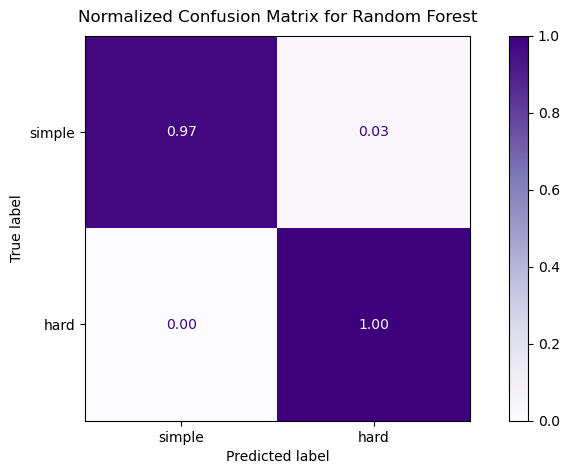

              precision    recall  f1-score   support

           0      1.000     0.970     0.985       101
           1      0.971     1.000     0.986       102

    accuracy                          0.985       203
   macro avg      0.986     0.985     0.985       203
weighted avg      0.986     0.985     0.985       203

Area Under ROC curve = 0.999


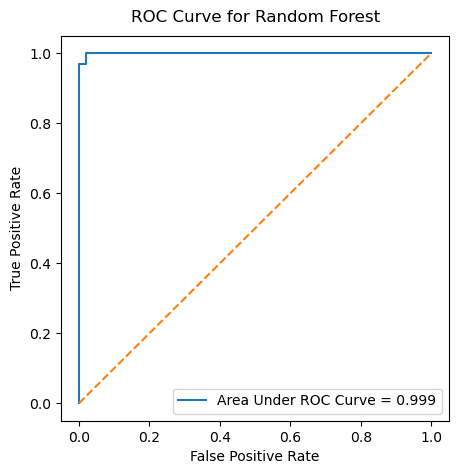

In [26]:
# evaluate the performance of the model on training set
print(f"Model Evaluation on Training Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('Random Forest', y_train, y_train_pred_rf)
print(metrics.classification_report(y_train, y_train_pred_rf, digits=3))
plot_roc_auc_curve('Random Forest', rf_model, X_train_normalized, y_train)

In [27]:
# use the trained and fine-tuned model to make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test_normalized)

Model Evaluation on Test Set After Hyperparameter Tuning:



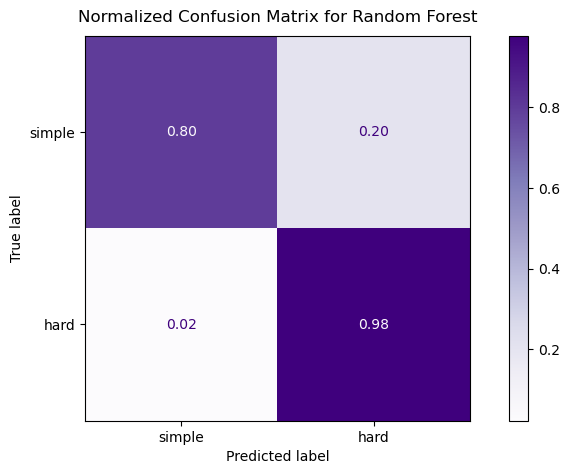

              precision    recall  f1-score   support

           0      0.972     0.795     0.875        44
           1      0.827     0.977     0.896        44

    accuracy                          0.886        88
   macro avg      0.900     0.886     0.885        88
weighted avg      0.900     0.886     0.885        88

Area Under ROC curve = 0.965


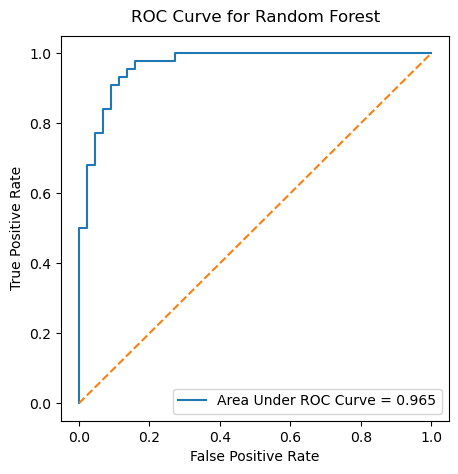

In [28]:
# evaluate the performance of the model on test set
print(f"Model Evaluation on Test Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('Random Forest', y_test, y_test_pred_rf)
print(metrics.classification_report(y_test, y_test_pred_rf, digits=3))
plot_roc_auc_curve('Random Forest', rf_model, X_test_normalized, y_test)

<Axes: title={'center': 'Permutation Importance for Random Forest (Training Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

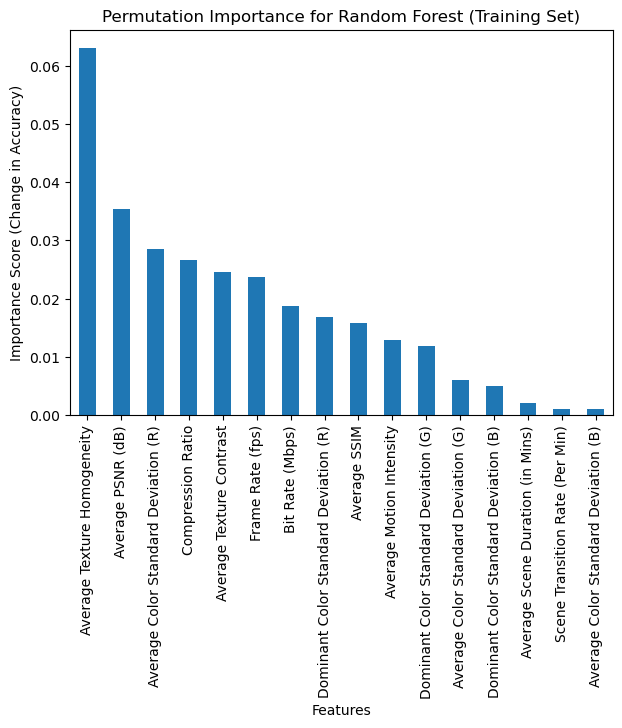

In [29]:
# check which features contributed most in making the predictions on the training set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_train_rf = permutation_importance(rf_model, X_train_normalized, y_train, n_repeats=5, scoring='accuracy', random_state=42)
importances_train_rf = pd.Series(results_train_rf.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for Random Forest (Training Set)")
importances_train_rf.plot.bar()

<Axes: title={'center': 'Permutation Importance for Random Forest (Test Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

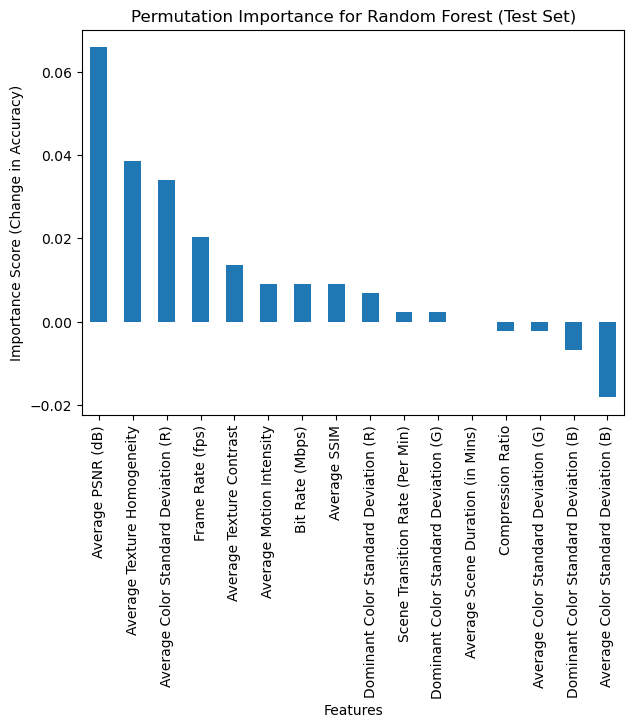

In [30]:
# check which features contributed most in making the predictions on the test set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_test_rf = permutation_importance(rf_model, X_test_normalized, y_test, n_repeats=5, scoring='accuracy', random_state=42)
importances_test_rf = pd.Series(results_test_rf.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for Random Forest (Test Set)")
importances_test_rf.plot.bar()

In [30]:
# save the trained model
rf_model_filename = 'trained_rf_model_2.pkl'

with open(rf_model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

## 2. Support Vector Machine (SVM)

### Model Evaluation Before Hyperparameter Tuning using Cross Validation

In [32]:
# build a support vector machine classifier using the default parameters
# train and validate the model's performance on different subsets of training data by performing stratified 5-fold cross validation
# as our dataset is small, cross validation is used to ensure the performance of the model is not dependent on a particular data split and that it can generalize well to unseen data
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max scaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train which could otherwise introduce bias
pipe_svm_untuned = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm_untuned', SVC(probability=True, random_state=42))
])

print(f"Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:\n")
cross_validation(pipe_svm_untuned, X_train, y_train, 5)

Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:

Mean Accuracy = 0.847
Mean Precision = 0.841
Mean Recall = 0.862
Mean F1-Score = 0.85
Mean Area Under ROC Curve = 0.917


### Model Hyperparameter Tuning using GridSearchCV 

In [33]:
# perform hyperparamter tuning using GridSearchCV with stratified 5-fold cross validation to evaluate the performance of each combination of hyperparameters using f1-score metric
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max scaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train set which could otherwise introduce bias
pipe_svm = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

svm_params = [{
    'svm__C': [0.1, 1.0, 10],
    'svm__kernel': ['rbf', 'linear', 'poly'],
    'svm__degree': [2, 3, 4, 5],
    'svm__gamma': [0.001, 0.01, 0.1, 1, 10]
}]

svm_tuned = GridSearchCV(pipe_svm, svm_params, cv=5, scoring='f1', verbose=10)
svm_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5; 1/180] START svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf
[CV 1/5; 1/180] END svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf;, score=0.760 total time=   0.0s
[CV 2/5; 1/180] START svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf
[CV 2/5; 1/180] END svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5; 1/180] START svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf
[CV 3/5; 1/180] END svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf;, score=0.656 total time=   0.0s
[CV 4/5; 1/180] START svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf
[CV 4/5; 1/180] END svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5; 1/180] START svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf
[CV 5/5; 1/180] END svm__C=0.1, svm__degree=2, svm__gamma=0.001, s

[CV 4/5; 10/180] END svm__C=0.1, svm__degree=2, svm__gamma=1, svm__kernel=rbf;, score=0.791 total time=   0.0s
[CV 5/5; 10/180] START svm__C=0.1, svm__degree=2, svm__gamma=1, svm__kernel=rbf.
[CV 5/5; 10/180] END svm__C=0.1, svm__degree=2, svm__gamma=1, svm__kernel=rbf;, score=0.762 total time=   0.0s
[CV 1/5; 11/180] START svm__C=0.1, svm__degree=2, svm__gamma=1, svm__kernel=linear
[CV 1/5; 11/180] END svm__C=0.1, svm__degree=2, svm__gamma=1, svm__kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5; 11/180] START svm__C=0.1, svm__degree=2, svm__gamma=1, svm__kernel=linear
[CV 2/5; 11/180] END svm__C=0.1, svm__degree=2, svm__gamma=1, svm__kernel=linear;, score=0.780 total time=   0.0s
[CV 3/5; 11/180] START svm__C=0.1, svm__degree=2, svm__gamma=1, svm__kernel=linear
[CV 3/5; 11/180] END svm__C=0.1, svm__degree=2, svm__gamma=1, svm__kernel=linear;, score=0.826 total time=   0.0s
[CV 4/5; 11/180] START svm__C=0.1, svm__degree=2, svm__gamma=1, svm__kernel=linear
[CV 4/5; 11/180] END sv

[CV 5/5; 19/180] END svm__C=0.1, svm__degree=3, svm__gamma=0.01, svm__kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5; 20/180] START svm__C=0.1, svm__degree=3, svm__gamma=0.01, svm__kernel=linear
[CV 1/5; 20/180] END svm__C=0.1, svm__degree=3, svm__gamma=0.01, svm__kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5; 20/180] START svm__C=0.1, svm__degree=3, svm__gamma=0.01, svm__kernel=linear
[CV 2/5; 20/180] END svm__C=0.1, svm__degree=3, svm__gamma=0.01, svm__kernel=linear;, score=0.780 total time=   0.0s
[CV 3/5; 20/180] START svm__C=0.1, svm__degree=3, svm__gamma=0.01, svm__kernel=linear
[CV 3/5; 20/180] END svm__C=0.1, svm__degree=3, svm__gamma=0.01, svm__kernel=linear;, score=0.826 total time=   0.0s
[CV 4/5; 20/180] START svm__C=0.1, svm__degree=3, svm__gamma=0.01, svm__kernel=linear
[CV 4/5; 20/180] END svm__C=0.1, svm__degree=3, svm__gamma=0.01, svm__kernel=linear;, score=0.791 total time=   0.0s
[CV 5/5; 20/180] START svm__C=0.1, svm__degree=3, svm__gamma=0.01, svm__ke

[CV 4/5; 29/180] END svm__C=0.1, svm__degree=3, svm__gamma=10, svm__kernel=linear;, score=0.791 total time=   0.0s
[CV 5/5; 29/180] START svm__C=0.1, svm__degree=3, svm__gamma=10, svm__kernel=linear
[CV 5/5; 29/180] END svm__C=0.1, svm__degree=3, svm__gamma=10, svm__kernel=linear;, score=0.762 total time=   0.0s
[CV 1/5; 30/180] START svm__C=0.1, svm__degree=3, svm__gamma=10, svm__kernel=poly
[CV 1/5; 30/180] END svm__C=0.1, svm__degree=3, svm__gamma=10, svm__kernel=poly;, score=0.780 total time=   0.0s
[CV 2/5; 30/180] START svm__C=0.1, svm__degree=3, svm__gamma=10, svm__kernel=poly
[CV 2/5; 30/180] END svm__C=0.1, svm__degree=3, svm__gamma=10, svm__kernel=poly;, score=0.927 total time=   0.0s
[CV 3/5; 30/180] START svm__C=0.1, svm__degree=3, svm__gamma=10, svm__kernel=poly
[CV 3/5; 30/180] END svm__C=0.1, svm__degree=3, svm__gamma=10, svm__kernel=poly;, score=0.750 total time=   0.0s
[CV 4/5; 30/180] START svm__C=0.1, svm__degree=3, svm__gamma=10, svm__kernel=poly
[CV 4/5; 30/180] EN

[CV 4/5; 39/180] END svm__C=0.1, svm__degree=4, svm__gamma=0.1, svm__kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 39/180] START svm__C=0.1, svm__degree=4, svm__gamma=0.1, svm__kernel=poly
[CV 5/5; 39/180] END svm__C=0.1, svm__degree=4, svm__gamma=0.1, svm__kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 40/180] START svm__C=0.1, svm__degree=4, svm__gamma=1, svm__kernel=rbf.
[CV 1/5; 40/180] END svm__C=0.1, svm__degree=4, svm__gamma=1, svm__kernel=rbf;, score=0.826 total time=   0.0s
[CV 2/5; 40/180] START svm__C=0.1, svm__degree=4, svm__gamma=1, svm__kernel=rbf.
[CV 2/5; 40/180] END svm__C=0.1, svm__degree=4, svm__gamma=1, svm__kernel=rbf;, score=0.780 total time=   0.0s
[CV 3/5; 40/180] START svm__C=0.1, svm__degree=4, svm__gamma=1, svm__kernel=rbf.
[CV 3/5; 40/180] END svm__C=0.1, svm__degree=4, svm__gamma=1, svm__kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5; 40/180] START svm__C=0.1, svm__degree=4, svm__gamma=1, svm__kernel=rbf.
[CV 4/5; 40/180] END svm__C=0.1,

[CV 2/5; 49/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.01, svm__kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5; 49/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.01, svm__kernel=rbf
[CV 3/5; 49/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.01, svm__kernel=rbf;, score=0.656 total time=   0.0s
[CV 4/5; 49/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.01, svm__kernel=rbf
[CV 4/5; 49/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.01, svm__kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5; 49/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.01, svm__kernel=rbf
[CV 5/5; 49/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.01, svm__kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5; 50/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.01, svm__kernel=linear
[CV 1/5; 50/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.01, svm__kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5; 50/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.01, svm__kernel=linear
[CV 2/

[CV 1/5; 59/180] END svm__C=0.1, svm__degree=5, svm__gamma=10, svm__kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5; 59/180] START svm__C=0.1, svm__degree=5, svm__gamma=10, svm__kernel=linear
[CV 2/5; 59/180] END svm__C=0.1, svm__degree=5, svm__gamma=10, svm__kernel=linear;, score=0.780 total time=   0.0s
[CV 3/5; 59/180] START svm__C=0.1, svm__degree=5, svm__gamma=10, svm__kernel=linear
[CV 3/5; 59/180] END svm__C=0.1, svm__degree=5, svm__gamma=10, svm__kernel=linear;, score=0.826 total time=   0.0s
[CV 4/5; 59/180] START svm__C=0.1, svm__degree=5, svm__gamma=10, svm__kernel=linear
[CV 4/5; 59/180] END svm__C=0.1, svm__degree=5, svm__gamma=10, svm__kernel=linear;, score=0.791 total time=   0.0s
[CV 5/5; 59/180] START svm__C=0.1, svm__degree=5, svm__gamma=10, svm__kernel=linear
[CV 5/5; 59/180] END svm__C=0.1, svm__degree=5, svm__gamma=10, svm__kernel=linear;, score=0.762 total time=   0.0s
[CV 1/5; 60/180] START svm__C=0.1, svm__degree=5, svm__gamma=10, svm__kernel=poly
[CV 1/5

[CV 3/5; 67/180] END svm__C=1.0, svm__degree=2, svm__gamma=0.1, svm__kernel=rbf;, score=0.744 total time=   0.0s
[CV 4/5; 67/180] START svm__C=1.0, svm__degree=2, svm__gamma=0.1, svm__kernel=rbf
[CV 4/5; 67/180] END svm__C=1.0, svm__degree=2, svm__gamma=0.1, svm__kernel=rbf;, score=0.756 total time=   0.0s
[CV 5/5; 67/180] START svm__C=1.0, svm__degree=2, svm__gamma=0.1, svm__kernel=rbf
[CV 5/5; 67/180] END svm__C=1.0, svm__degree=2, svm__gamma=0.1, svm__kernel=rbf;, score=0.762 total time=   0.0s
[CV 1/5; 68/180] START svm__C=1.0, svm__degree=2, svm__gamma=0.1, svm__kernel=linear
[CV 1/5; 68/180] END svm__C=1.0, svm__degree=2, svm__gamma=0.1, svm__kernel=linear;, score=0.864 total time=   0.0s
[CV 2/5; 68/180] START svm__C=1.0, svm__degree=2, svm__gamma=0.1, svm__kernel=linear
[CV 2/5; 68/180] END svm__C=1.0, svm__degree=2, svm__gamma=0.1, svm__kernel=linear;, score=0.737 total time=   0.0s
[CV 3/5; 68/180] START svm__C=1.0, svm__degree=2, svm__gamma=0.1, svm__kernel=linear
[CV 3/5; 6

[CV 1/5; 77/180] END svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=linear;, score=0.864 total time=   0.0s
[CV 2/5; 77/180] START svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=linear
[CV 2/5; 77/180] END svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=linear;, score=0.737 total time=   0.0s
[CV 3/5; 77/180] START svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=linear
[CV 3/5; 77/180] END svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=linear;, score=0.750 total time=   0.0s
[CV 4/5; 77/180] START svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=linear
[CV 4/5; 77/180] END svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=linear;, score=0.750 total time=   0.0s
[CV 5/5; 77/180] START svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=linear
[CV 5/5; 77/180] END svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=linear;, score=0.732 total time=   0.0s
[CV 1/5; 78/180] START svm__C=1.0, svm__degree=3, svm__gamma=0

[CV 1/5; 86/180] END svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=linear;, score=0.864 total time=   0.0s
[CV 2/5; 86/180] START svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=linear
[CV 2/5; 86/180] END svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=linear;, score=0.737 total time=   0.0s
[CV 3/5; 86/180] START svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=linear
[CV 3/5; 86/180] END svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=linear;, score=0.750 total time=   0.0s
[CV 4/5; 86/180] START svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=linear
[CV 4/5; 86/180] END svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=linear;, score=0.750 total time=   0.0s
[CV 5/5; 86/180] START svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=linear
[CV 5/5; 86/180] END svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=linear;, score=0.732 total time=   0.0s
[CV 1/5; 87/180] START svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=poly
[CV 1/5; 87/180] 

[CV 5/5; 95/180] END svm__C=1.0, svm__degree=4, svm__gamma=0.01, svm__kernel=linear;, score=0.732 total time=   0.0s
[CV 1/5; 96/180] START svm__C=1.0, svm__degree=4, svm__gamma=0.01, svm__kernel=poly
[CV 1/5; 96/180] END svm__C=1.0, svm__degree=4, svm__gamma=0.01, svm__kernel=poly;, score=0.677 total time=   0.0s
[CV 2/5; 96/180] START svm__C=1.0, svm__degree=4, svm__gamma=0.01, svm__kernel=poly
[CV 2/5; 96/180] END svm__C=1.0, svm__degree=4, svm__gamma=0.01, svm__kernel=poly;, score=0.750 total time=   0.0s
[CV 3/5; 96/180] START svm__C=1.0, svm__degree=4, svm__gamma=0.01, svm__kernel=poly
[CV 3/5; 96/180] END svm__C=1.0, svm__degree=4, svm__gamma=0.01, svm__kernel=poly;, score=0.656 total time=   0.0s
[CV 4/5; 96/180] START svm__C=1.0, svm__degree=4, svm__gamma=0.01, svm__kernel=poly
[CV 4/5; 96/180] END svm__C=1.0, svm__degree=4, svm__gamma=0.01, svm__kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 96/180] START svm__C=1.0, svm__degree=4, svm__gamma=0.01, svm__kernel=poly
[CV

[CV 5/5; 105/180] END svm__C=1.0, svm__degree=4, svm__gamma=10, svm__kernel=poly;, score=0.878 total time=   0.0s
[CV 1/5; 106/180] START svm__C=1.0, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf
[CV 1/5; 106/180] END svm__C=1.0, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf;, score=0.760 total time=   0.0s
[CV 2/5; 106/180] START svm__C=1.0, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf
[CV 2/5; 106/180] END svm__C=1.0, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5; 106/180] START svm__C=1.0, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf
[CV 3/5; 106/180] END svm__C=1.0, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf;, score=0.656 total time=   0.0s
[CV 4/5; 106/180] START svm__C=1.0, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf
[CV 4/5; 106/180] END svm__C=1.0, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5; 106/180] START svm__C=1.0, svm__degree=5, svm__gamma=0.001, svm__kernel=r

[CV 5/5; 114/180] END svm__C=1.0, svm__degree=5, svm__gamma=0.1, svm__kernel=poly;, score=0.655 total time=   0.0s
[CV 1/5; 115/180] START svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=rbf
[CV 1/5; 115/180] END svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=rbf;, score=0.870 total time=   0.0s
[CV 2/5; 115/180] START svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=rbf
[CV 2/5; 115/180] END svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5; 115/180] START svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=rbf
[CV 3/5; 115/180] END svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5; 115/180] START svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=rbf
[CV 4/5; 115/180] END svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=rbf;, score=0.850 total time=   0.0s
[CV 5/5; 115/180] START svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=rbf
[CV 5/5; 115/180] END svm__C=1.0

[CV 1/5; 125/180] END svm__C=10, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.884 total time=   0.0s
[CV 2/5; 125/180] START svm__C=10, svm__degree=2, svm__gamma=0.01, svm__kernel=linear
[CV 2/5; 125/180] END svm__C=10, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.757 total time=   0.0s
[CV 3/5; 125/180] START svm__C=10, svm__degree=2, svm__gamma=0.01, svm__kernel=linear
[CV 3/5; 125/180] END svm__C=10, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5; 125/180] START svm__C=10, svm__degree=2, svm__gamma=0.01, svm__kernel=linear
[CV 4/5; 125/180] END svm__C=10, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.769 total time=   0.0s
[CV 5/5; 125/180] START svm__C=10, svm__degree=2, svm__gamma=0.01, svm__kernel=linear
[CV 5/5; 125/180] END svm__C=10, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5; 126/180] START svm__C=10, svm__degree=2, svm__gamma=0.01, svm_

[CV 3/5; 134/180] END svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5; 134/180] START svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=linear
[CV 4/5; 134/180] END svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=linear;, score=0.769 total time=   0.0s
[CV 5/5; 134/180] START svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=linear
[CV 5/5; 134/180] END svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5; 135/180] START svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=poly
[CV 1/5; 135/180] END svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=poly;, score=0.780 total time=   0.0s
[CV 2/5; 135/180] START svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=poly
[CV 2/5; 135/180] END svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=poly;, score=0.872 total time=   0.0s
[CV 3/5; 135/180] START svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=poly
[CV 3/5; 135/18

[CV 5/5; 143/180] END svm__C=10, svm__degree=3, svm__gamma=0.1, svm__kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5; 144/180] START svm__C=10, svm__degree=3, svm__gamma=0.1, svm__kernel=poly
[CV 1/5; 144/180] END svm__C=10, svm__degree=3, svm__gamma=0.1, svm__kernel=poly;, score=0.792 total time=   0.0s
[CV 2/5; 144/180] START svm__C=10, svm__degree=3, svm__gamma=0.1, svm__kernel=poly
[CV 2/5; 144/180] END svm__C=10, svm__degree=3, svm__gamma=0.1, svm__kernel=poly;, score=0.844 total time=   0.0s
[CV 3/5; 144/180] START svm__C=10, svm__degree=3, svm__gamma=0.1, svm__kernel=poly
[CV 3/5; 144/180] END svm__C=10, svm__degree=3, svm__gamma=0.1, svm__kernel=poly;, score=0.826 total time=   0.0s
[CV 4/5; 144/180] START svm__C=10, svm__degree=3, svm__gamma=0.1, svm__kernel=poly
[CV 4/5; 144/180] END svm__C=10, svm__degree=3, svm__gamma=0.1, svm__kernel=poly;, score=0.706 total time=   0.0s
[CV 5/5; 144/180] START svm__C=10, svm__degree=3, svm__gamma=0.1, svm__kernel=poly
[CV 5/5; 144/

[CV 4/5; 152/180] END svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=linear;, score=0.769 total time=   0.0s
[CV 5/5; 152/180] START svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=linear
[CV 5/5; 152/180] END svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5; 153/180] START svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=poly
[CV 1/5; 153/180] END svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=poly;, score=0.677 total time=   0.0s
[CV 2/5; 153/180] START svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=poly
[CV 2/5; 153/180] END svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=poly;, score=0.750 total time=   0.0s
[CV 3/5; 153/180] START svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=poly
[CV 3/5; 153/180] END svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=poly;, score=0.656 total time=   0.0s
[CV 4/5; 153/180] START svm__C=10, svm__degree=4, svm__gamma=0.001, svm__k

[CV 4/5; 162/180] END svm__C=10, svm__degree=4, svm__gamma=1, svm__kernel=poly;, score=0.884 total time=   0.0s
[CV 5/5; 162/180] START svm__C=10, svm__degree=4, svm__gamma=1, svm__kernel=poly
[CV 5/5; 162/180] END svm__C=10, svm__degree=4, svm__gamma=1, svm__kernel=poly;, score=0.878 total time=   0.0s
[CV 1/5; 163/180] START svm__C=10, svm__degree=4, svm__gamma=10, svm__kernel=rbf
[CV 1/5; 163/180] END svm__C=10, svm__degree=4, svm__gamma=10, svm__kernel=rbf;, score=0.842 total time=   0.0s
[CV 2/5; 163/180] START svm__C=10, svm__degree=4, svm__gamma=10, svm__kernel=rbf
[CV 2/5; 163/180] END svm__C=10, svm__degree=4, svm__gamma=10, svm__kernel=rbf;, score=0.895 total time=   0.0s
[CV 3/5; 163/180] START svm__C=10, svm__degree=4, svm__gamma=10, svm__kernel=rbf
[CV 3/5; 163/180] END svm__C=10, svm__degree=4, svm__gamma=10, svm__kernel=rbf;, score=0.930 total time=   0.0s
[CV 4/5; 163/180] START svm__C=10, svm__degree=4, svm__gamma=10, svm__kernel=rbf
[CV 4/5; 163/180] END svm__C=10, sv

[CV 1/5; 172/180] END svm__C=10, svm__degree=5, svm__gamma=0.1, svm__kernel=rbf;, score=0.884 total time=   0.0s
[CV 2/5; 172/180] START svm__C=10, svm__degree=5, svm__gamma=0.1, svm__kernel=rbf
[CV 2/5; 172/180] END svm__C=10, svm__degree=5, svm__gamma=0.1, svm__kernel=rbf;, score=0.789 total time=   0.0s
[CV 3/5; 172/180] START svm__C=10, svm__degree=5, svm__gamma=0.1, svm__kernel=rbf
[CV 3/5; 172/180] END svm__C=10, svm__degree=5, svm__gamma=0.1, svm__kernel=rbf;, score=0.821 total time=   0.0s
[CV 4/5; 172/180] START svm__C=10, svm__degree=5, svm__gamma=0.1, svm__kernel=rbf
[CV 4/5; 172/180] END svm__C=10, svm__degree=5, svm__gamma=0.1, svm__kernel=rbf;, score=0.789 total time=   0.0s
[CV 5/5; 172/180] START svm__C=10, svm__degree=5, svm__gamma=0.1, svm__kernel=rbf
[CV 5/5; 172/180] END svm__C=10, svm__degree=5, svm__gamma=0.1, svm__kernel=rbf;, score=0.780 total time=   0.0s
[CV 1/5; 173/180] START svm__C=10, svm__degree=5, svm__gamma=0.1, svm__kernel=linear
[CV 1/5; 173/180] END 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm',
                                        SVC(probability=True,
                                            random_state=42))]),
             param_grid=[{'svm__C': [0.1, 1.0, 10], 'svm__degree': [2, 3, 4, 5],
                          'svm__gamma': [0.001, 0.01, 0.1, 1, 10],
                          'svm__kernel': ['rbf', 'linear', 'poly']}],
             scoring='f1', verbose=10)

In [34]:
# get the best hyperparameters and the best mean cross-validated f1-score
best_parameters_svm = svm_tuned.best_params_
best_mean_f1_svm = svm_tuned.best_score_
print(f"Best Hyperparameters = {best_parameters_svm}")
print(f"Best Mean F1-Score = {best_mean_f1_svm}")

Best Hyperparameters = {'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best Mean F1-Score = 0.9118860001786832


### Model Training and Evaluation After Hyperparameter Tuning

In [35]:
# train the model using the best hyperparameters and normalized input features
best_parameters_svm = {'C': 10, 
                       'degree': 2, 
                       'gamma': 1, 
                       'kernel': 'rbf'}

svm_model = SVC(**best_parameters_svm, probability=True, random_state=42)
svm_model.fit(X_train_normalized, y_train)

SVC(C=10, degree=2, gamma=1, probability=True, random_state=42)

In [36]:
# use the trained and fine-tuned model to make predictions on the training set
y_train_pred_svm = svm_model.predict(X_train_normalized)

Model Evaluation on Training Set After Hyperparameter Tuning:



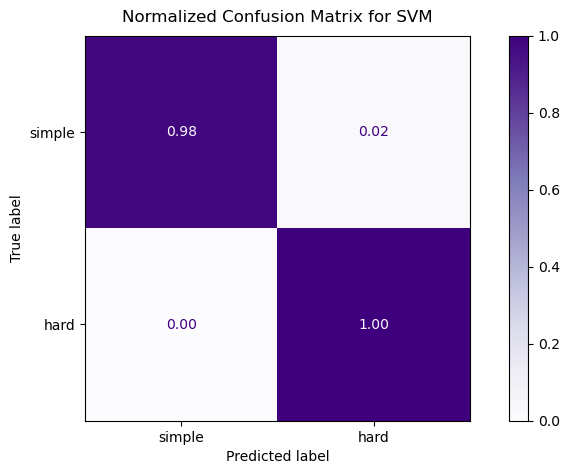

              precision    recall  f1-score   support

           0      1.000     0.980     0.990       101
           1      0.981     1.000     0.990       102

    accuracy                          0.990       203
   macro avg      0.990     0.990     0.990       203
weighted avg      0.990     0.990     0.990       203

Area Under ROC curve = 1.0


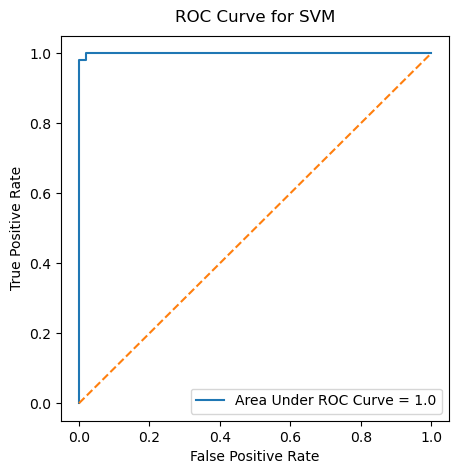

In [37]:
# evaluate the performance of the model on training set
print(f"Model Evaluation on Training Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('SVM', y_train, y_train_pred_svm)
print(metrics.classification_report(y_train, y_train_pred_svm, digits=3))
plot_roc_auc_curve('SVM', svm_model, X_train_normalized, y_train)

In [38]:
# use the trained and fine-tuned model to make predictions on the test set
y_test_pred_svm = svm_model.predict(X_test_normalized)

Model Evaluation on Test Set After Hyperparameter Tuning:



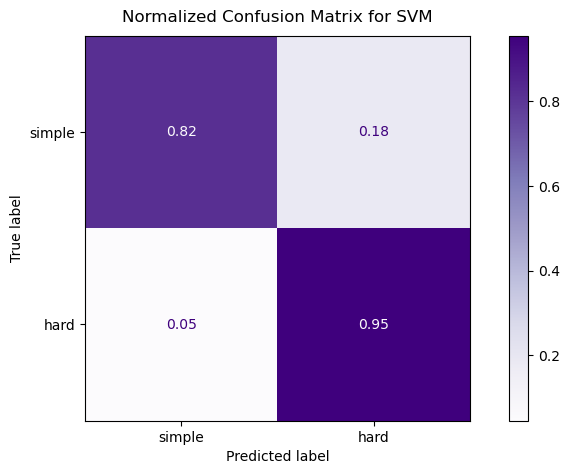

              precision    recall  f1-score   support

           0      0.947     0.818     0.878        44
           1      0.840     0.955     0.894        44

    accuracy                          0.886        88
   macro avg      0.894     0.886     0.886        88
weighted avg      0.894     0.886     0.886        88

Area Under ROC curve = 0.956


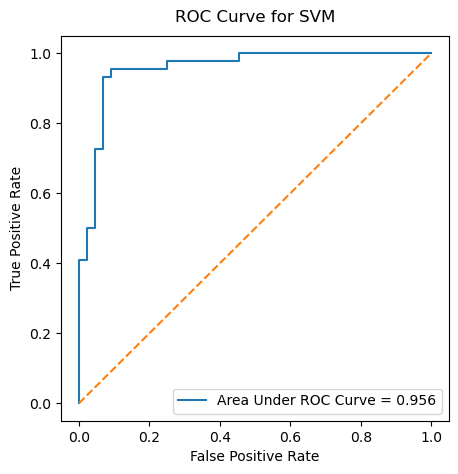

In [39]:
# evaluate the performance of the model on test set
print(f"Model Evaluation on Test Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('SVM', y_test, y_test_pred_svm)
print(metrics.classification_report(y_test, y_test_pred_svm, digits=3))
plot_roc_auc_curve('SVM', svm_model, X_test_normalized, y_test)

<Axes: title={'center': 'Permutation Importance for SVM (Training Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

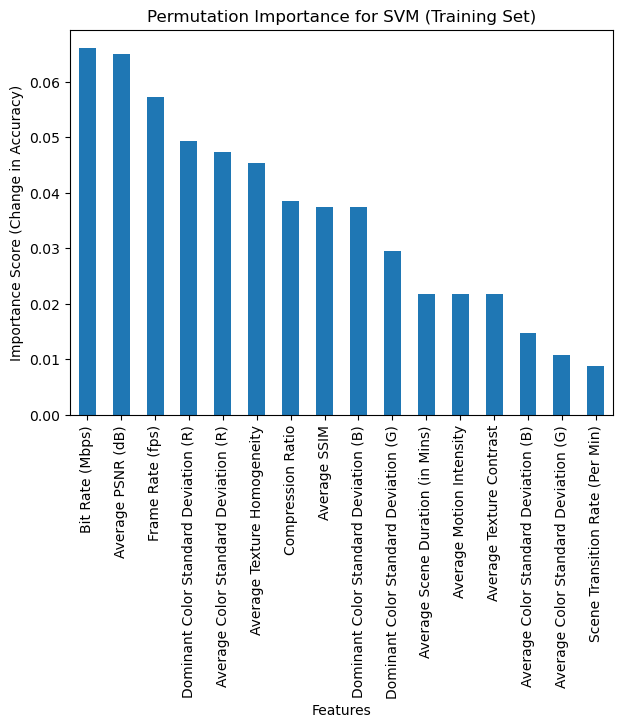

In [40]:
# check which features contributed most in making the predictions on the training set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_train_svm = permutation_importance(svm_model, X_train_normalized, y_train, n_repeats=5, scoring='accuracy', random_state=42)
importances_train_svm = pd.Series(results_train_svm.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for SVM (Training Set)")
importances_train_svm.plot.bar()

<Axes: title={'center': 'Permutation Importance for SVM (Test Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

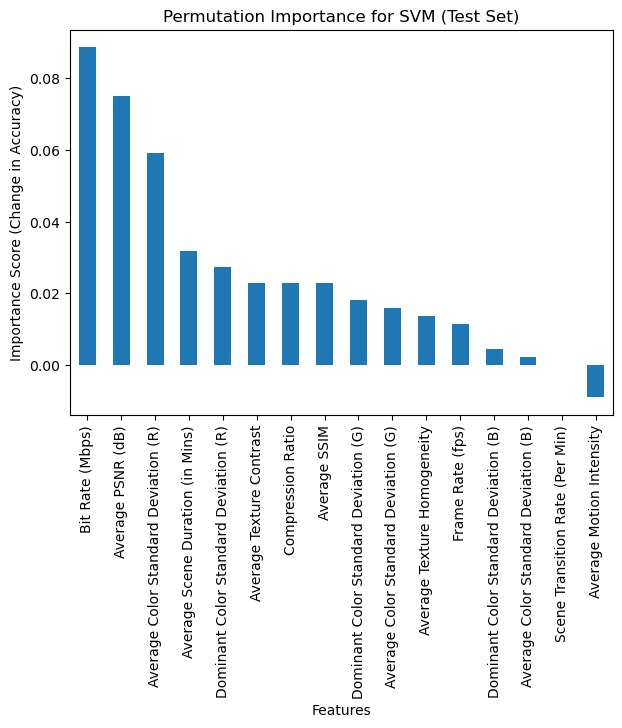

In [41]:
# check which features contributed most in making the predictions on the test set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_test_svm = permutation_importance(svm_model, X_test_normalized, y_test, n_repeats=5, scoring='accuracy', random_state=42)
importances_test_svm = pd.Series(results_test_svm.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for SVM (Test Set)")
importances_test_svm.plot.bar()

In [42]:
# save the trained model
svm_model_filename = 'trained_svm_model_2.pkl'

with open(svm_model_filename, 'wb') as file:
    pickle.dump(svm_model, file)

## 3. Logistic Regression

### Model Evaluation Before Hyperparameter Tuning using Cross Validation

In [43]:
# build a logistic regression classifier using the default parameters
# train and validate the model's performance on different subsets of training data by performing stratified 5-fold cross validation
# as our dataset is small, cross validation is used to ensure the performance of the model is not dependent on a particular data split and that it can generalize well to unseen data
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max scaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train set when normalizing which could otherwise introduce bias
pipe_lr_untuned = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr_untuned', LogisticRegression(random_state=42))
])

print(f"Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:\n")
cross_validation(pipe_lr_untuned, X_train, y_train, 5)

Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:

Mean Accuracy = 0.778
Mean Precision = 0.783
Mean Recall = 0.774
Mean F1-Score = 0.776
Mean Area Under ROC Curve = 0.881


### Model Hyperparameter Tuning using GridSearchCV 

In [44]:
# perform hyperparamter tuning using GridSearchCV with stratified 5-fold cross validation to evaluate the performance of each combination of hyperparameters using f1-score metric
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max sccaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train set when normalizing which could otherwise introduce bias
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LogisticRegression(random_state=42))
])

lr_params = [
    {'lr__penalty':['l2'],
     'lr__solver':['lbfgs', 'newton-cg', 'sag'],
     'lr__C':[0.001, 0.01, 0.1, 1.0, 10],
     'lr__max_iter':[100, 500, 1000, 2500, 5000, 6000]},
    
     {'lr__penalty':['l1', 'l2'],
      'lr__solver':['liblinear'],
      'lr__C':[0.001, 0.01, 0.1, 1.0, 10],
      'lr__max_iter':[100, 500, 1000, 2500, 5000, 6000]},
    
     {'lr__penalty':['l1', 'l2', 'elasticnet'],
      'lr__solver':['saga'],
      'lr__C':[0.001, 0.01, 0.1, 1.0, 10],
      'lr__max_iter':[100, 500, 1000, 2500, 5000, 6000]},
]

lr_tuned = GridSearchCV(pipe_lr, lr_params, cv=5, scoring='f1', verbose=10)
lr_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5; 1/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 1/5; 1/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.837 total time=   0.0s
[CV 2/5; 1/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 2/5; 1/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/5; 1/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 3/5; 1/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.656 total time=   0.0s
[CV 4/5; 1/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 4/5; 1/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.655 total time=   0.0s
[CV 5/5; 1/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 5/5; 1/240] END lr__C=0.001, lr__m

[CV 5/5; 10/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs;, score=0.679 total time=   0.0s
[CV 1/5; 11/240] START lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg
[CV 1/5; 11/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg;, score=0.837 total time=   0.0s
[CV 2/5; 11/240] START lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg
[CV 2/5; 11/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5; 11/240] START lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg
[CV 3/5; 11/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg;, score=0.656 total time=   0.0s
[CV 4/5; 11/240] START lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg
[CV 4/5; 11/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg;, score=0.655 total time=   0.0s
[CV 5/5; 11/240] STAR

[CV 3/5; 19/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.826 total time=   0.0s
[CV 4/5; 19/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 4/5; 19/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.744 total time=   0.0s
[CV 5/5; 19/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 5/5; 19/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/5; 20/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg
[CV 1/5; 20/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg;, score=0.844 total time=   0.0s
[CV 2/5; 20/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg
[CV 2/5; 20/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg;, score=0.780 total time=   0.0s
[CV 3/5; 20/240] START lr__C=0.01, lr__max_iter=100, lr

[CV 5/5; 29/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg;, score=0.714 total time=   0.0s
[CV 1/5; 30/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag
[CV 1/5; 30/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag;, score=0.844 total time=   0.0s
[CV 2/5; 30/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag
[CV 2/5; 30/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag;, score=0.780 total time=   0.0s
[CV 3/5; 30/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag
[CV 3/5; 30/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag;, score=0.826 total time=   0.0s
[CV 4/5; 30/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag
[CV 4/5; 30/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag;, score=0.744 total time=   0.0s
[CV 5/5; 30/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__

[CV 2/5; 39/240] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=sag;, score=0.800 total time=   0.0s
[CV 3/5; 39/240] START lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=sag
[CV 3/5; 39/240] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=sag;, score=0.837 total time=   0.0s
[CV 4/5; 39/240] START lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=sag
[CV 4/5; 39/240] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=sag;, score=0.750 total time=   0.0s
[CV 5/5; 39/240] START lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=sag
[CV 5/5; 39/240] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=sag;, score=0.732 total time=   0.0s
[CV 1/5; 40/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=lbfgs
[CV 1/5; 40/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=lbfgs;, score=0.864 total time=   0.0s
[CV 2/5; 40/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=lbfgs
[CV 2/5; 

[CV 5/5; 47/240] END lr__C=0.1, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg;, score=0.732 total time=   0.0s
[CV 1/5; 48/240] START lr__C=0.1, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag
[CV 1/5; 48/240] END lr__C=0.1, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag;, score=0.864 total time=   0.0s
[CV 2/5; 48/240] START lr__C=0.1, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag
[CV 2/5; 48/240] END lr__C=0.1, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag;, score=0.800 total time=   0.0s
[CV 3/5; 48/240] START lr__C=0.1, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag
[CV 3/5; 48/240] END lr__C=0.1, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag;, score=0.837 total time=   0.0s
[CV 4/5; 48/240] START lr__C=0.1, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag
[CV 4/5; 48/240] END lr__C=0.1, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag;, score=0.750 total time=   0.0s
[CV 5/5; 48/240] START lr__C=0.1, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag

[CV 1/5; 56/240] END lr__C=1.0, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg;, score=0.864 total time=   0.0s
[CV 2/5; 56/240] START lr__C=1.0, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg
[CV 2/5; 56/240] END lr__C=1.0, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg;, score=0.737 total time=   0.0s
[CV 3/5; 56/240] START lr__C=1.0, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg
[CV 3/5; 56/240] END lr__C=1.0, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg;, score=0.762 total time=   0.0s
[CV 4/5; 56/240] START lr__C=1.0, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg
[CV 4/5; 56/240] END lr__C=1.0, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg;, score=0.769 total time=   0.0s
[CV 5/5; 56/240] START lr__C=1.0, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg
[CV 5/5; 56/240] END lr__C=1.0, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5; 57/240] START lr__C=1.0, lr__max_it

[CV 3/5; 64/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs;, score=0.762 total time=   0.0s
[CV 4/5; 64/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs
[CV 4/5; 64/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs;, score=0.769 total time=   0.0s
[CV 5/5; 64/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs
[CV 5/5; 64/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5; 65/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg
[CV 1/5; 65/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg;, score=0.864 total time=   0.0s
[CV 2/5; 65/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg
[CV 2/5; 65/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg;, score=0.737 total time=   0.0s
[CV 3/5; 65/240] START lr__C=1.0, lr__max_iter=2500, lr

[CV 5/5; 72/240] END lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag;, score=0.750 total time=   0.0s
[CV 1/5; 73/240] START lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 1/5; 73/240] END lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.884 total time=   0.0s
[CV 2/5; 73/240] START lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 2/5; 73/240] END lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.684 total time=   0.0s
[CV 3/5; 73/240] START lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 3/5; 73/240] END lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.800 total time=   0.0s
[CV 4/5; 73/240] START lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 4/5; 73/240] END lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.789 total time=   0.0s
[CV 5/5; 73/240] START lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 5

[CV 3/5; 81/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=sag;, score=0.800 total time=   0.0s
[CV 4/5; 81/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=sag
[CV 4/5; 81/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=sag;, score=0.789 total time=   0.0s
[CV 5/5; 81/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=sag
[CV 5/5; 81/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=sag;, score=0.732 total time=   0.0s
[CV 1/5; 82/240] START lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs
[CV 1/5; 82/240] END lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs;, score=0.884 total time=   0.0s
[CV 2/5; 82/240] START lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs
[CV 2/5; 82/240] END lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs;, score=0.684 total time=   0.0s
[CV 3/5; 82/240] START lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs
[CV 3

[CV 1/5; 90/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag;, score=0.884 total time=   0.0s
[CV 2/5; 90/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag
[CV 2/5; 90/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag;, score=0.684 total time=   0.0s
[CV 3/5; 90/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag
[CV 3/5; 90/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag;, score=0.800 total time=   0.0s
[CV 4/5; 90/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag
[CV 4/5; 90/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag;, score=0.789 total time=   0.0s
[CV 5/5; 90/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag
[CV 5/5; 90/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag;, score=0.732 total time=   0.0s
[CV 1/5; 91/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l1, lr__solver=liblinear
[CV 1/5

[CV 2/5; 100/240] END lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.581 total time=   0.0s
[CV 3/5; 100/240] START lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear
[CV 3/5; 100/240] END lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.611 total time=   0.0s
[CV 4/5; 100/240] START lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear
[CV 4/5; 100/240] END lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.370 total time=   0.0s
[CV 5/5; 100/240] START lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear
[CV 5/5; 100/240] END lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.581 total time=   0.0s
[CV 1/5; 101/240] START lr__C=0.001, lr__max_iter=6000, lr__penalty=l1, lr__solver=liblinear
[CV 1/5; 101/240] END lr__C=0.001, lr__max_iter=6000, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/5;

[CV 3/5; 108/240] END lr__C=0.01, lr__max_iter=1000, lr__penalty=l2, lr__solver=liblinear;, score=0.750 total time=   0.0s
[CV 4/5; 108/240] START lr__C=0.01, lr__max_iter=1000, lr__penalty=l2, lr__solver=liblinear
[CV 4/5; 108/240] END lr__C=0.01, lr__max_iter=1000, lr__penalty=l2, lr__solver=liblinear;, score=0.647 total time=   0.0s
[CV 5/5; 108/240] START lr__C=0.01, lr__max_iter=1000, lr__penalty=l2, lr__solver=liblinear
[CV 5/5; 108/240] END lr__C=0.01, lr__max_iter=1000, lr__penalty=l2, lr__solver=liblinear;, score=0.545 total time=   0.0s
[CV 1/5; 109/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l1, lr__solver=liblinear
[CV 1/5; 109/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/5; 109/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l1, lr__solver=liblinear
[CV 2/5; 109/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/5; 109/240]

[CV 5/5; 116/240] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5; 117/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear
[CV 1/5; 117/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/5; 117/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear
[CV 2/5; 117/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/5; 117/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear
[CV 3/5; 117/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 4/5; 117/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear
[CV 4/5; 117/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 5/5; 117/240] START lr__C=0.1, 

[CV 2/5; 125/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/5; 125/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=l1, lr__solver=liblinear
[CV 3/5; 125/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 4/5; 125/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=l1, lr__solver=liblinear
[CV 4/5; 125/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 5/5; 125/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=l1, lr__solver=liblinear
[CV 5/5; 125/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/5; 126/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=l2, lr__solver=liblinear
[CV 1/5; 126/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=l2, lr__solver=liblinear;, score=0.864 total time=   0.0s
[CV 2/5; 126/240] START lr

[CV 4/5; 133/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l1, lr__solver=liblinear;, score=0.769 total time=   0.0s
[CV 5/5; 133/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l1, lr__solver=liblinear
[CV 5/5; 133/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l1, lr__solver=liblinear;, score=0.732 total time=   0.0s
[CV 1/5; 134/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear
[CV 1/5; 134/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear;, score=0.844 total time=   0.0s
[CV 2/5; 134/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear
[CV 2/5; 134/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear;, score=0.737 total time=   0.0s
[CV 3/5; 134/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear
[CV 3/5; 134/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear;, score=0.762 total time=   0.0s
[CV 4/5; 134/240] START lr

[CV 3/5; 144/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=liblinear;, score=0.800 total time=   0.0s
[CV 4/5; 144/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=liblinear
[CV 4/5; 144/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=liblinear;, score=0.789 total time=   0.0s
[CV 5/5; 144/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=liblinear
[CV 5/5; 144/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=liblinear;, score=0.732 total time=   0.0s
[CV 1/5; 145/240] START lr__C=10, lr__max_iter=2500, lr__penalty=l1, lr__solver=liblinear
[CV 1/5; 145/240] END lr__C=10, lr__max_iter=2500, lr__penalty=l1, lr__solver=liblinear;, score=0.884 total time=   0.0s
[CV 2/5; 145/240] START lr__C=10, lr__max_iter=2500, lr__penalty=l1, lr__solver=liblinear
[CV 2/5; 145/240] END lr__C=10, lr__max_iter=2500, lr__penalty=l1, lr__solver=liblinear;, score=0.684 total time=   0.0s
[CV 3/5; 145/240] START lr__C=10, l

[CV 3/5; 152/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=saga;, score=0.656 total time=   0.0s
[CV 4/5; 152/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=saga
[CV 4/5; 152/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=saga;, score=0.655 total time=   0.0s
[CV 5/5; 152/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=saga
[CV 5/5; 152/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=saga;, score=0.679 total time=   0.0s
[CV 1/5; 153/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=elasticnet, lr__solver=saga
[CV 1/5; 153/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 2/5; 153/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=elasticnet, lr__solver=saga
[CV 2/5; 153/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 3/5; 153/240] START lr__C=0.00

[CV 4/5; 160/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 5/5; 160/240] START lr__C=0.001, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga
[CV 5/5; 160/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 1/5; 161/240] START lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga
[CV 1/5; 161/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga;, score=0.837 total time=   0.0s
[CV 2/5; 161/240] START lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga
[CV 2/5; 161/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga;, score=0.750 total time=   0.0s
[CV 3/5; 161/240] START lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga
[CV 3/5; 161/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga;, score=0.656 total time=   0.0s
[CV 4/5; 161/240] START lr__C=0.001, lr__max_iter=250

[CV 4/5; 169/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l1, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 5/5; 169/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=l1, lr__solver=saga
[CV 5/5; 169/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l1, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 1/5; 170/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=saga
[CV 1/5; 170/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=saga;, score=0.844 total time=   0.0s
[CV 2/5; 170/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=saga
[CV 2/5; 170/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=saga;, score=0.780 total time=   0.0s
[CV 3/5; 170/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=saga
[CV 3/5; 170/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=saga;, score=0.826 total time=   0.0s
[CV 4/5; 170/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=l2, l

[CV 5/5; 178/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 1/5; 179/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga
[CV 1/5; 179/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga;, score=0.844 total time=   0.0s
[CV 2/5; 179/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga
[CV 2/5; 179/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga;, score=0.780 total time=   0.0s
[CV 3/5; 179/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga
[CV 3/5; 179/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga;, score=0.826 total time=   0.0s
[CV 4/5; 179/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga
[CV 4/5; 179/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga;, score=0.744 total time=   0.0s
[CV 5/5; 179/240] START lr__C=0.01, lr__max_iter=2500, lr__pen

[CV 3/5; 187/240] END lr__C=0.1, lr__max_iter=100, lr__penalty=l1, lr__solver=saga;, score=0.656 total time=   0.0s
[CV 4/5; 187/240] START lr__C=0.1, lr__max_iter=100, lr__penalty=l1, lr__solver=saga
[CV 4/5; 187/240] END lr__C=0.1, lr__max_iter=100, lr__penalty=l1, lr__solver=saga;, score=0.667 total time=   0.0s
[CV 5/5; 187/240] START lr__C=0.1, lr__max_iter=100, lr__penalty=l1, lr__solver=saga
[CV 5/5; 187/240] END lr__C=0.1, lr__max_iter=100, lr__penalty=l1, lr__solver=saga;, score=0.762 total time=   0.0s
[CV 1/5; 188/240] START lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=saga
[CV 1/5; 188/240] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=saga;, score=0.864 total time=   0.0s
[CV 2/5; 188/240] START lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=saga
[CV 2/5; 188/240] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=saga;, score=0.800 total time=   0.0s
[CV 3/5; 188/240] START lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=

[CV 5/5; 195/240] END lr__C=0.1, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 1/5; 196/240] START lr__C=0.1, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga
[CV 1/5; 196/240] END lr__C=0.1, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 2/5; 196/240] START lr__C=0.1, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga
[CV 2/5; 196/240] END lr__C=0.1, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga;, score=0.677 total time=   0.0s
[CV 3/5; 196/240] START lr__C=0.1, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga
[CV 3/5; 196/240] END lr__C=0.1, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga;, score=0.656 total time=   0.0s
[CV 4/5; 196/240] START lr__C=0.1, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga
[CV 4/5; 196/240] END lr__C=0.1, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga;, score=0.667 total time=   0.0s
[CV 5/5; 196/240] START lr__C=0.1, lr__max_iter=2500, lr__penalty

[CV 1/5; 204/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 2/5; 204/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga
[CV 2/5; 204/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 3/5; 204/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga
[CV 3/5; 204/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 4/5; 204/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga
[CV 4/5; 204/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 5/5; 204/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga
[CV 5/5; 204/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 1/5; 

[CV 1/5; 213/240] END lr__C=1.0, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 2/5; 213/240] START lr__C=1.0, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga
[CV 2/5; 213/240] END lr__C=1.0, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 3/5; 213/240] START lr__C=1.0, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga
[CV 3/5; 213/240] END lr__C=1.0, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 4/5; 213/240] START lr__C=1.0, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga
[CV 4/5; 213/240] END lr__C=1.0, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 5/5; 213/240] START lr__C=1.0, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga
[CV 5/5; 213/240] END lr__C=1.0, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 1/5; 

[CV 4/5; 221/240] END lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.769 total time=   0.0s
[CV 5/5; 221/240] START lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 5/5; 221/240] END lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.750 total time=   0.0s
[CV 1/5; 222/240] START lr__C=1.0, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga
[CV 1/5; 222/240] END lr__C=1.0, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 2/5; 222/240] START lr__C=1.0, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga
[CV 2/5; 222/240] END lr__C=1.0, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 3/5; 222/240] START lr__C=1.0, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga
[CV 3/5; 222/240] END lr__C=1.0, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 4/5; 222/240] START lr__C

[CV 3/5; 230/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.800 total time=   0.0s
[CV 4/5; 230/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga
[CV 4/5; 230/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.789 total time=   0.0s
[CV 5/5; 230/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga
[CV 5/5; 230/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.732 total time=   0.0s
[CV 1/5; 231/240] START lr__C=10, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga
[CV 1/5; 231/240] END lr__C=10, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 2/5; 231/240] START lr__C=10, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga
[CV 2/5; 231/240] END lr__C=10, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 3/5; 231/240] START lr__C=10, lr__max_iter=1000,

[CV 4/5; 238/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l1, lr__solver=saga;, score=0.789 total time=   0.0s
[CV 5/5; 238/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l1, lr__solver=saga
[CV 5/5; 238/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l1, lr__solver=saga;, score=0.732 total time=   0.0s
[CV 1/5; 239/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 1/5; 239/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.884 total time=   0.0s
[CV 2/5; 239/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 2/5; 239/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.684 total time=   0.0s
[CV 3/5; 239/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 3/5; 239/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.800 total time=   0.0s
[CV 4/5; 239/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid=[{'lr__C': [0.001, 0.01, 0.1, 1.0, 10],
                          'lr__max_iter': [100, 500, 1000, 2500, 5000, 6000],
                          'lr__penalty': ['l2'],
                          'lr__solver': ['lbfgs', 'newton-cg', 'sag']},
                         {'lr__C': [0.001, 0.01, 0.1, 1.0, 10],
                          'lr__max_iter': [100, 500, 1000, 2500, 5000, 6000],
                          'lr__penalty': ['l1', 'l2'],
                          'lr__solver': ['liblinear']},
                         {'lr__C': [0.001, 0.01, 0.1, 1.0, 10],
                          'lr__max_iter': [100, 500, 1000, 2500, 5000, 6000],
                          'lr__penalty': ['l1', 'l2', 'elasticnet'],
                          'lr__solver': ['saga']}],
             scoring='f1', verbose=10)

In [46]:
# get the best hyperparameters and the best mean cross-validated f1-score
best_parameters_lr = lr_tuned.best_params_
best_mean_f1_lr = lr_tuned.best_score_
print(f"Best Hyperparameters = {best_parameters_lr}")
print(f"Best Mean F1-Score = {best_mean_f1_lr}")

Best Hyperparameters = {'lr__C': 0.1, 'lr__max_iter': 100, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Best Mean F1-Score = 0.7965105966070232


### Model Training and Evaluation After Hyperparameter Tuning

In [47]:
# train the model using the best hyperparameters and normalized input features
best_parameters_lr = {'C': 0.1, 
                      'max_iter': 100, 
                      'penalty': 'l2', 
                      'solver': 'lbfgs'}

lr_model = LogisticRegression(**best_parameters_lr, random_state=42)
lr_model.fit(X_train_normalized, y_train)

LogisticRegression(C=0.1, random_state=42)

In [48]:
# use the trained and fine-tuned model to make predictions on the training set
y_train_pred_lr = lr_model.predict(X_train_normalized)

Model Evaluation on Training Set After Hyperparameter Tuning:



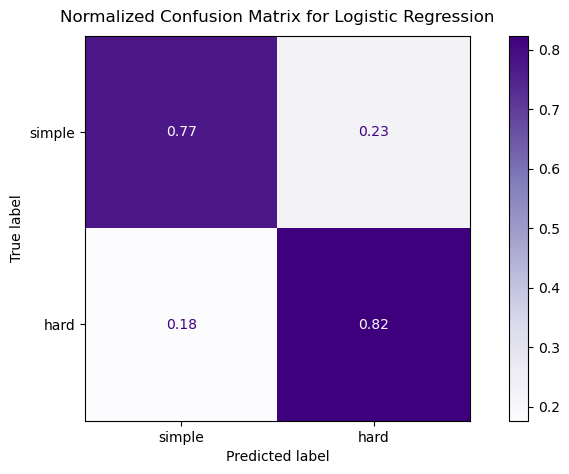

              precision    recall  f1-score   support

           0      0.812     0.772     0.792       101
           1      0.785     0.824     0.804       102

    accuracy                          0.798       203
   macro avg      0.799     0.798     0.798       203
weighted avg      0.799     0.798     0.798       203

Area Under ROC curve = 0.856


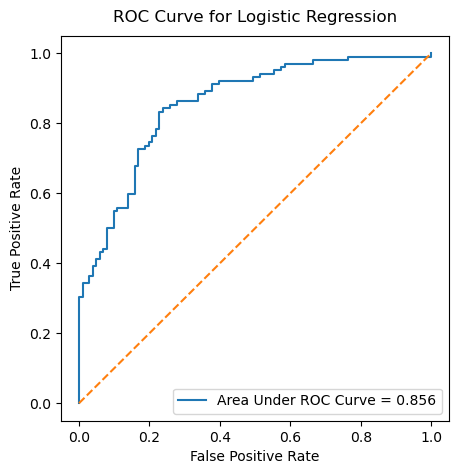

In [49]:
# evaluate the performance of the model on training set
print(f"Model Evaluation on Training Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('Logistic Regression', y_train, y_train_pred_lr)
print(metrics.classification_report(y_train, y_train_pred_lr, digits=3))
plot_roc_auc_curve('Logistic Regression', lr_model, X_train_normalized, y_train)

In [50]:
# use the trained and fine-tuned model to make predictions on the test set
y_test_pred_lr = lr_model.predict(X_test_normalized)

Model Evaluation on Test Set After Hyperparameter Tuning:



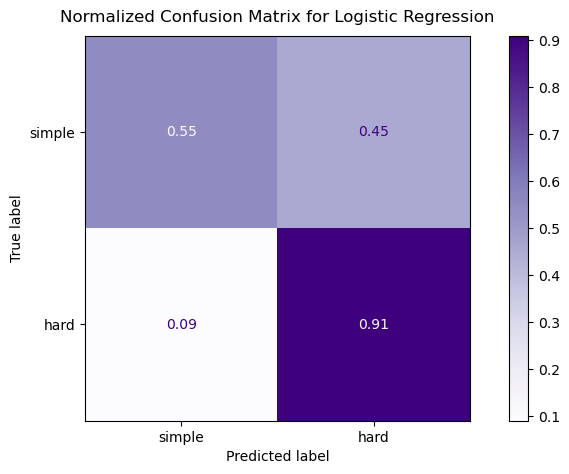

              precision    recall  f1-score   support

           0      0.857     0.545     0.667        44
           1      0.667     0.909     0.769        44

    accuracy                          0.727        88
   macro avg      0.762     0.727     0.718        88
weighted avg      0.762     0.727     0.718        88

Area Under ROC curve = 0.812


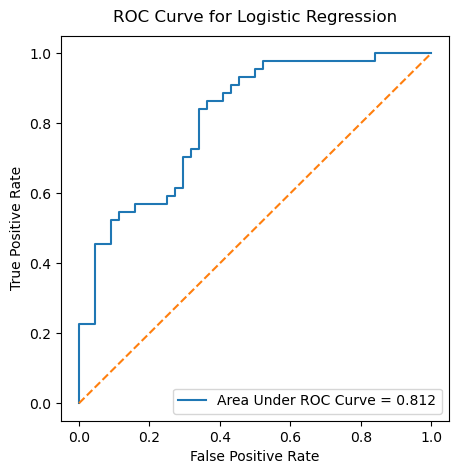

In [51]:
# evaluate the performance of the model on test set
print(f"Model Evaluation on Test Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('Logistic Regression', y_test, y_test_pred_lr)
print(metrics.classification_report(y_test, y_test_pred_lr, digits=3))
plot_roc_auc_curve('Logistic Regression', lr_model, X_test_normalized, y_test)

<Axes: title={'center': 'Permutation Importance for Logistic Regression (Training Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

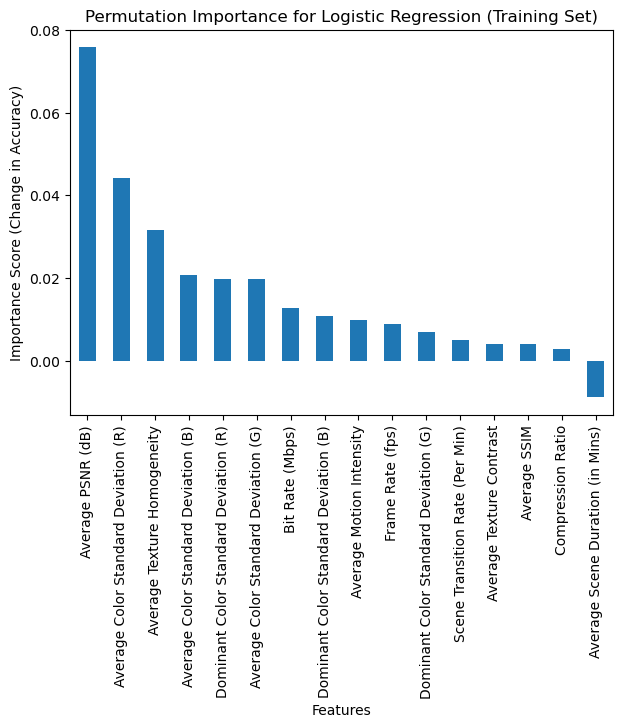

In [52]:
# check which features contributed most in making the predictions on the training set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_train_lr = permutation_importance(lr_model, X_train_normalized, y_train, n_repeats=5, scoring='accuracy', random_state=42)
importances_train_lr = pd.Series(results_train_lr.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for Logistic Regression (Training Set)")
importances_train_lr.plot.bar()

<Axes: title={'center': 'Permutation Importance for Logistic Regression (Test Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

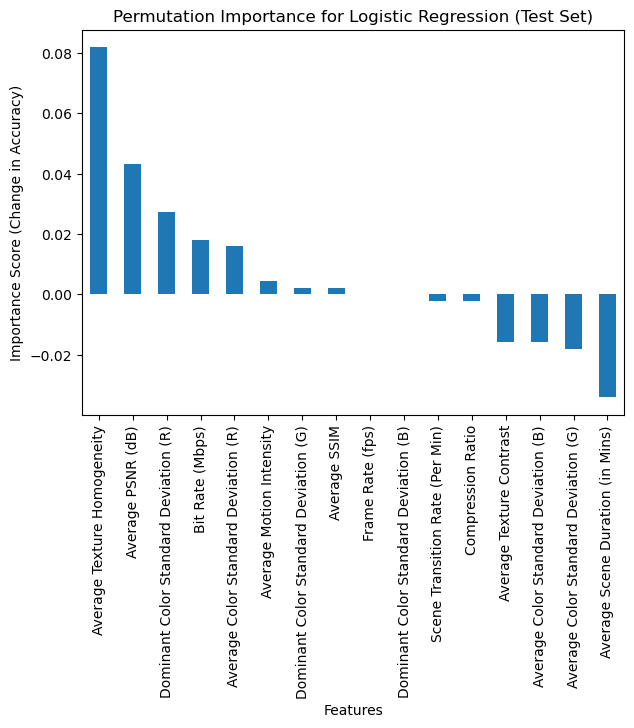

In [53]:
# check which features contributed most in making the predictions on the test set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_test_lr = permutation_importance(lr_model, X_test_normalized, y_test, n_repeats=5, scoring='accuracy', random_state=42)
importances_test_lr = pd.Series(results_test_lr.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for Logistic Regression (Test Set)")
importances_test_lr.plot.bar()

In [54]:
# save the trained model
lr_model_filename = 'trained_lr_model_2.pkl'

with open(lr_model_filename, 'wb') as file:
    pickle.dump(lr_model, file)